In [1]:
from ollama import chat
import pandas as pd
import json

In [2]:
df = pd.read_csv("data/Sleep_health_and_lifestyle_dataset.csv")

In [3]:
train_df = pd.read_csv("data/train_df.csv")

In [4]:
def generate(system_message: str, user_message: str, model: str):
    return chat(
        model=model, 
        messages =[
        {"role": "system", "content": system_message},
        {"role": "user", "content": user_message}],
        options={
            "temperature": 0
        }
    )

In [5]:
def get_chart_type(content: str):
    return content.split("</chart-type>")[0].split("<chart-type>")[1]

In [6]:
def get_chart_code(content: str):
    return content.split("</chart-code>")[0].split("<chart-code>")[1]

In [7]:
def save_json(file_name: str, data):
    with open(file_name, "w") as f:
        json.dump(data, f, indent=4) 

### Ask the model to choose and create a chart

In [8]:
system_message = """You are a text-to-chart generating model. Always generate the charts using python and matplotlib. 
Always use the datase example given that is already loaded with pandas as variable df. Do not generate code for loading the dataset!
Do not halucinate examples or generate sample data. Generate only one code. Respond only with the code.
Generate the chart type in the beginning between tags <chart-type></chart-type>.
Generate the code between tags <chart-code></chart-code>"""

#### LLama 3.2 3B

Index: 0
Description: Show the relationship between sleep duration and quality of sleep


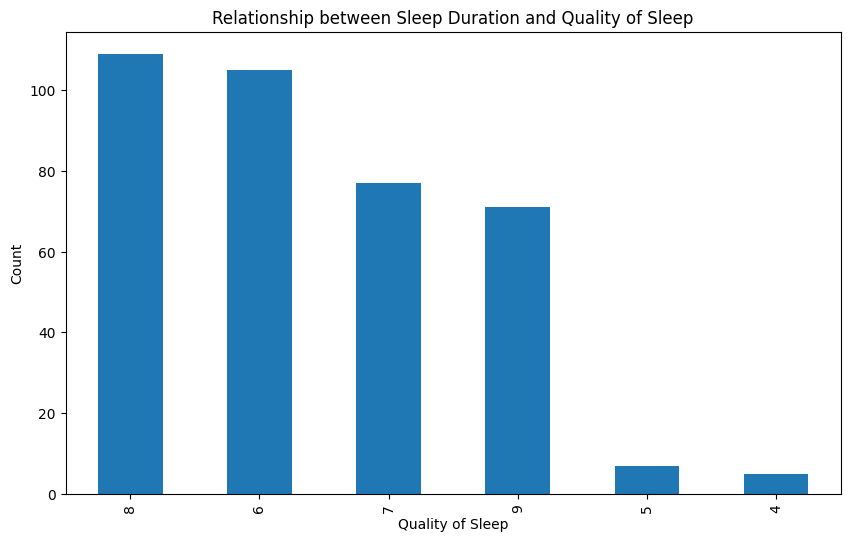

Index: 1
Description: Compare the average sleep duration across different occupations


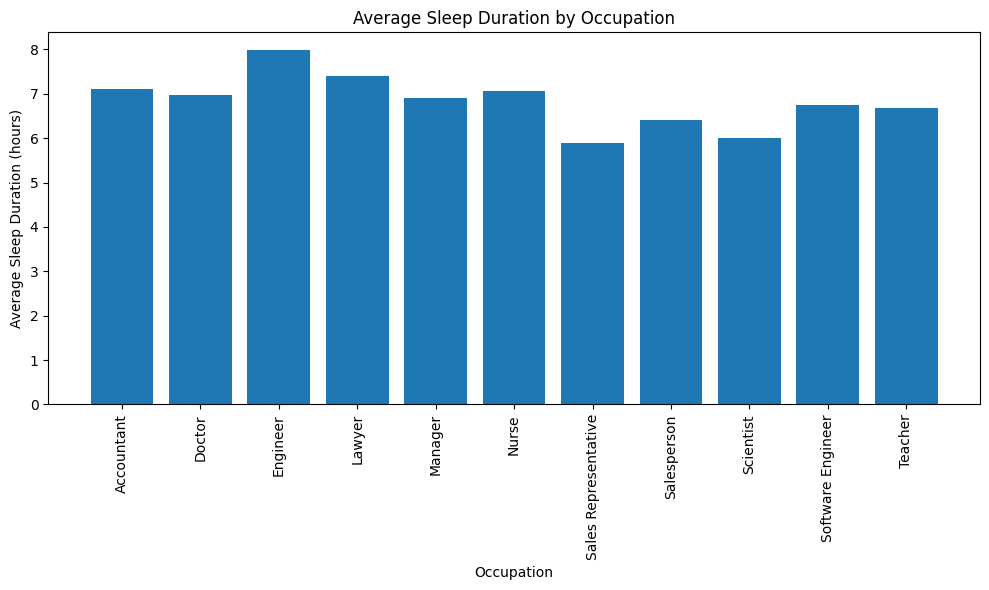

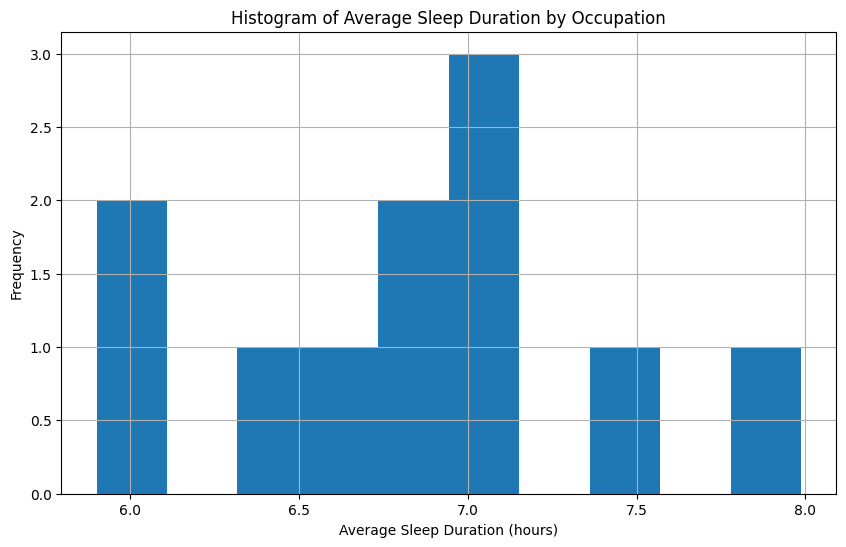

Index: 2
Description: Visualize the distribution of stress levels among all individuals


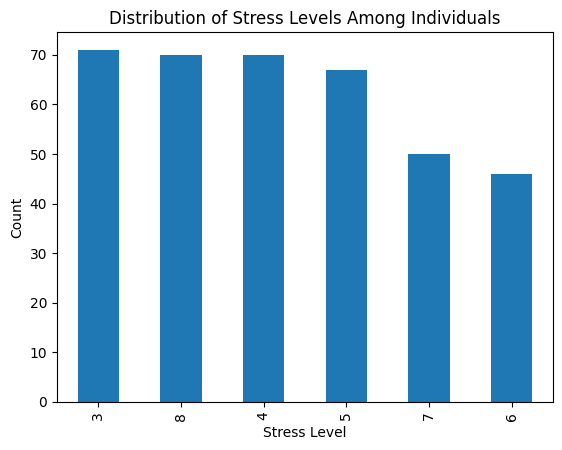

Index: 3
Description: Show the gender distribution in the dataset


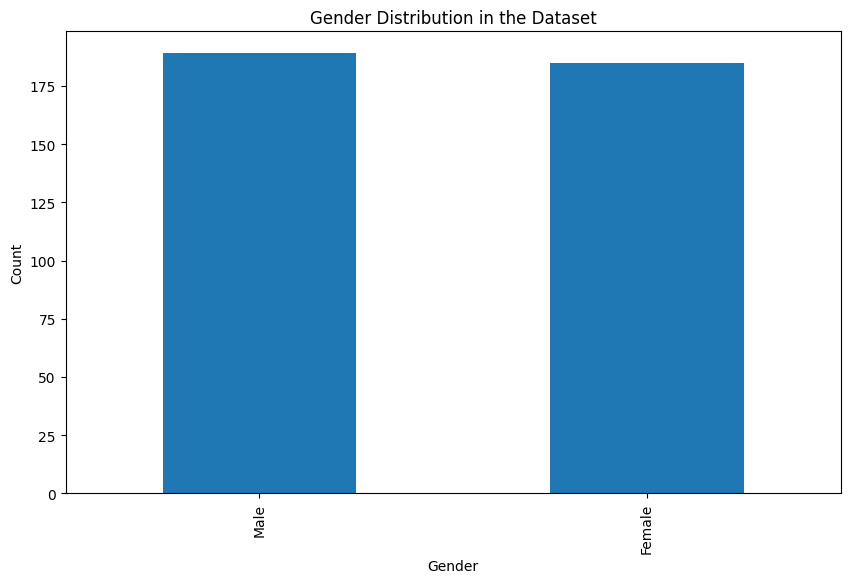

Index: 4
Description: Compare the average daily steps between people with and without a sleep disorder


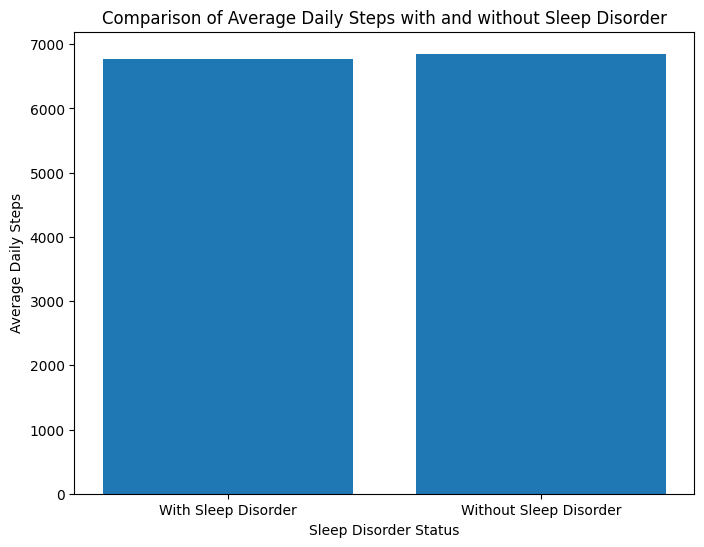

Index: 5
Description: Show how physical activity level relates to quality of sleep


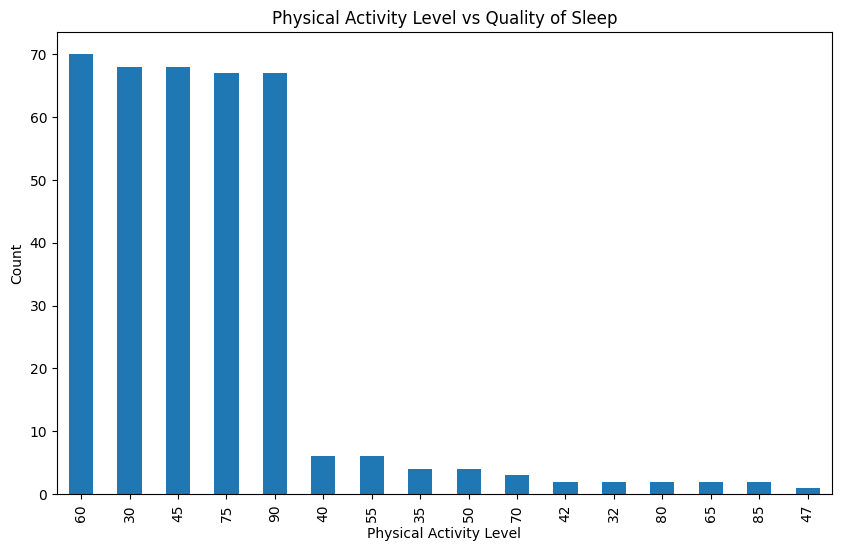

Index: 6
Description: Visualize the distribution of BMI categories among individuals
Exception '<' not supported between instances of 'float' and 'str' for index 6
Index: 7
Description: Compare the average heart rate of individuals with different stress levels


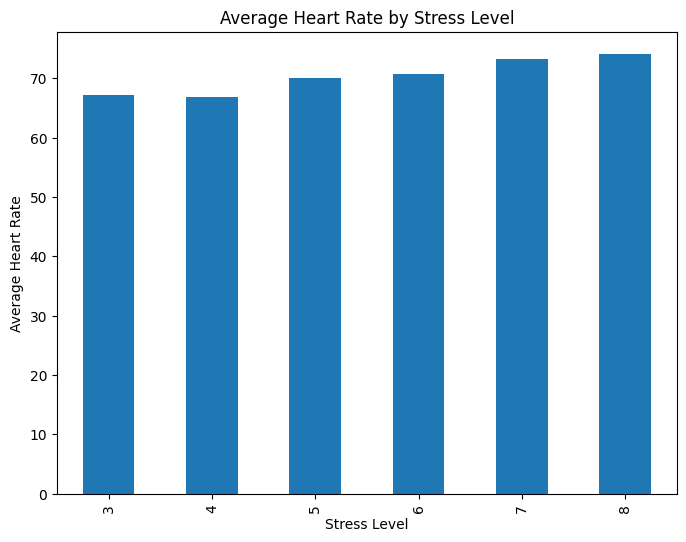

Index: 8
Description: Show the relationship between age and sleep duration


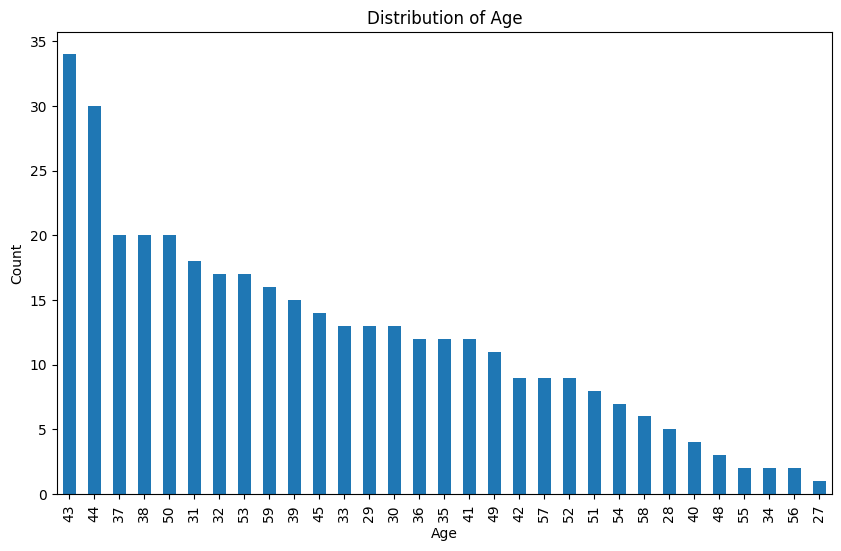

Correlation between age and sleep duration: 0.34470935816474385
Exception plot kind scatter can only be used for data frames for index 8
Index: 9
Description: Display the average quality of sleep for individuals grouped by occupation


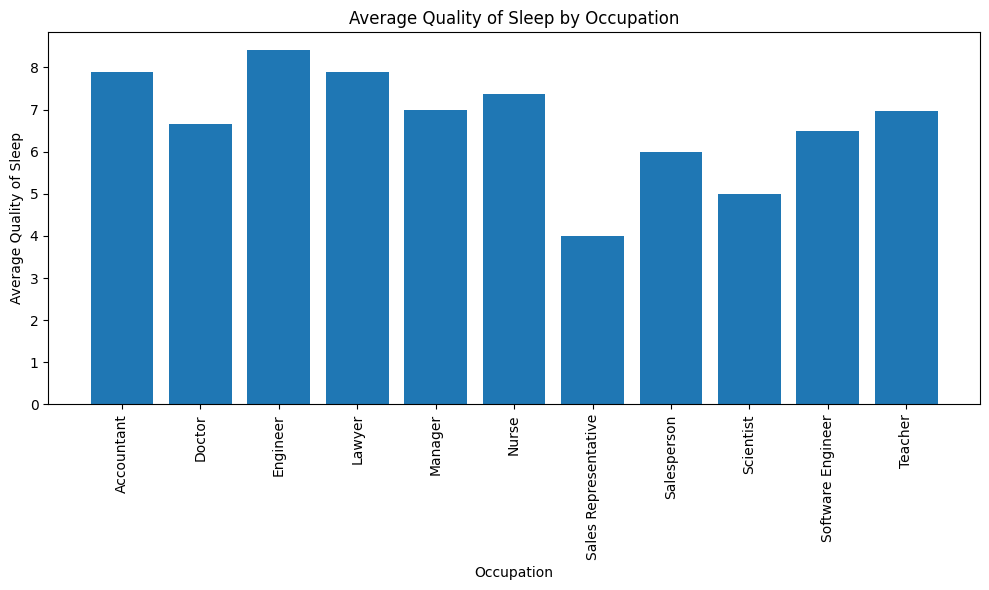

Index: 10
Description: Compare the average stress levels between males and females


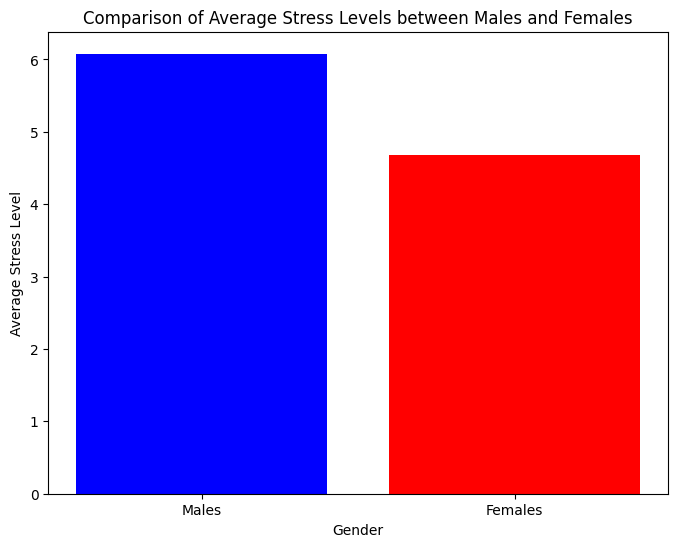

Index: 11
Description: Show the breakdown of sleep disorders reported in the dataset


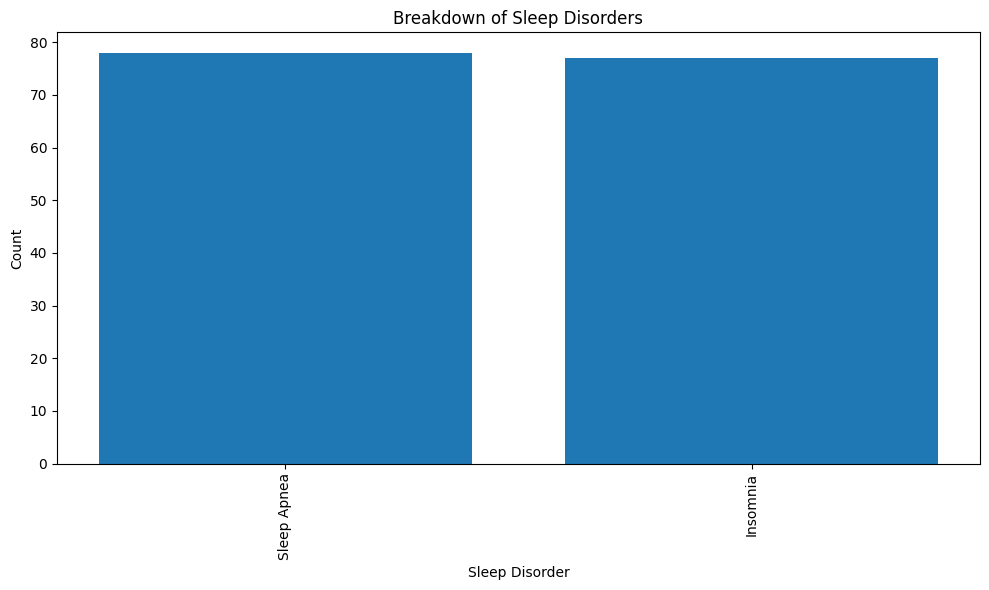

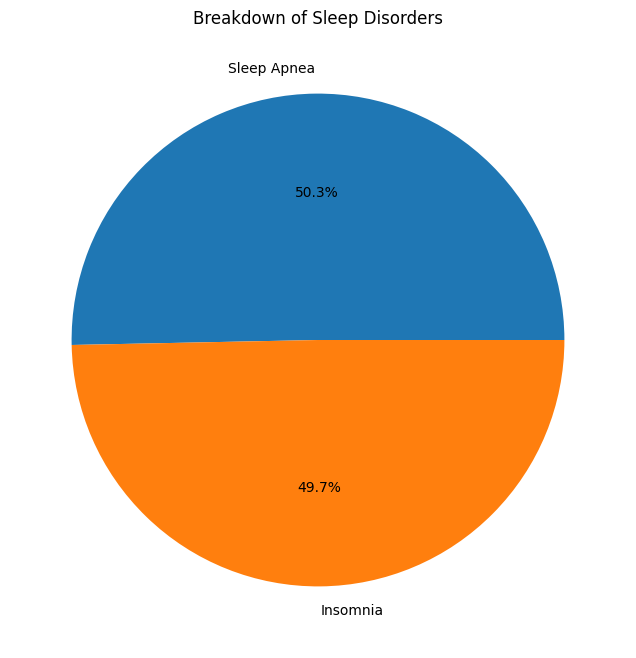

Index: 12
Description: Visualize the relationship between daily steps and heart rate


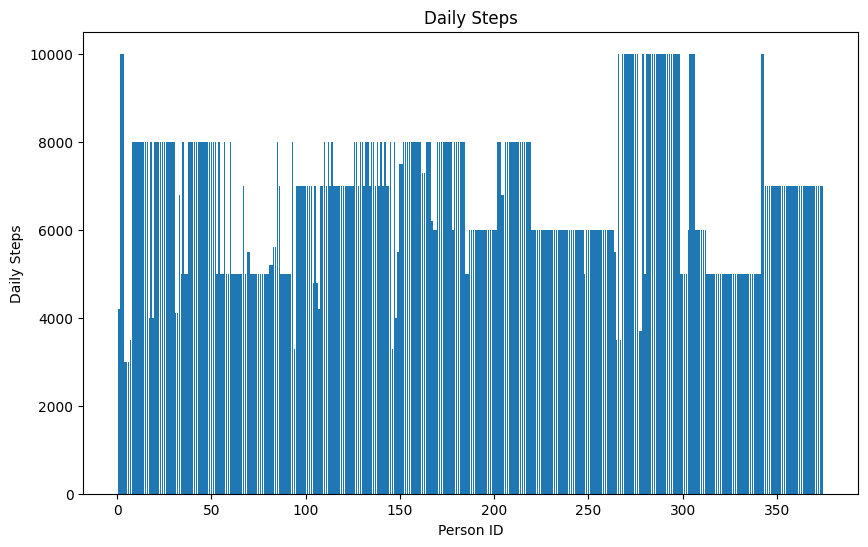

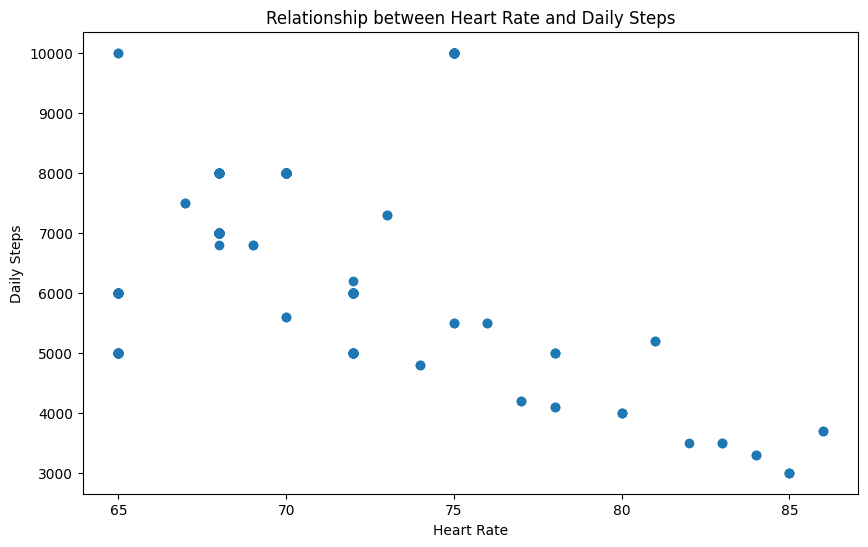

Index: 13
Description: Show the distribution of sleep duration values across the dataset


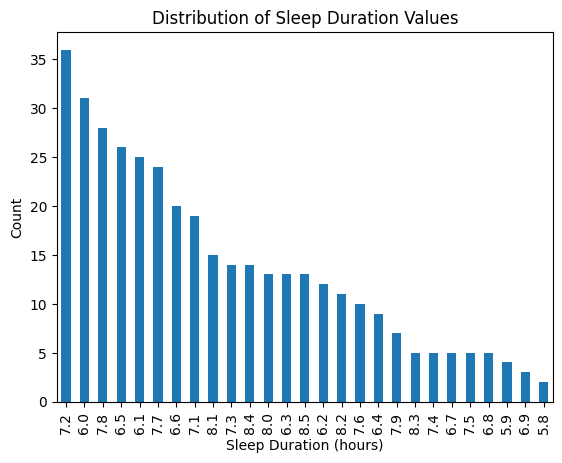

Index: 14
Description: Compare the average physical activity levels of individuals with and without sleep disorders


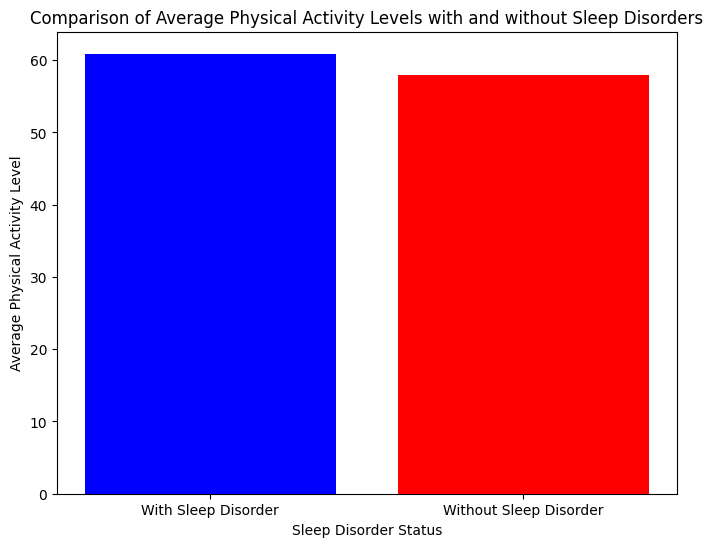

Index: 15
Description: Plot the relationship between stress level and sleep duration


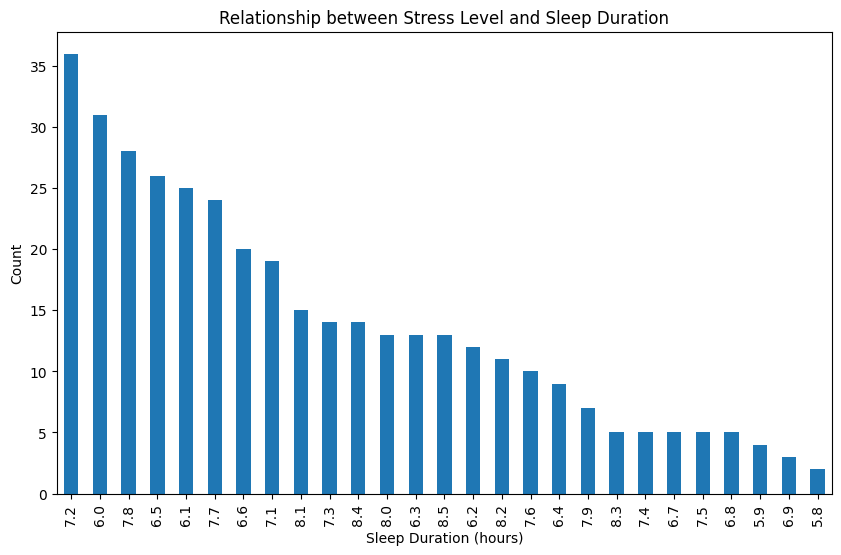

Index: 16
Description: Compare the average blood pressure readings among different BMI categories
Exception agg function failed [how->mean,dtype->object] for index 16
Index: 17
Description: Show the age distribution of individuals in the dataset
Exception Bin labels must be one fewer than the number of bin edges for index 17
Index: 18
Description: Compare the average sleep quality between individuals with different heart rate ranges
Exception Bin labels must be one fewer than the number of bin edges for index 18
Index: 19
Description: Visualize the relationship between daily steps and sleep quality


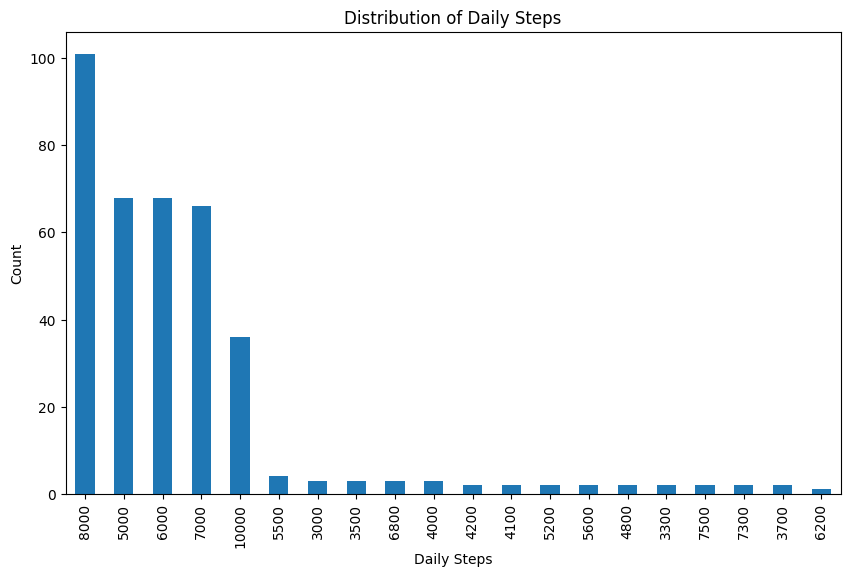

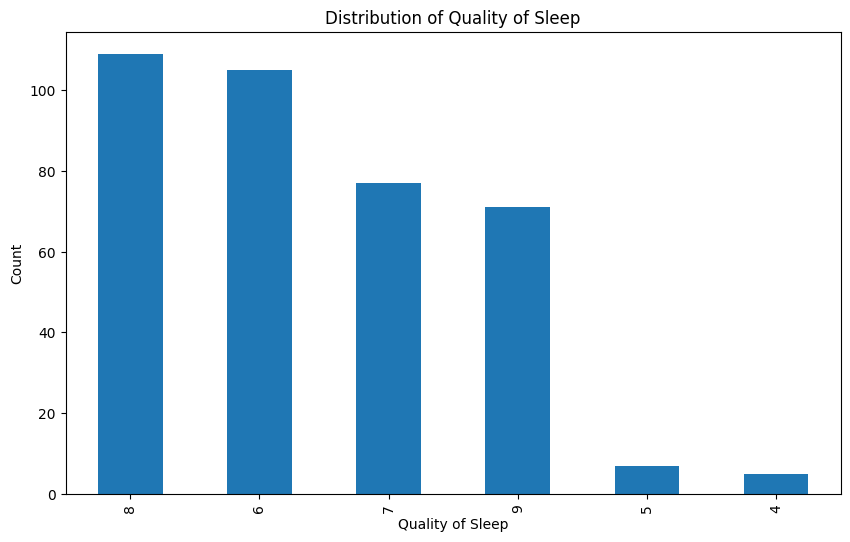

Index: 20
Description: Compare the average sleep duration of different BMI categories


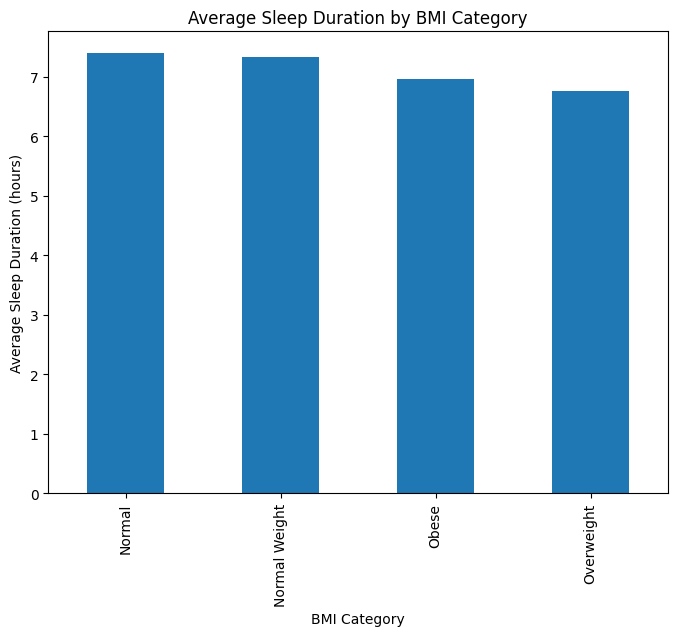

Exception list index out of range for index 21
Index: 22
Description: Visualize the distribution of daily steps among individuals


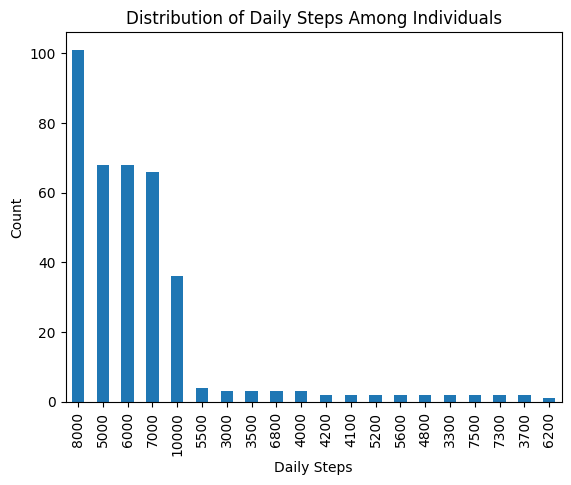

Index: 23
Description: Compare the average quality of sleep between individuals with and without sleep disorders


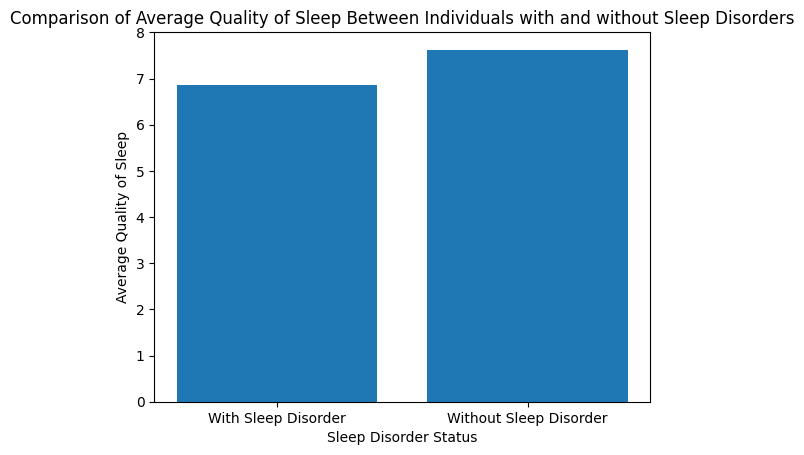

Index: 24
Description: Show the relationship between physical activity level and daily steps


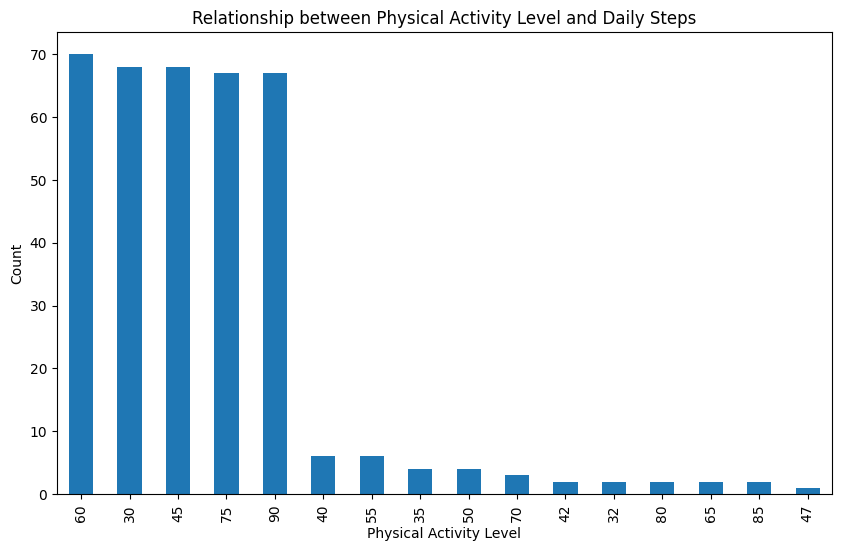

Index: 25
Description: Compare the average age of individuals across different occupations


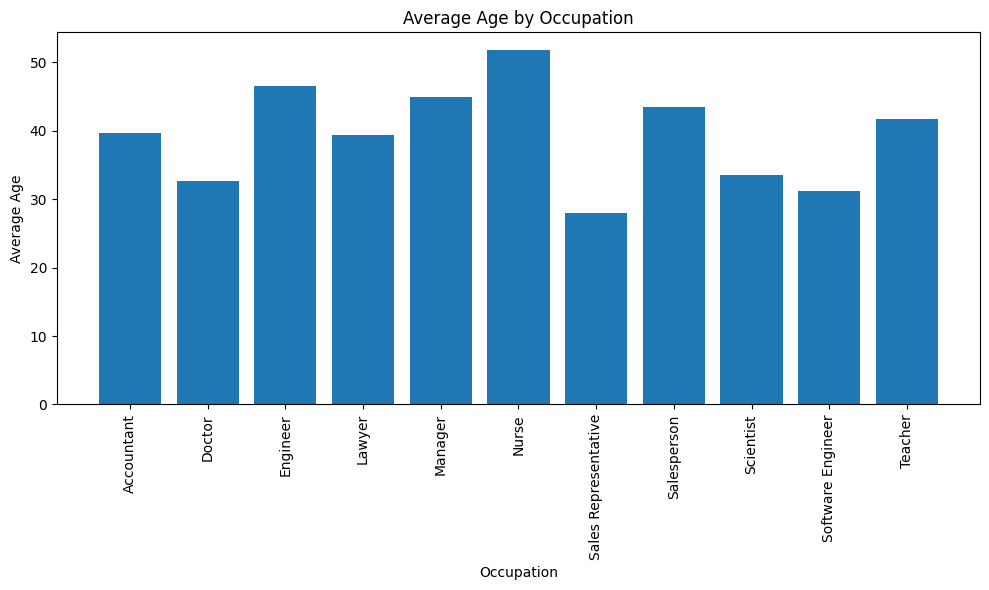

Index: 26
Description: Visualize the proportion of people in each stress level category
Exception shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (4,) and arg 1 with shape (6,). for index 26
Index: 27
Description: Show the relationship between age and heart rate
Exception The number of FixedLocator locations (33), usually from a call to set_ticks, does not match the number of labels (31). for index 27
Index: 28
Description: Compare the average sleep duration of males and females


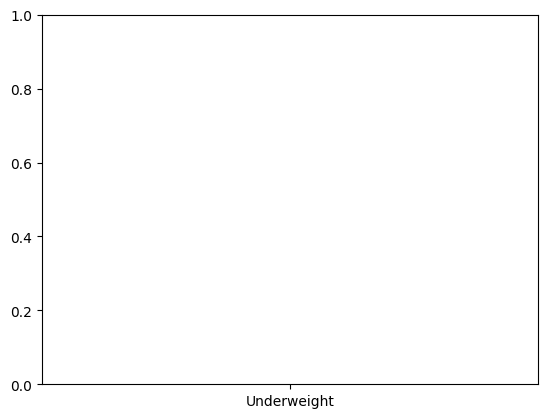

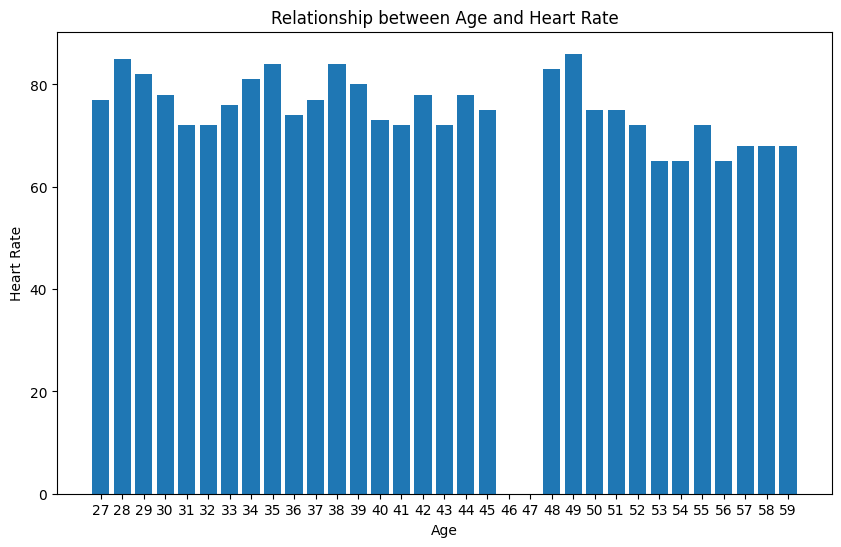

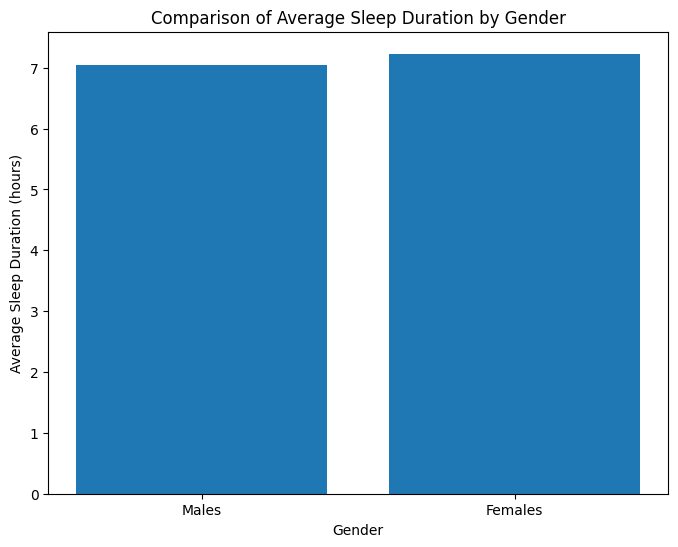

Index: 29
Description: Show the distribution of quality of sleep values in the dataset


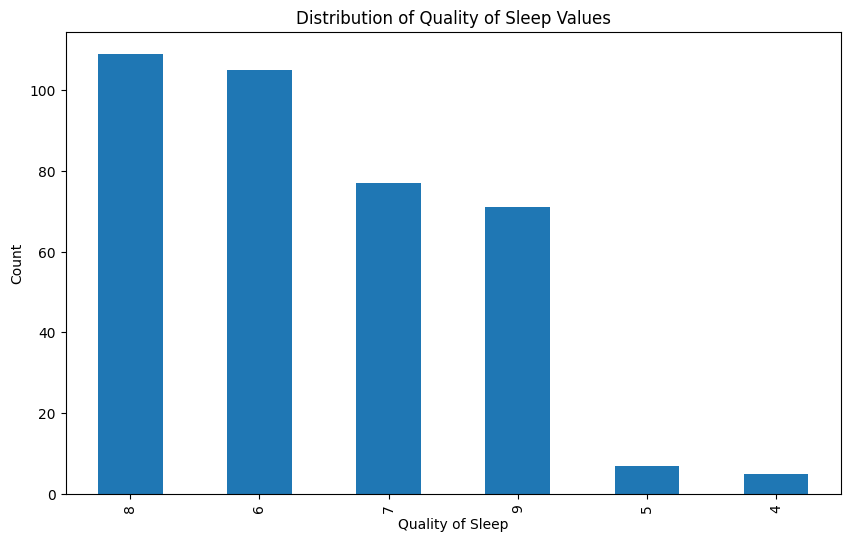

8/30


In [45]:
results = []
errors = 0
for index, row in train_df.iterrows():
    try:
        user_message = f"""{row["description"]}

        Example data:
        {df.head(5).to_string()}"""
        
        result = generate(system_message, user_message, "llama3.2:3b-instruct-q4_K_S")
        chart_type = get_chart_type(result.message.content)
        chart_code = get_chart_code(result.message.content)
        print(f"Index: {index}")
        print(f"Description: {row["description"]}")
        exec(chart_code)
        results.append({
            "index": index,
            "success": 1,
            "chart_type": chart_type,
            "expected_chart_type": row["chart_type"],
            "chart_code": chart_code,
            "hit": int(chart_type.lower() == row["chart_type"].lower()),
            "hand_check": "/"
        })
    except Exception as e:
        print(f"Exception {e} for index {index}")
        results.append({
            "index": index,
            "success": 0,
            "chart_type": "",
            "chart_code": "",
            "hit": 0,
            "hand_check": 0
        })
        errors += 1

print(f"{errors}/{len(train_df)}")

In [46]:
save_json("data/llama-32-generation-ask.json", results)

#### LLama 3.1 8B

Index: 0
Description: Show the relationship between sleep duration and quality of sleep


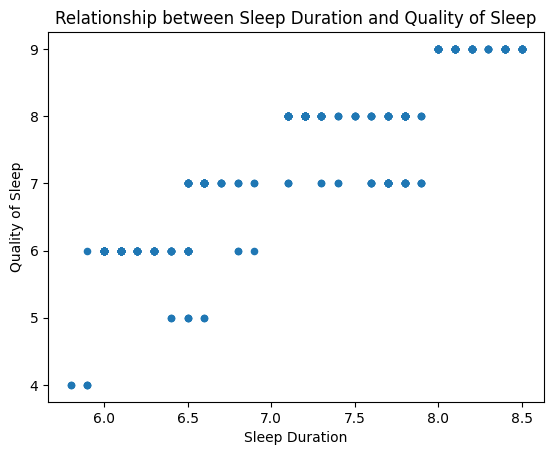

Index: 1
Description: Compare the average sleep duration across different occupations


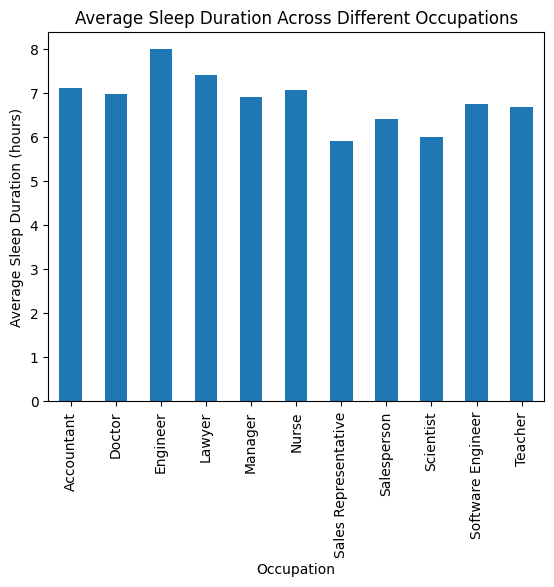

Index: 2
Description: Visualize the distribution of stress levels among all individuals


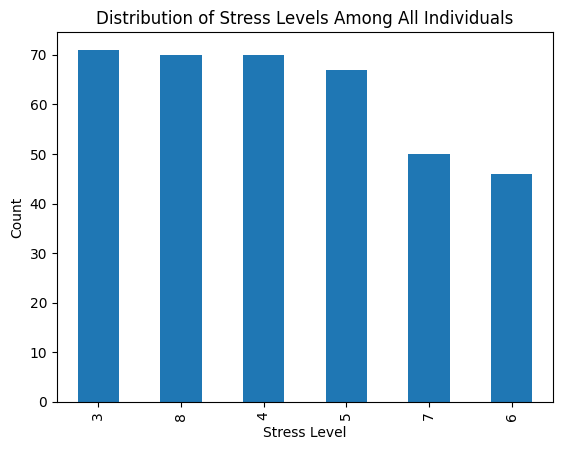

Index: 3
Description: Show the gender distribution in the dataset


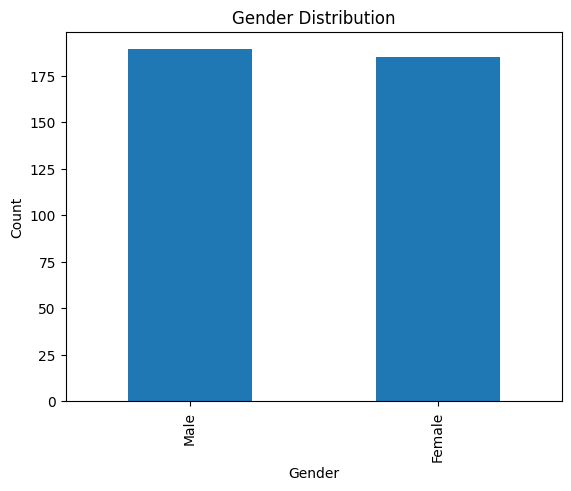

Index: 4
Description: Compare the average daily steps between people with and without a sleep disorder


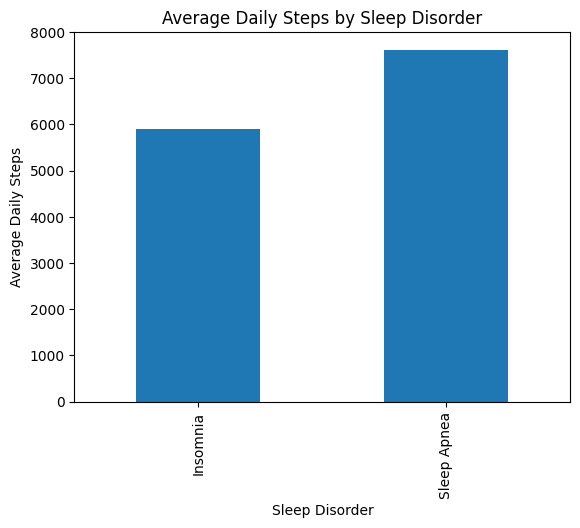

Index: 5
Description: Show how physical activity level relates to quality of sleep


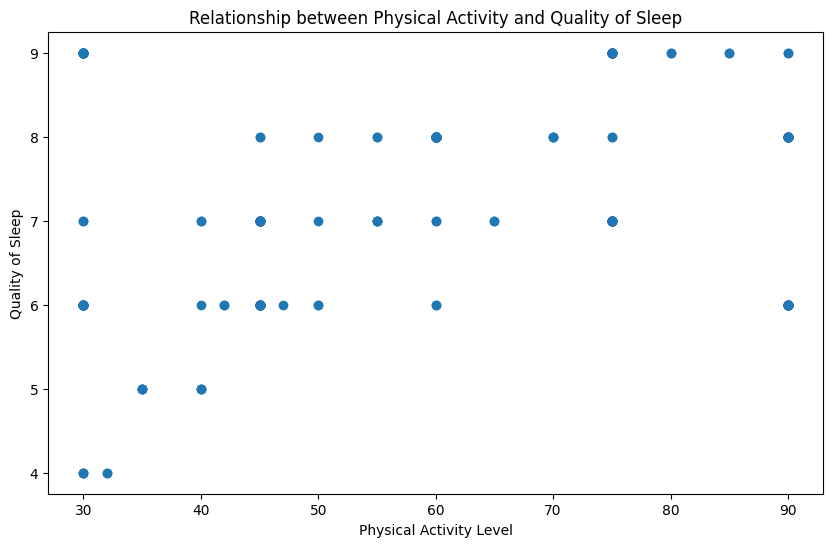

Index: 6
Description: Visualize the distribution of BMI categories among individuals


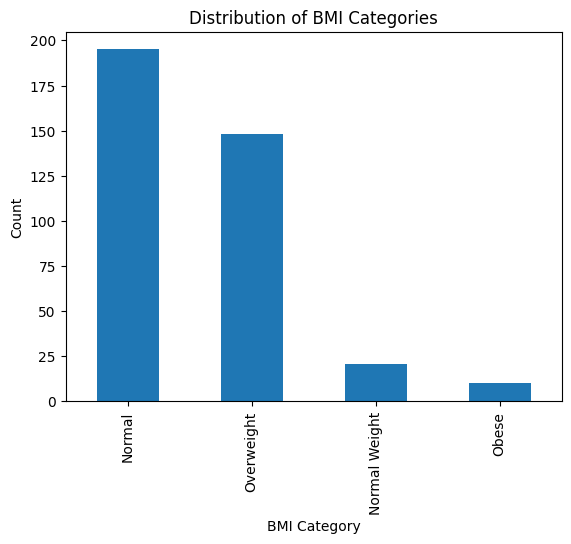

Index: 7
Description: Compare the average heart rate of individuals with different stress levels


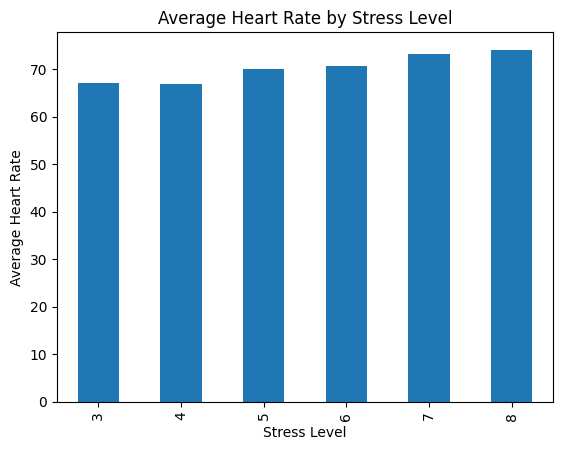

Index: 8
Description: Show the relationship between age and sleep duration


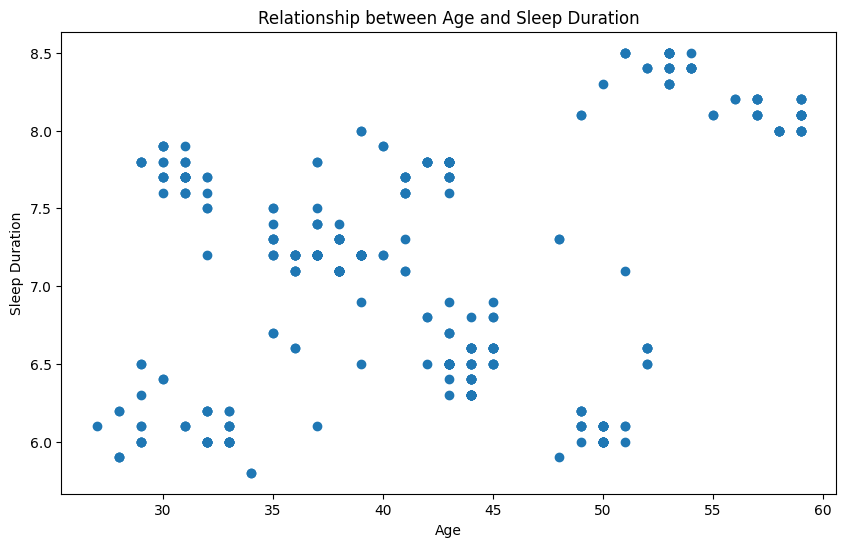

Index: 9
Description: Display the average quality of sleep for individuals grouped by occupation


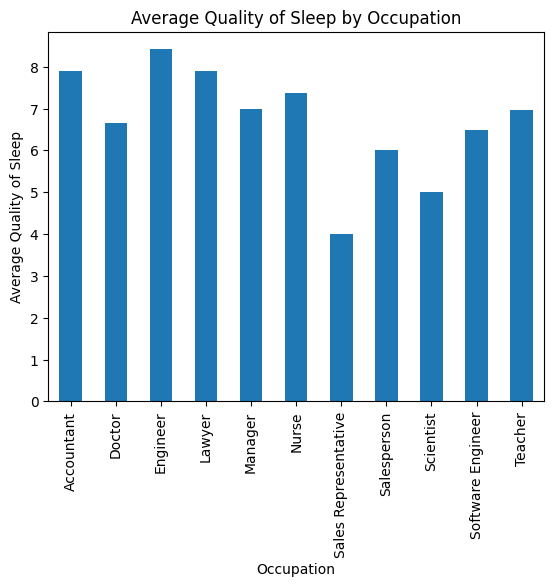

Index: 10
Description: Compare the average stress levels between males and females


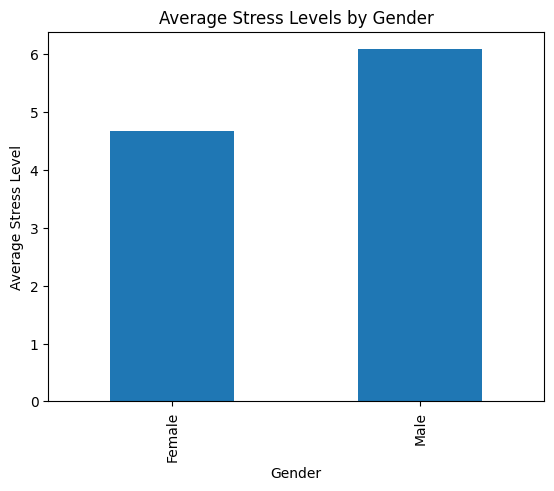

Index: 11
Description: Show the breakdown of sleep disorders reported in the dataset


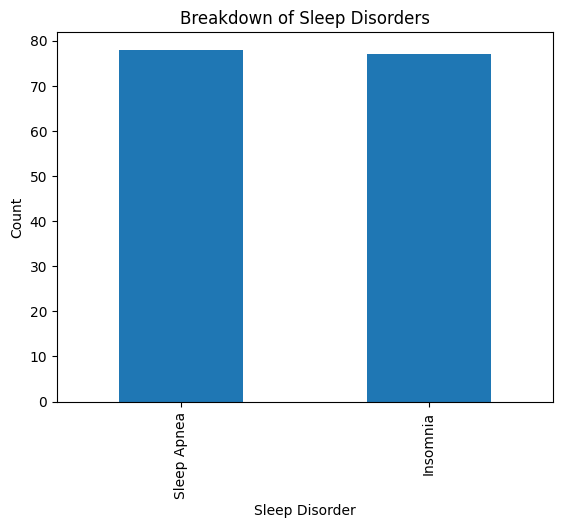

Index: 12
Description: Visualize the relationship between daily steps and heart rate


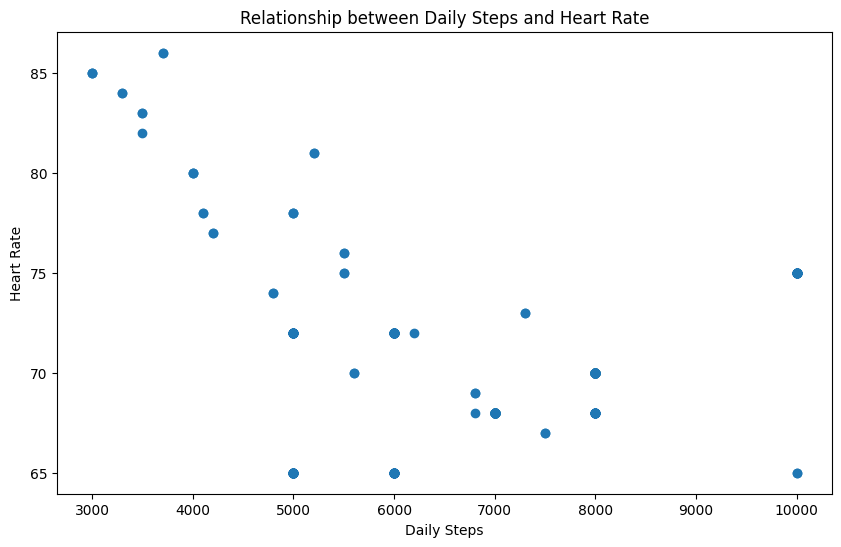

Index: 13
Description: Show the distribution of sleep duration values across the dataset


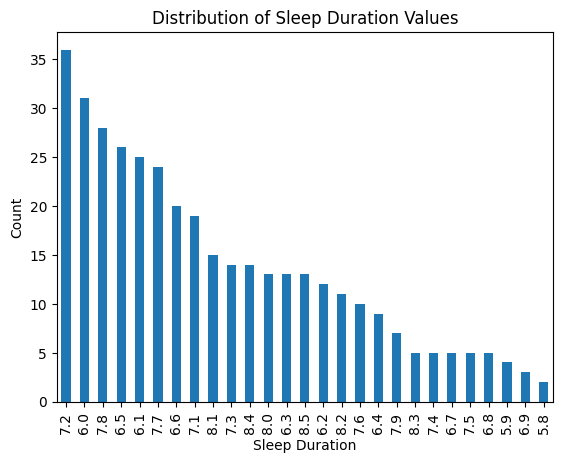

Index: 14
Description: Compare the average physical activity levels of individuals with and without sleep disorders


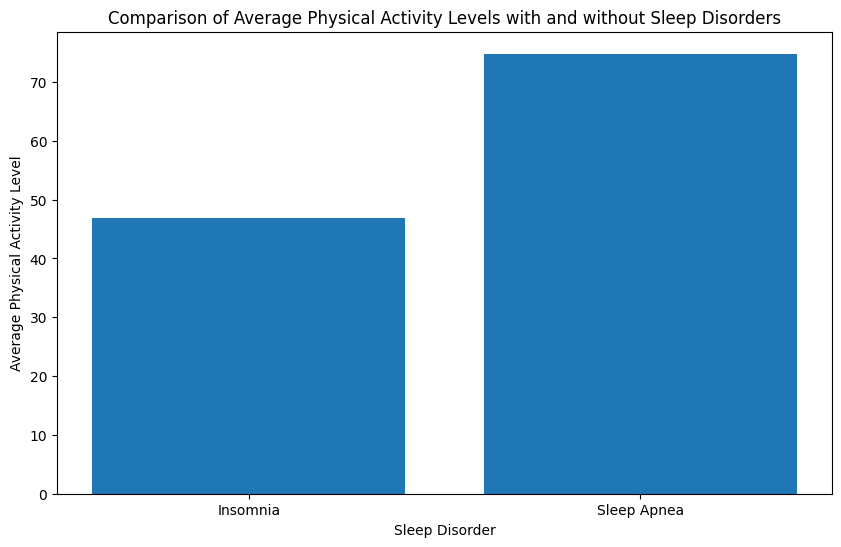

Index: 15
Description: Plot the relationship between stress level and sleep duration


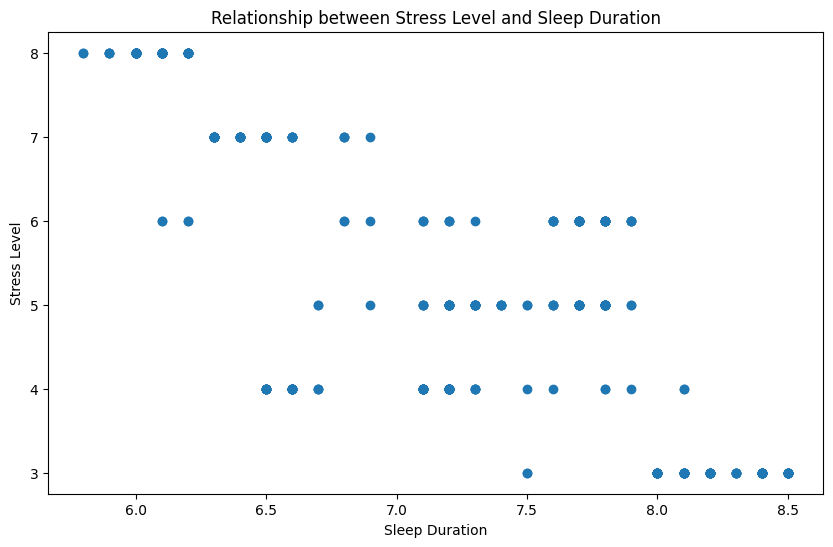

Index: 16
Description: Compare the average blood pressure readings among different BMI categories
Exception agg function failed [how->mean,dtype->object] for index 16
Index: 17
Description: Show the age distribution of individuals in the dataset


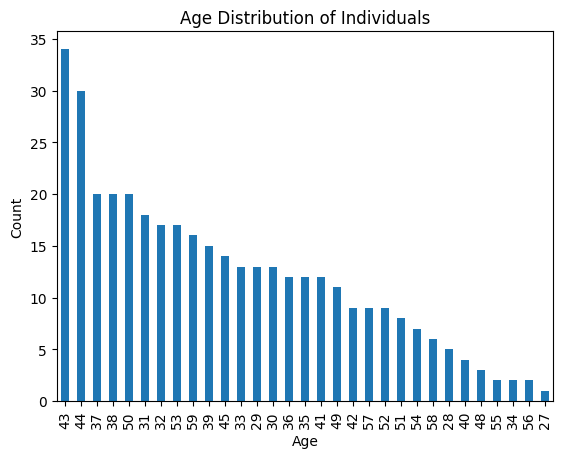

Index: 18
Description: Compare the average sleep quality between individuals with different heart rate ranges
Exception Failed to convert value(s) to axis units: ['Medium', 'High', 'Low']
Categories (3, object): ['Low' < 'Medium' < 'High'] for index 18
Index: 19
Description: Visualize the relationship between daily steps and sleep quality


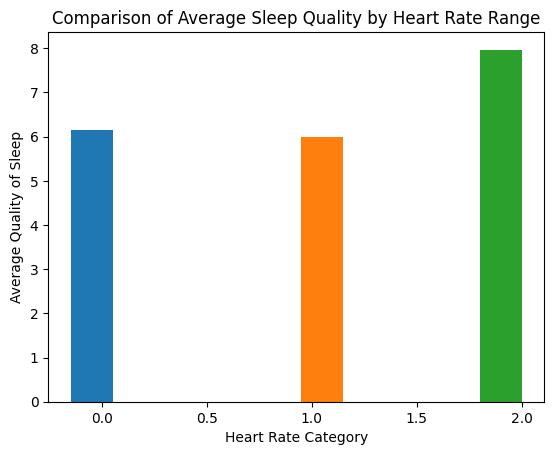

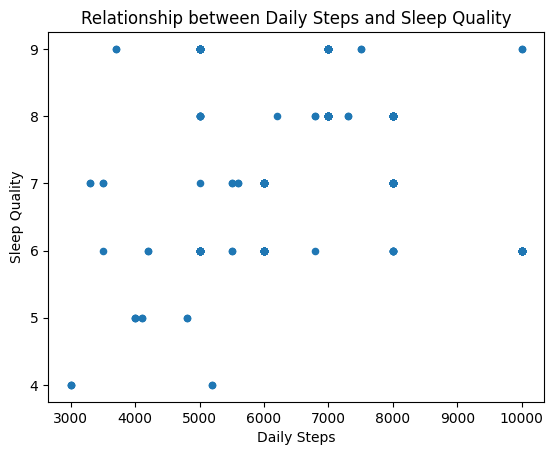

Index: 20
Description: Compare the average sleep duration of different BMI categories


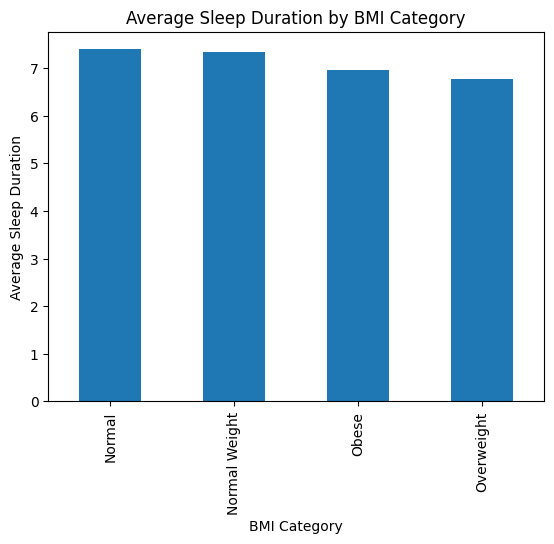

Index: 21
Description: Show the relationship between stress level and heart rate


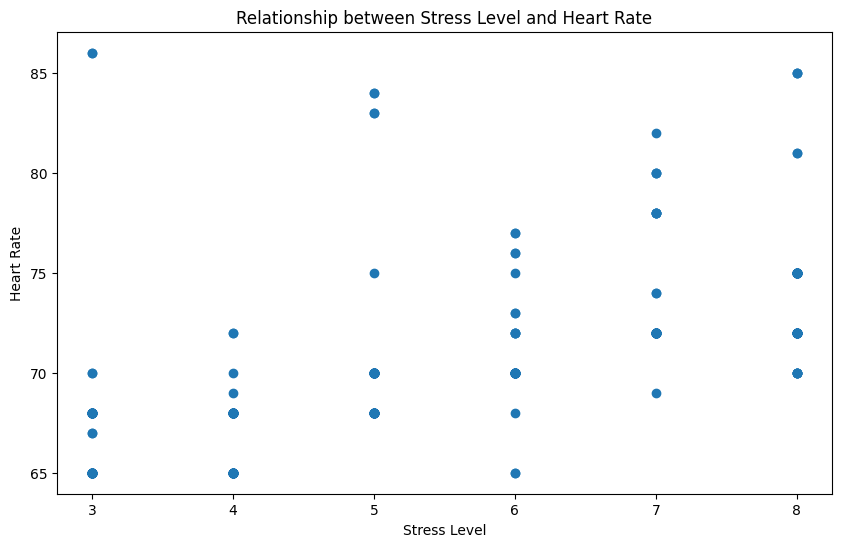

Index: 22
Description: Visualize the distribution of daily steps among individuals


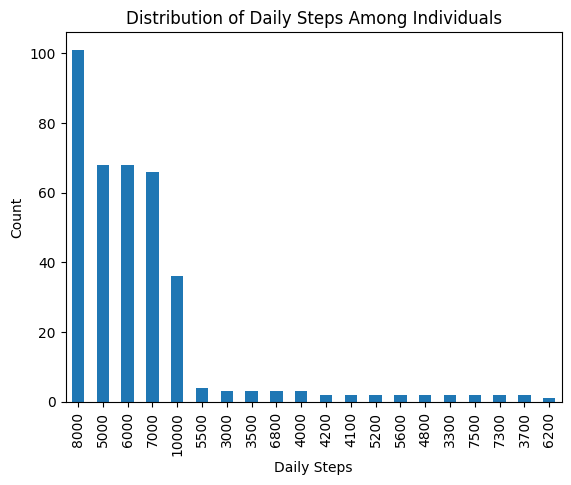

Index: 23
Description: Compare the average quality of sleep between individuals with and without sleep disorders


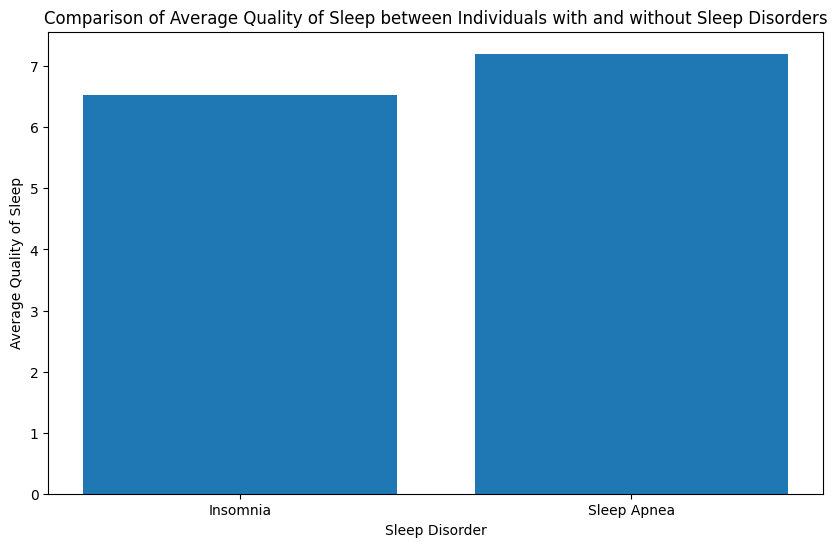

Index: 24
Description: Show the relationship between physical activity level and daily steps


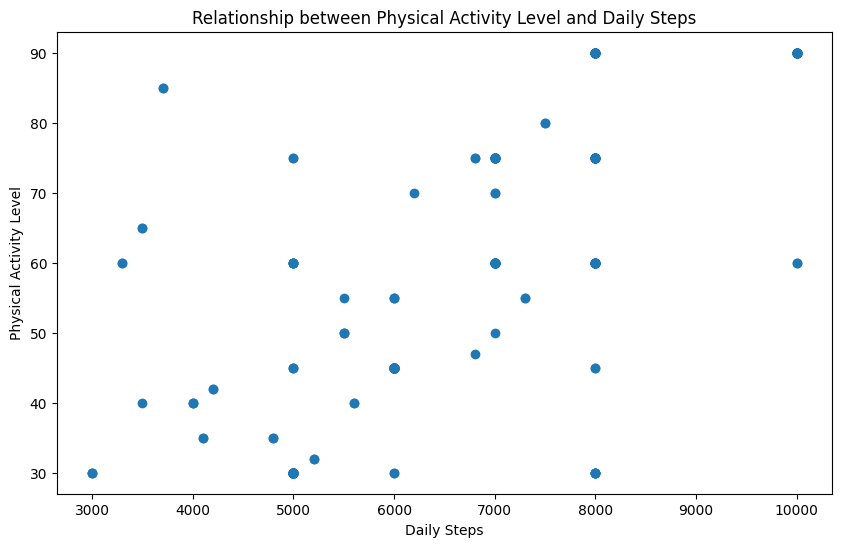

Index: 25
Description: Compare the average age of individuals across different occupations


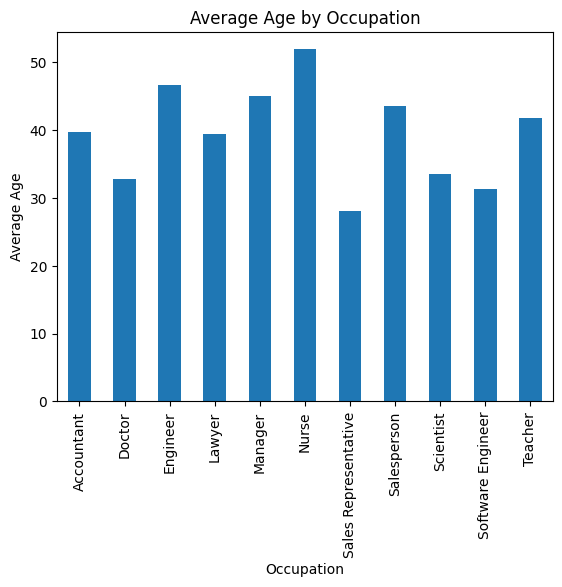

Index: 26
Description: Visualize the proportion of people in each stress level category


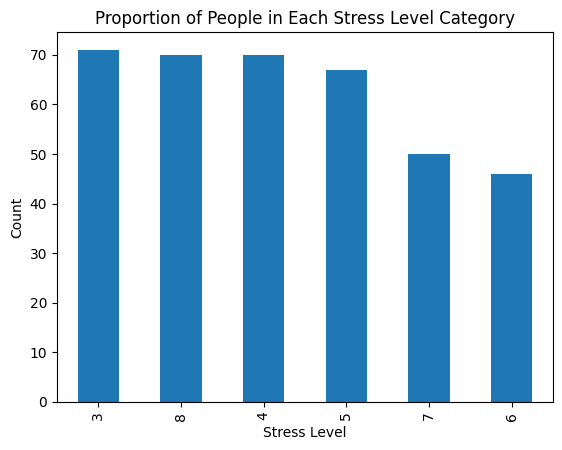

Index: 27
Description: Show the relationship between age and heart rate


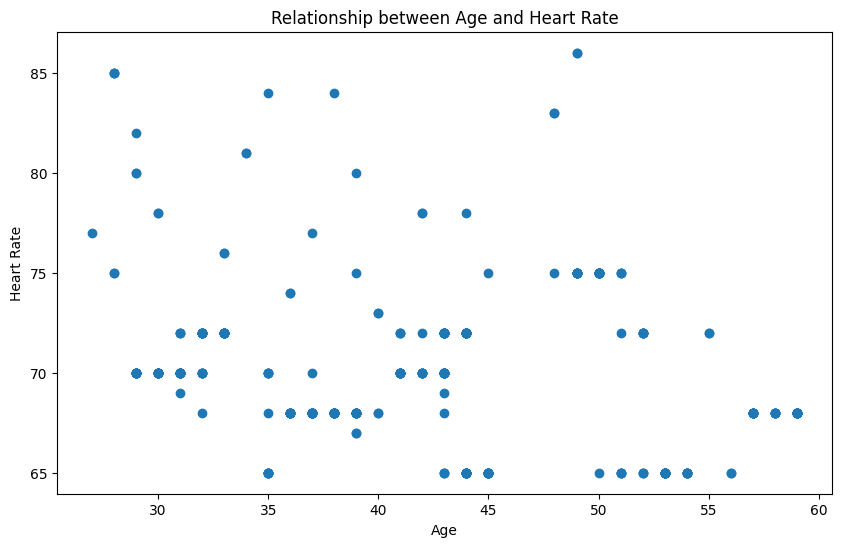

Index: 28
Description: Compare the average sleep duration of males and females


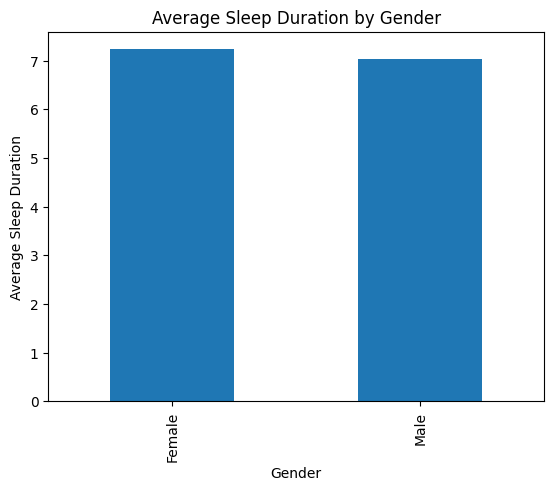

Index: 29
Description: Show the distribution of quality of sleep values in the dataset


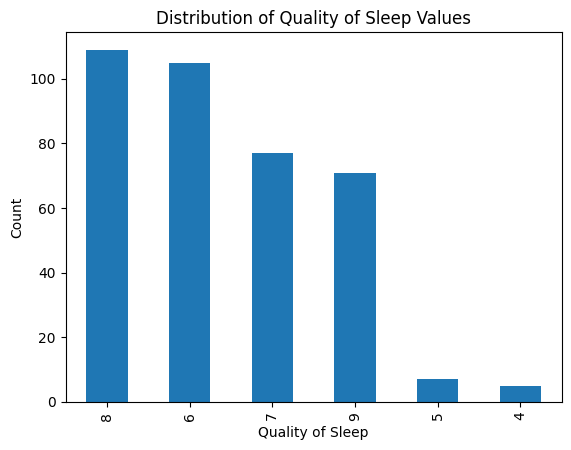

2/30


In [10]:
results = []
errors = 0
for index, row in train_df.iterrows():
    try:
        user_message = f"""{row["description"]}

        Example data:
        {df.head(5).to_string()}"""
        
        result = generate(system_message, user_message, "llama3.1:8b-instruct-q4_K_S")
        chart_type = get_chart_type(result.message.content)
        chart_code = get_chart_code(result.message.content)
        print(f"Index: {index}")
        print(f"Description: {row["description"]}")
        exec(chart_code)
        results.append({
            "index": index,
            "success": 1,
            "chart_type": chart_type,
            "expected_chart_type": row["chart_type"],
            "chart_code": chart_code,
            "hit": int(chart_type.lower() == row["chart_type"].lower()),
            "hand_check": "/"
        })
    except Exception as e:
        print(f"Exception {e} for index {index}")
        results.append({
            "index": index,
            "success": 0,
            "chart_type": "",
            "chart_code": "",
            "hit": 0,
            "hand_check": 0
        })
        errors += 1

print(f"{errors}/{len(train_df)}")

In [11]:
save_json("data/llama-31-generation-ask.json", results)

#### Deepseek 7b

Index: 0
Description: Show the relationship between sleep duration and quality of sleep


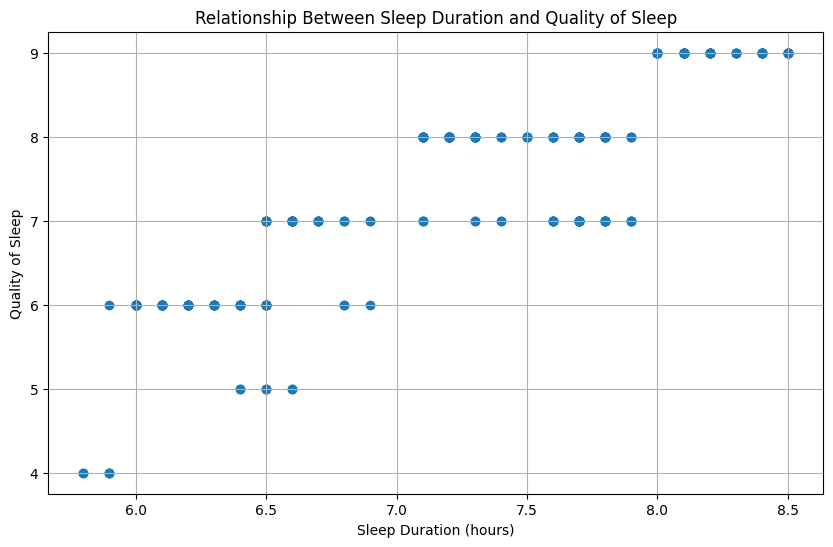

Index: 1
Description: Compare the average sleep duration across different occupations


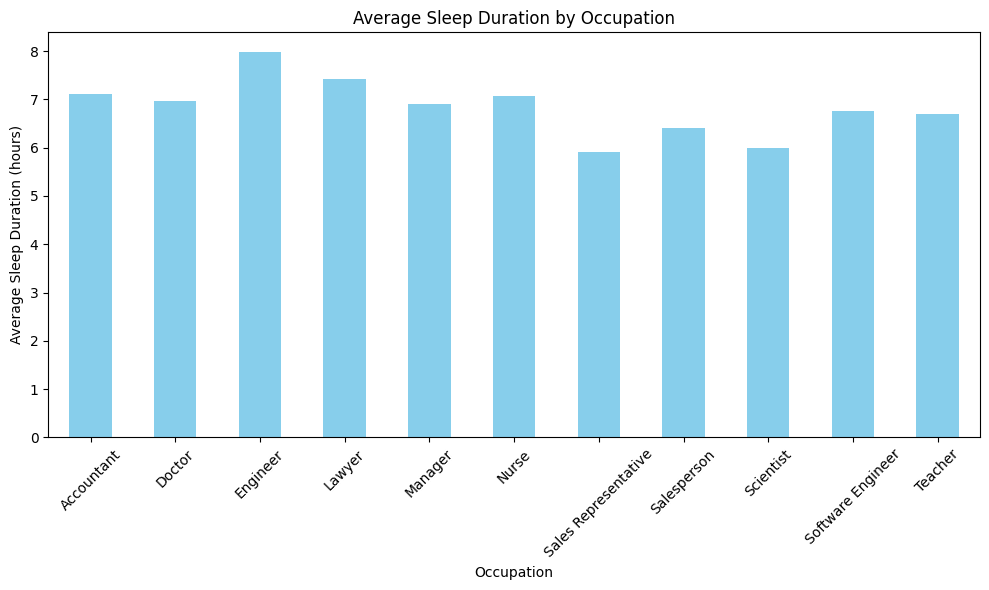

Index: 2
Description: Visualize the distribution of stress levels among all individuals
Index: 3
Description: Show the gender distribution in the dataset


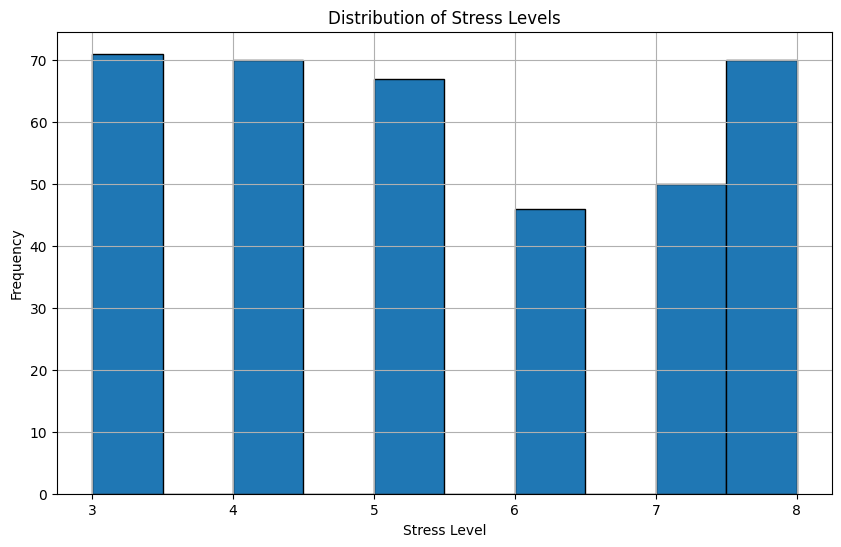

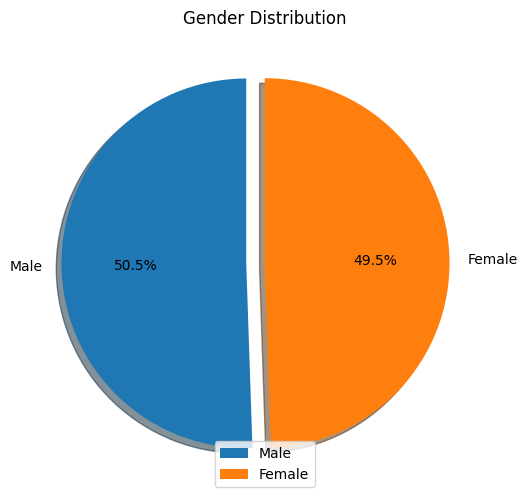

Index: 4
Description: Compare the average daily steps between people with and without a sleep disorder
Exception agg function failed [how->mean,dtype->object] for index 4
Index: 5
Description: Show how physical activity level relates to quality of sleep


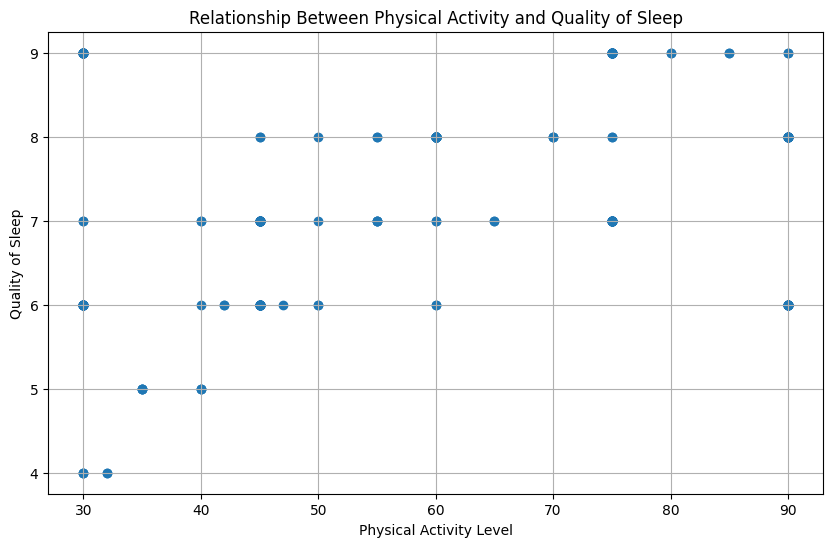

Index: 6
Description: Visualize the distribution of BMI categories among individuals
Exception 'explode' must be of length 'x', not 3 for index 6
Index: 7
Description: Compare the average heart rate of individuals with different stress levels


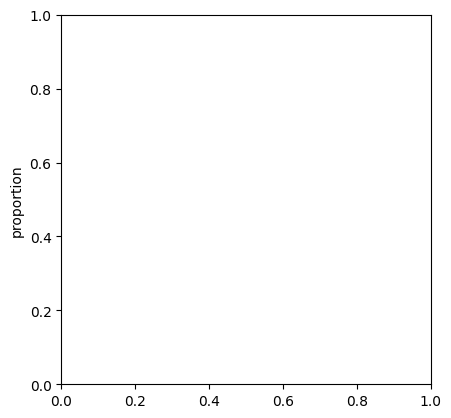

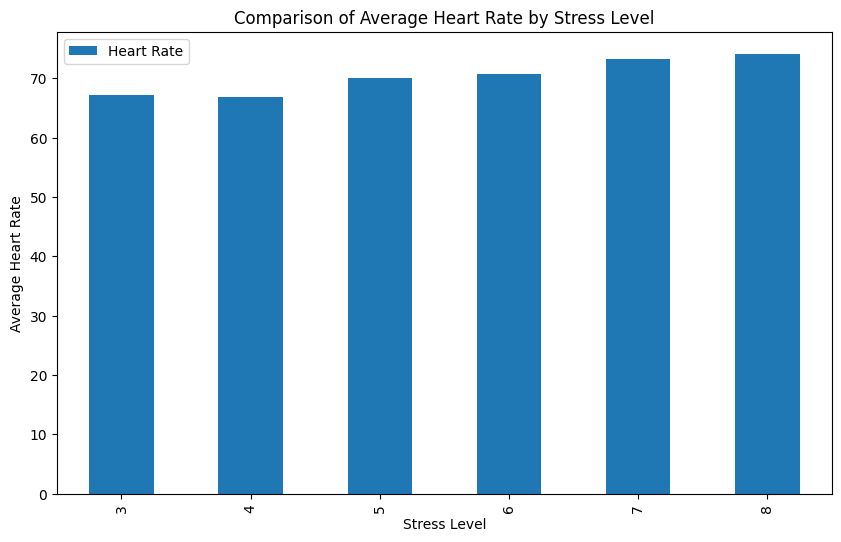

Index: 8
Description: Show the relationship between age and sleep duration
Exception list index out of range for index 9
Index: 10
Description: Compare the average stress levels between males and females


<Figure size 1000x600 with 0 Axes>

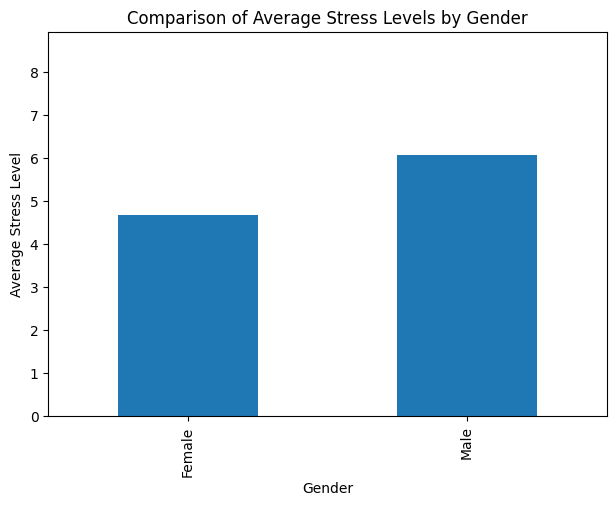

Index: 11
Description: Show the breakdown of sleep disorders reported in the dataset


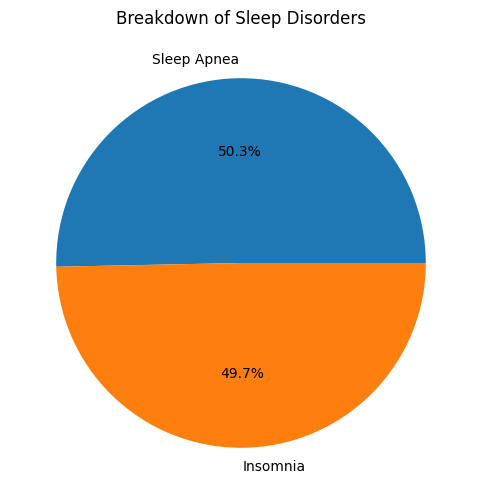

Index: 12
Description: Visualize the relationship between daily steps and heart rate


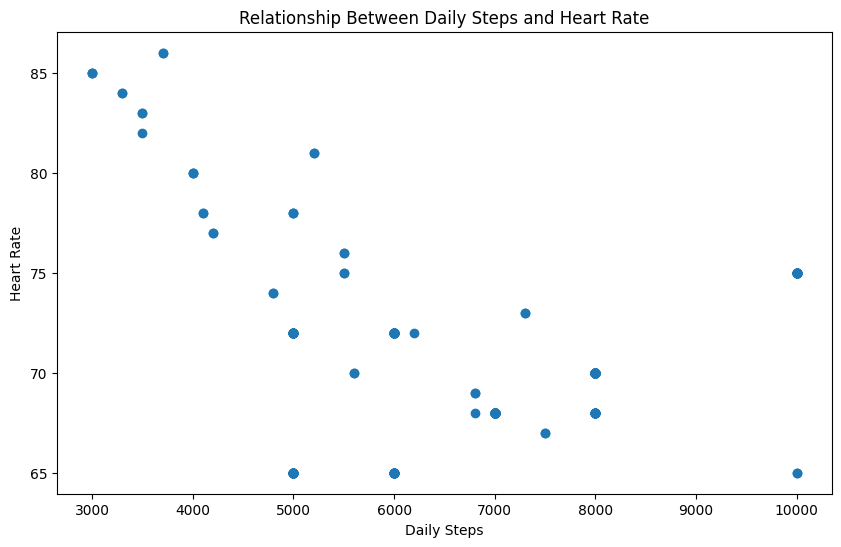

Index: 13
Description: Show the distribution of sleep duration values across the dataset
Exception unexpected indent (<string>, line 1) for index 13
Index: 14
Description: Compare the average physical activity levels of individuals with and without sleep disorders


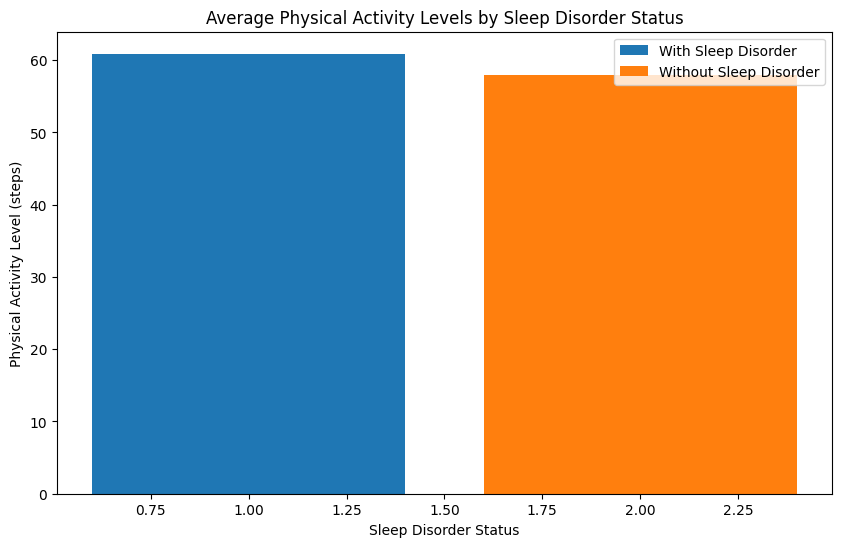

Index: 15
Description: Plot the relationship between stress level and sleep duration


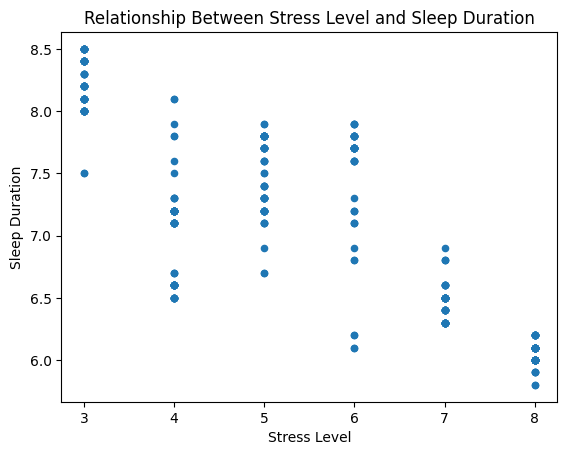

Index: 16
Description: Compare the average blood pressure readings among different BMI categories
Exception agg function failed [how->mean,dtype->object] for index 16
Index: 17
Description: Show the age distribution of individuals in the dataset


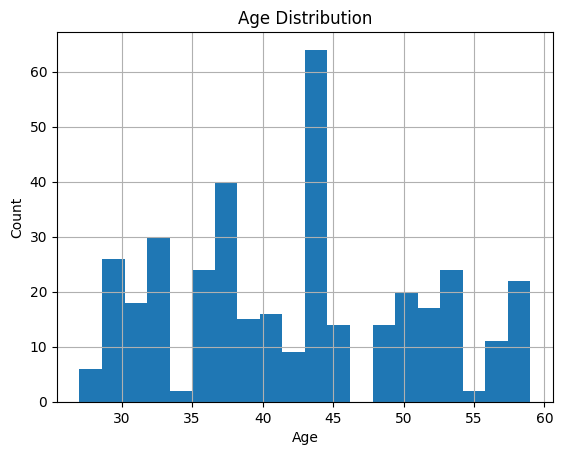

Index: 18
Description: Compare the average sleep quality between individuals with different heart rate ranges


<string>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


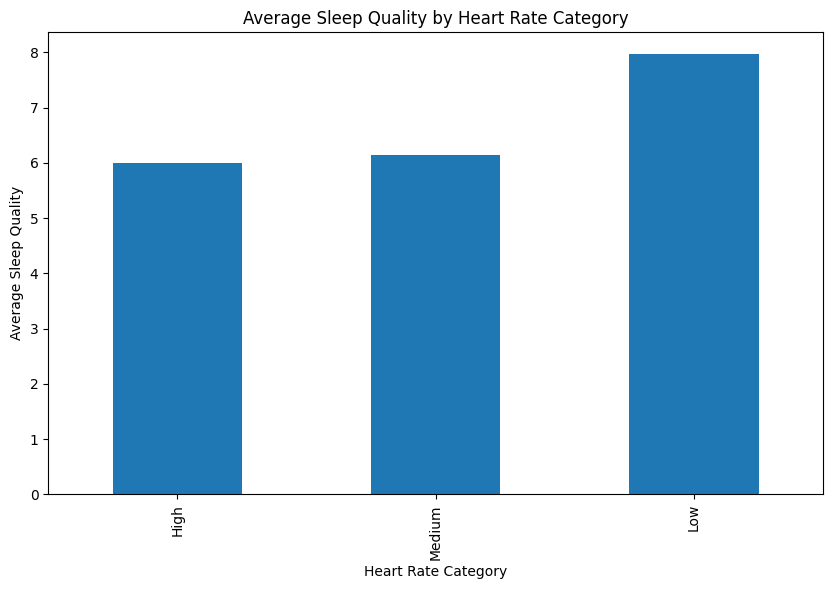

Index: 19
Description: Visualize the relationship between daily steps and sleep quality
Exception unexpected indent (<string>, line 1) for index 19
Index: 20
Description: Compare the average sleep duration of different BMI categories


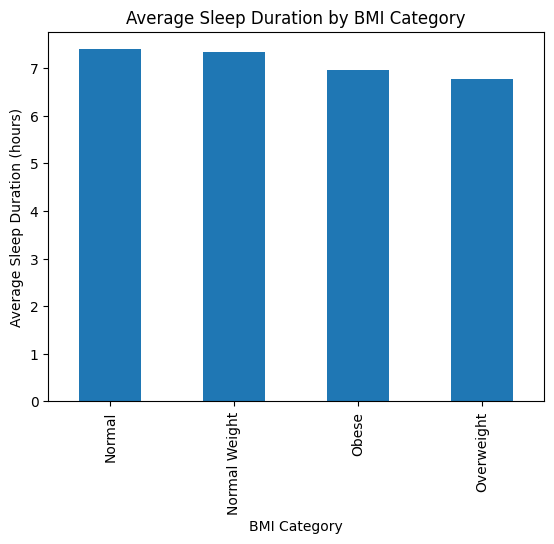

Index: 21
Description: Show the relationship between stress level and heart rate
Exception [Errno 2] No such file or directory: 'your_dataset.csv' for index 21
Index: 22
Description: Visualize the distribution of daily steps among individuals
Index: 23
Description: Compare the average quality of sleep between individuals with and without sleep disorders


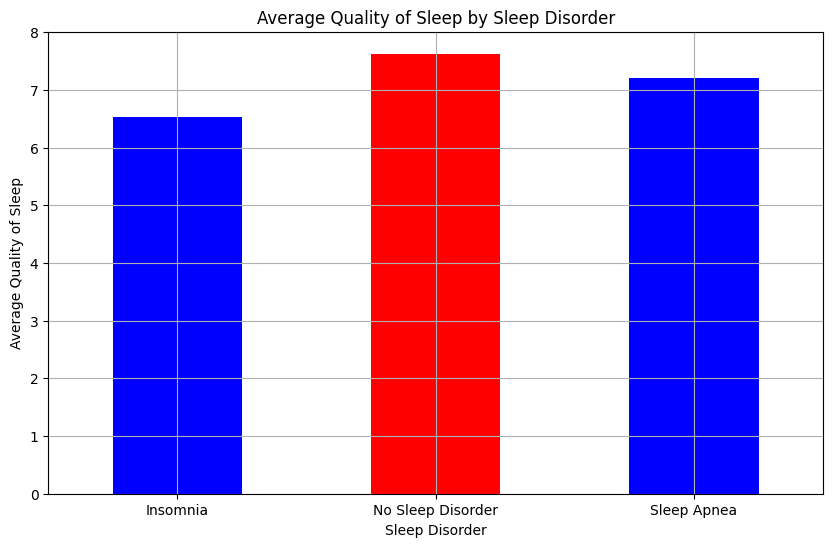

Index: 24
Description: Show the relationship between physical activity level and daily steps
Exception 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0       blue
1      green
2      green
3        NaN
4        NaN
       ...  
369     blue
370     blue
371     blue
372     blue
373     blue
Name: BMI Category, Length: 374, dtype: object for index 24
Index: 25
Description: Compare the average age of individuals across different occupations


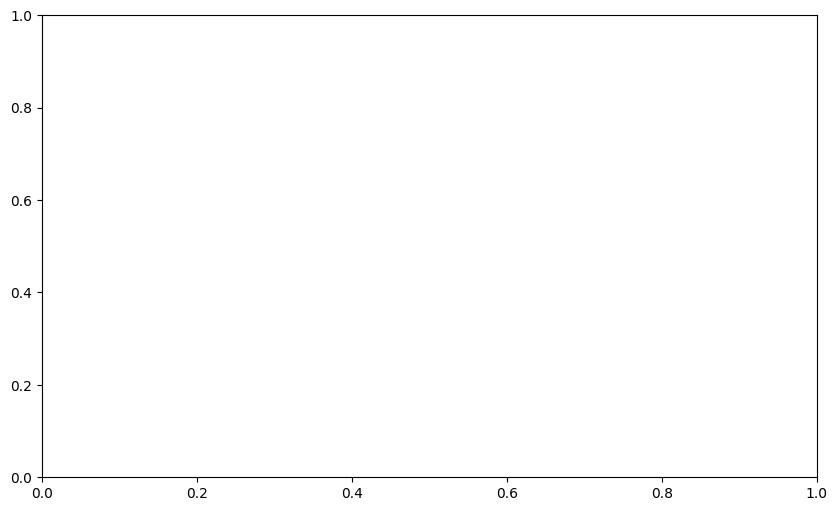

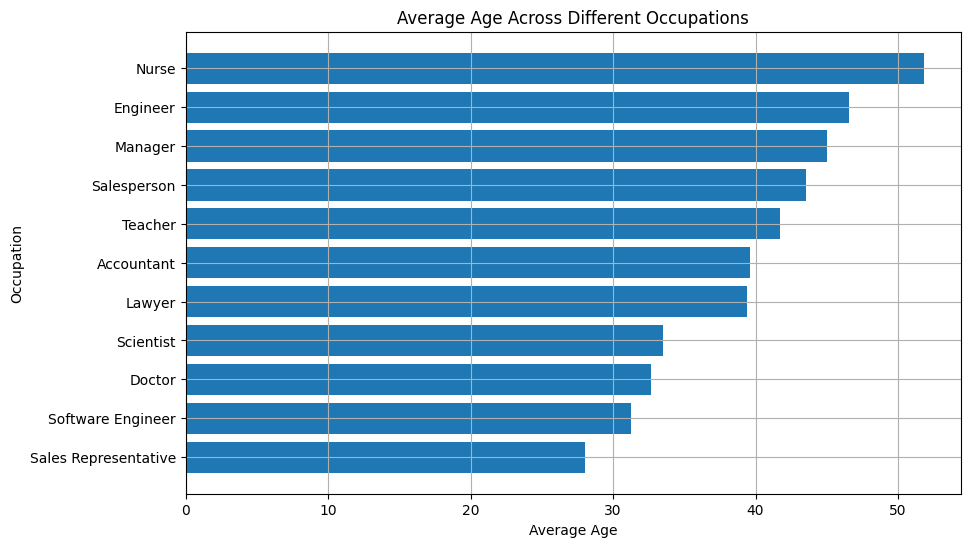

Index: 26
Description: Visualize the proportion of people in each stress level category
Exception list index out of range for index 27
Exception list index out of range for index 28
Index: 29
Description: Show the distribution of quality of sleep values in the dataset


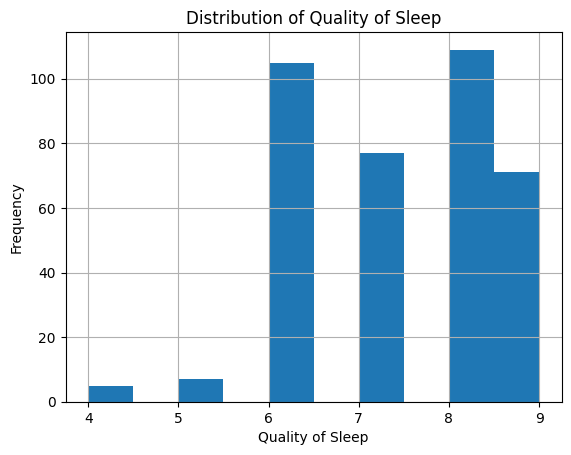

10/30


In [13]:
results = []
errors = 0
for index, row in train_df.iterrows():
    try:
        user_message = f"""{row["description"]}

        Example data:
        {df.head(5).to_string()}"""
        
        result = generate(system_message, user_message, "deepseek-r1:7b")
        chart_type = get_chart_type(result.message.content)
        chart_code = get_chart_code(result.message.content)
        print(f"Index: {index}")
        print(f"Description: {row["description"]}")
        exec(chart_code)
        results.append({
            "index": index,
            "success": 1,
            "chart_type": chart_type,
            "expected_chart_type": row["chart_type"],
            "chart_code": chart_code,
            "hit": int(chart_type.lower() == row["chart_type"].lower()),
            "hand_check": "/"
        })
    except Exception as e:
        print(f"Exception {e} for index {index}")
        results.append({
            "index": index,
            "success": 0,
            "chart_type": "",
            "chart_code": "",
            "hit": 0,
            "hand_check": 0
        })
        errors += 1

print(f"{errors}/{len(train_df)}")

In [14]:
save_json("data/deepseek-generation-ask.json", results)

### Give the model the chart type

In [8]:
system_message = """You are a text-to-chart generating model. Always generate the charts using python and matplotlib. 
Always use the dataset example given that is already loaded with pandas as variable df. Do not generate code for loading the dataset!
Do not halucinate examples or generate sample data. Generate only one code. Respond only with the code.
Generate the chart type given to you.
Generate the code between tags <chart-code></chart-code>"""

#### LLama 3.2 3B

Index: 0
Description: Show the relationship between sleep duration and quality of sleep


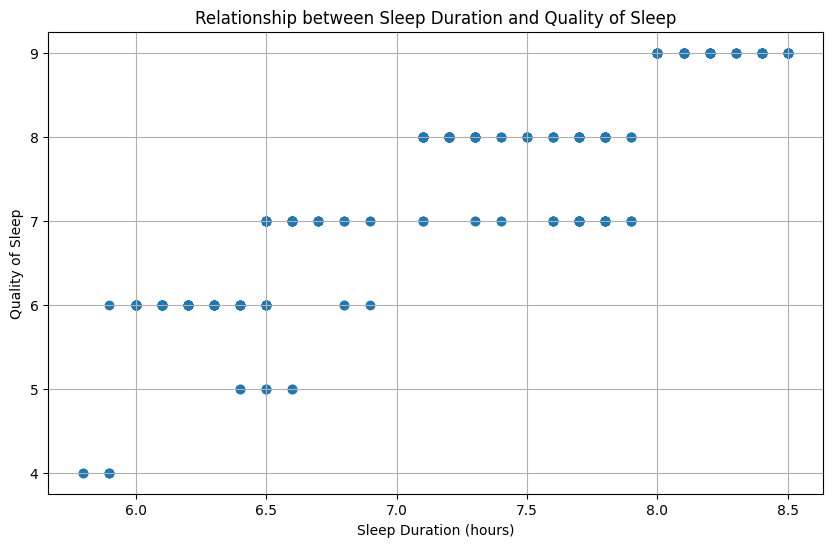

Index: 1
Description: Compare the average sleep duration across different occupations


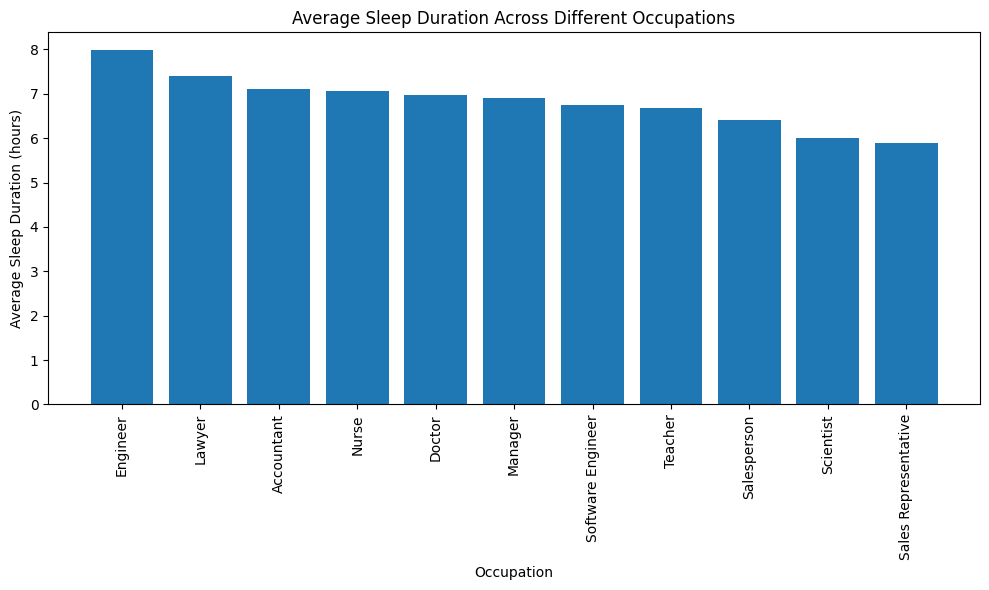

Index: 2
Description: Visualize the distribution of stress levels among all individuals


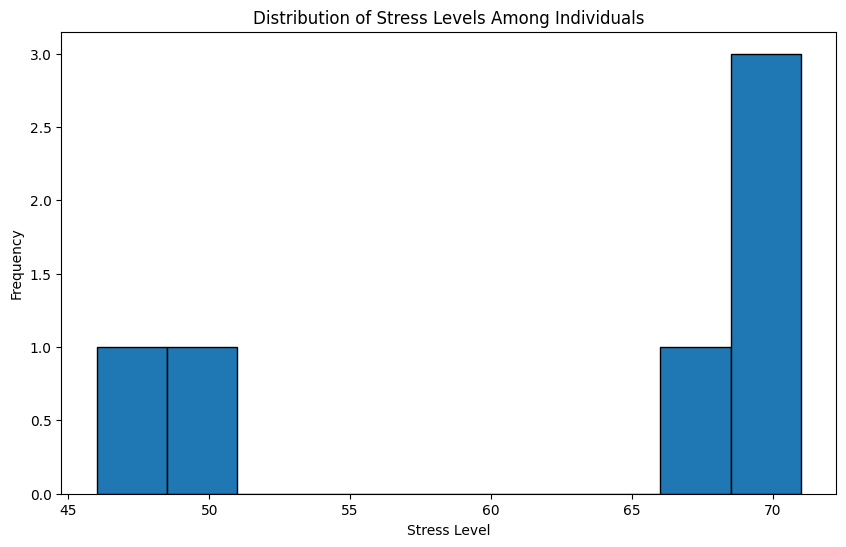

Index: 3
Description: Show the gender distribution in the dataset


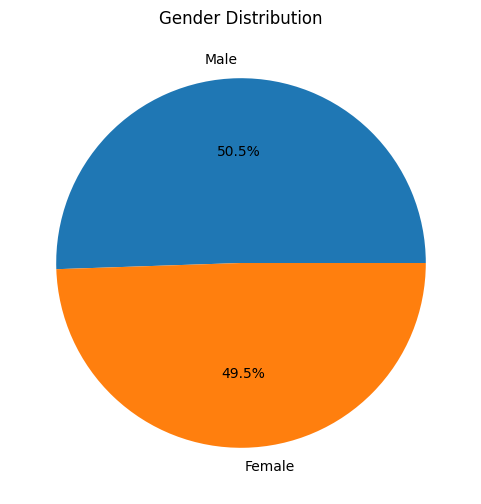

Index: 4
Description: Compare the average daily steps between people with and without a sleep disorder


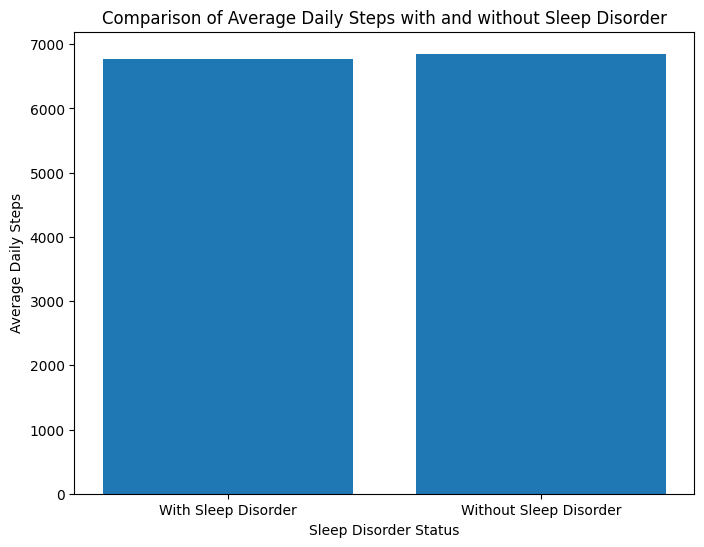

Index: 5
Description: Show how physical activity level relates to quality of sleep


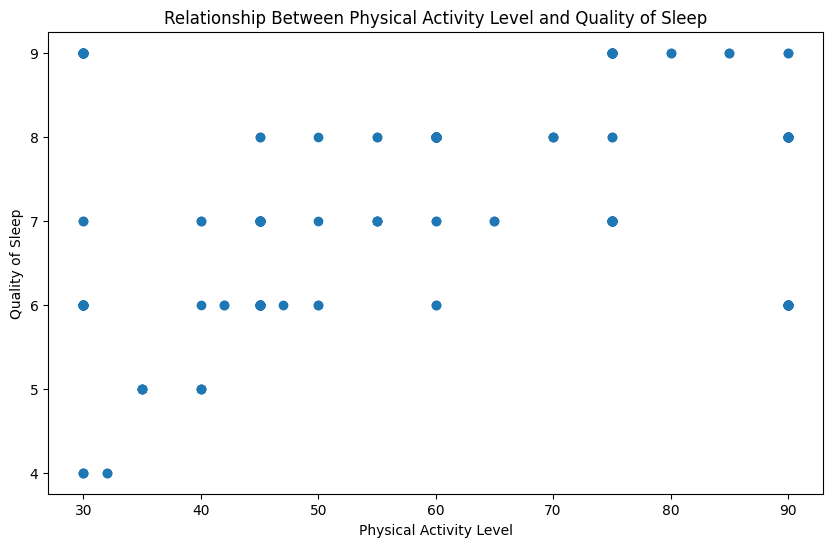

Index: 6
Description: Visualize the distribution of BMI categories among individuals


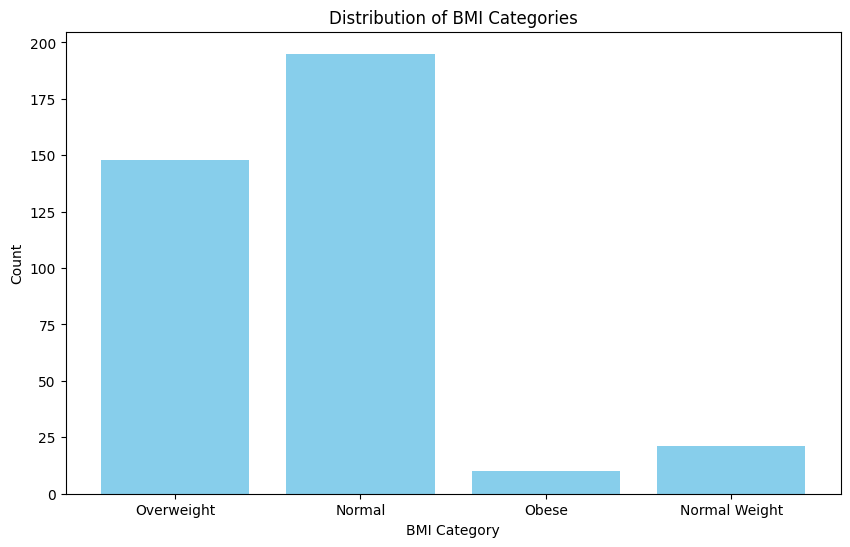

Index: 7
Description: Compare the average heart rate of individuals with different stress levels


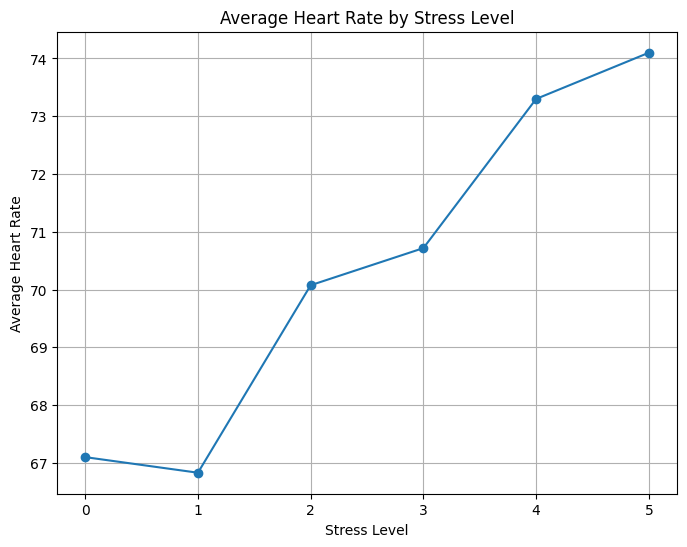

Index: 8
Description: Show the relationship between age and sleep duration


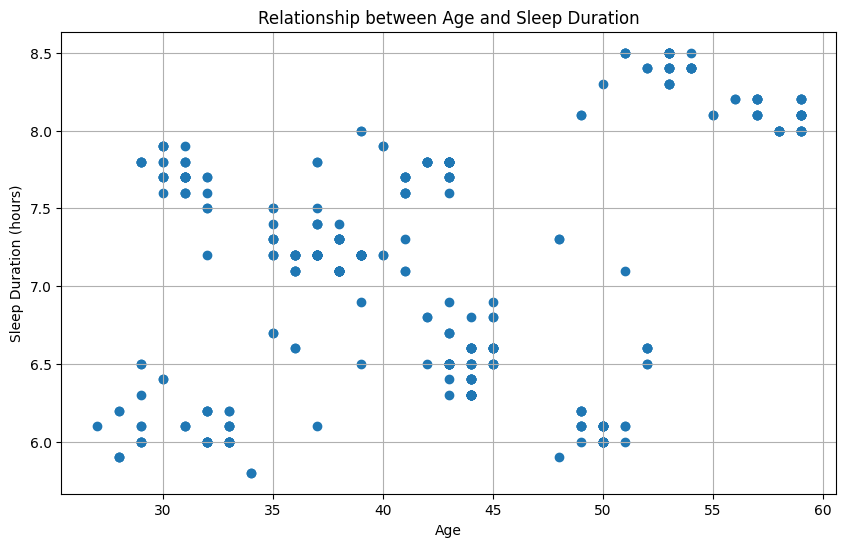

Index: 9
Description: Display the average quality of sleep for individuals grouped by occupation


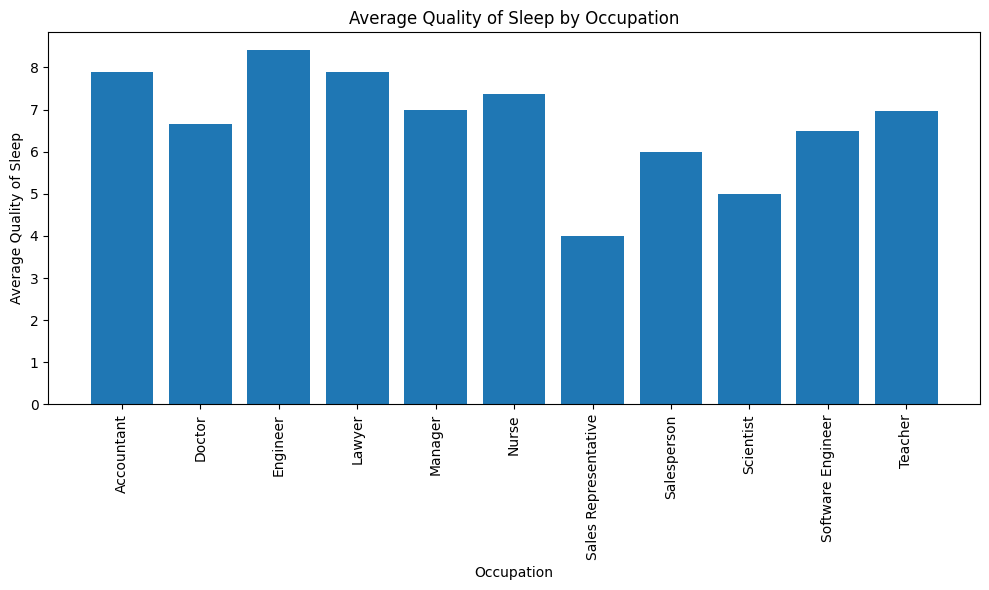

Index: 10
Description: Compare the average stress levels between males and females


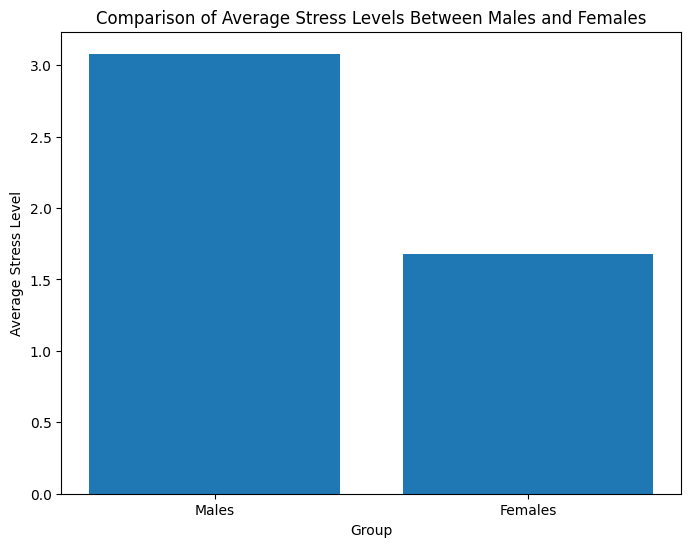

Index: 11
Description: Show the breakdown of sleep disorders reported in the dataset


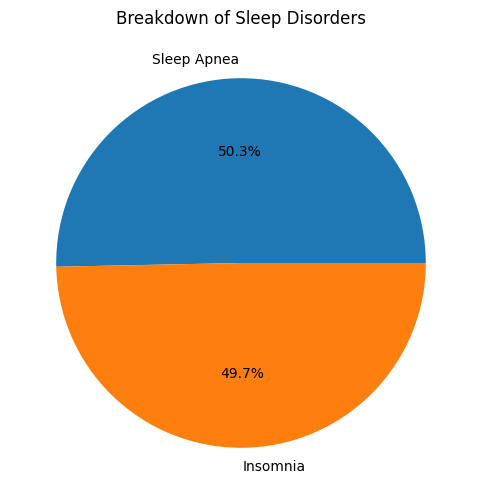

Index: 12
Description: Visualize the relationship between daily steps and heart rate


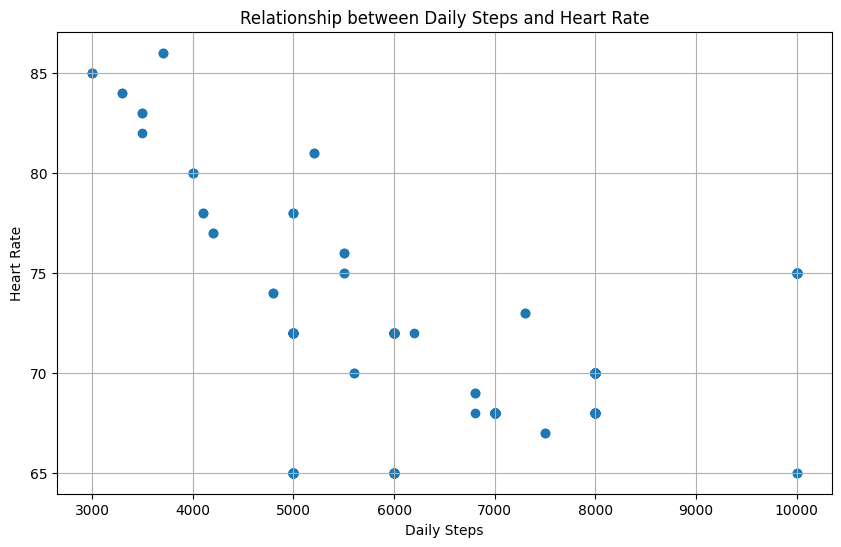

Index: 13
Description: Show the distribution of sleep duration values across the dataset


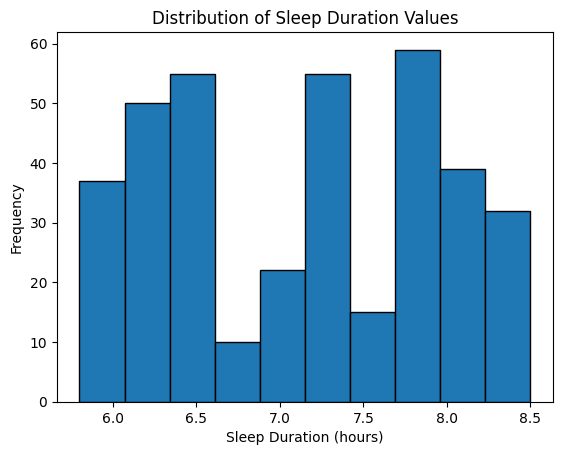

Index: 14
Description: Compare the average physical activity levels of individuals with and without sleep disorders


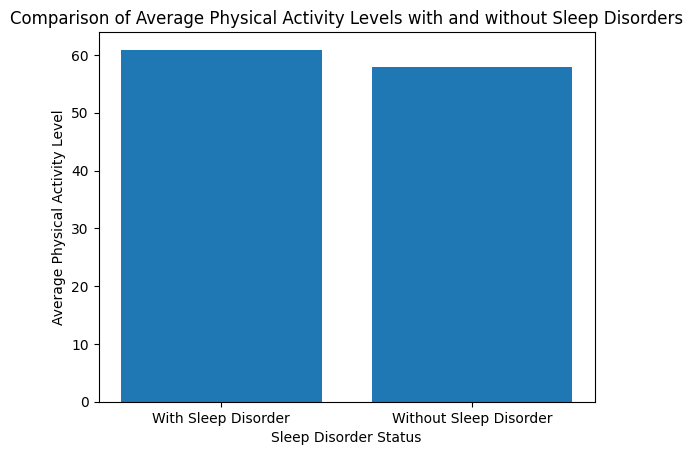

Index: 15
Description: Plot the relationship between stress level and sleep duration


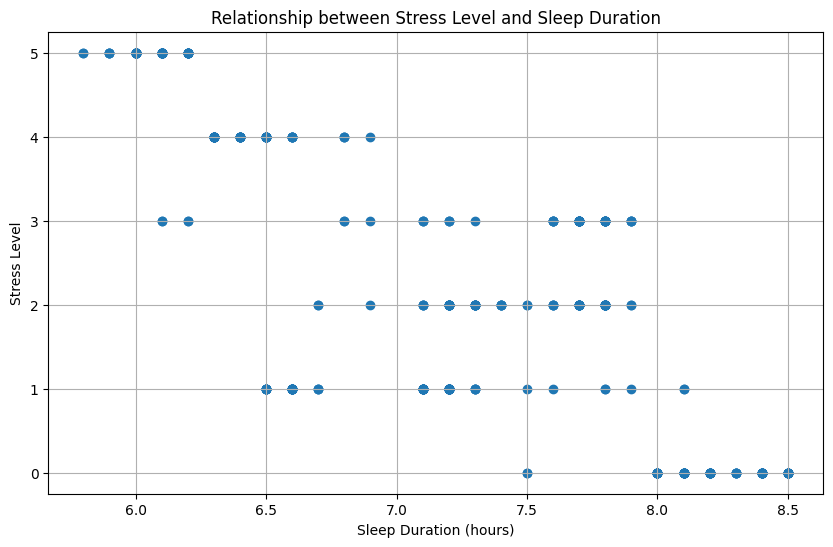

Index: 16
Description: Compare the average blood pressure readings among different BMI categories
Exception '<' not supported between instances of 'float' and 'str' for index 16
Index: 17
Description: Show the age distribution of individuals in the dataset


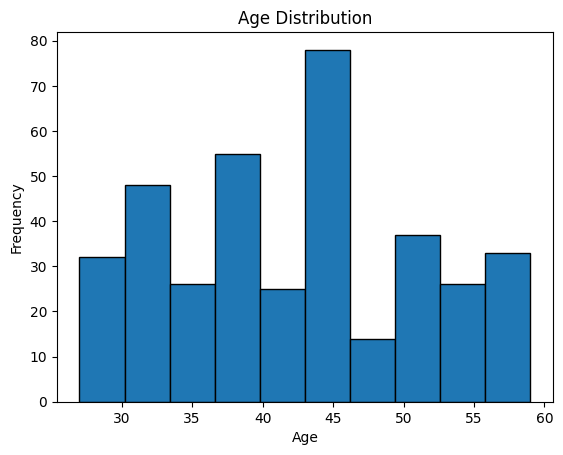

Index: 18
Description: Compare the average sleep quality between individuals with different heart rate ranges


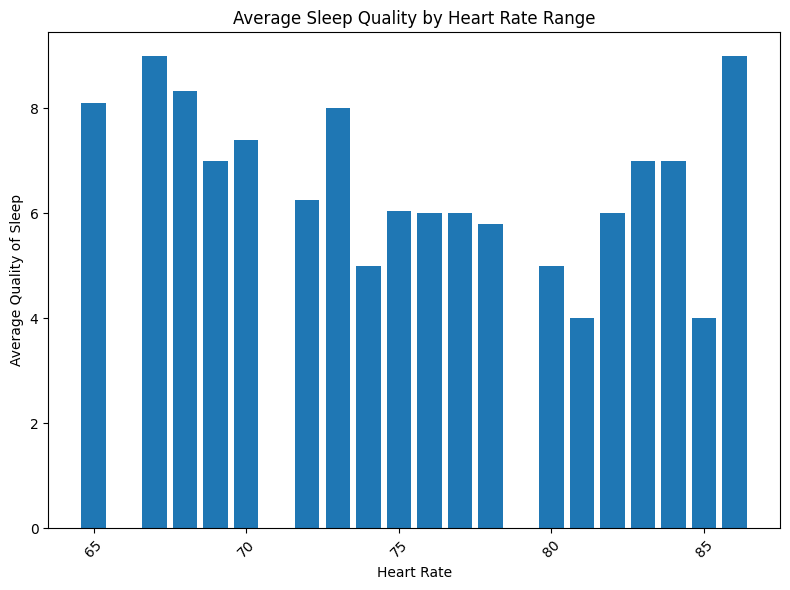

Index: 19
Description: Visualize the relationship between daily steps and sleep quality


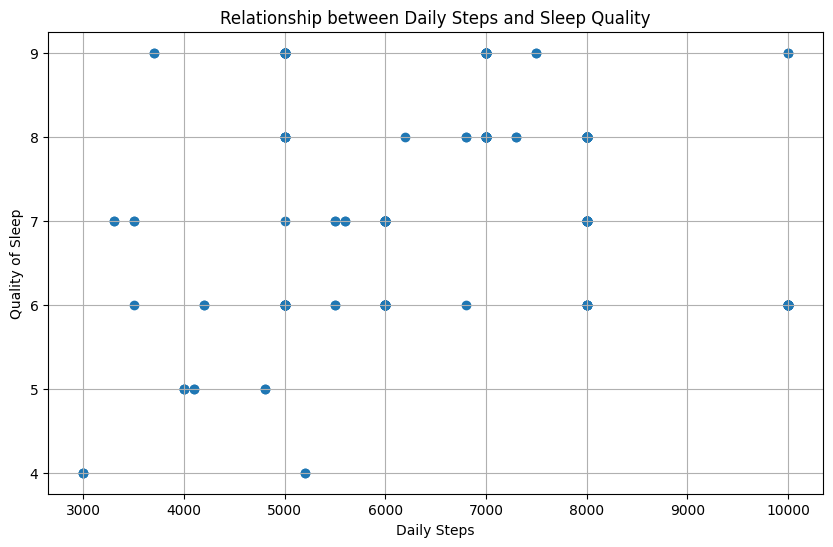

Index: 20
Description: Compare the average sleep duration of different BMI categories


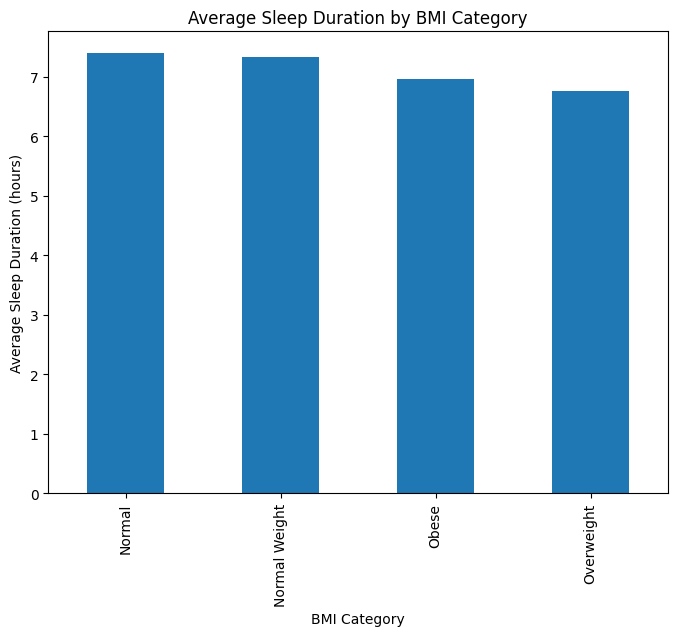

Index: 21
Description: Show the relationship between stress level and heart rate


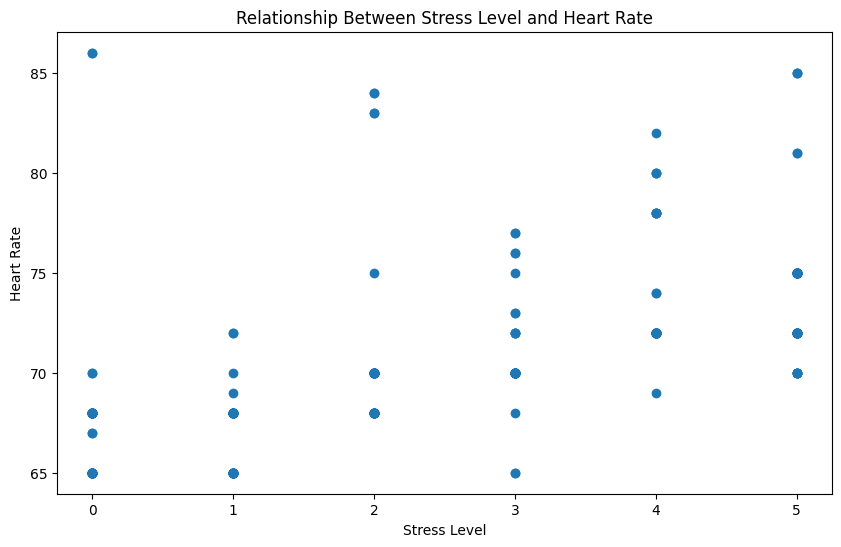

Index: 22
Description: Visualize the distribution of daily steps among individuals


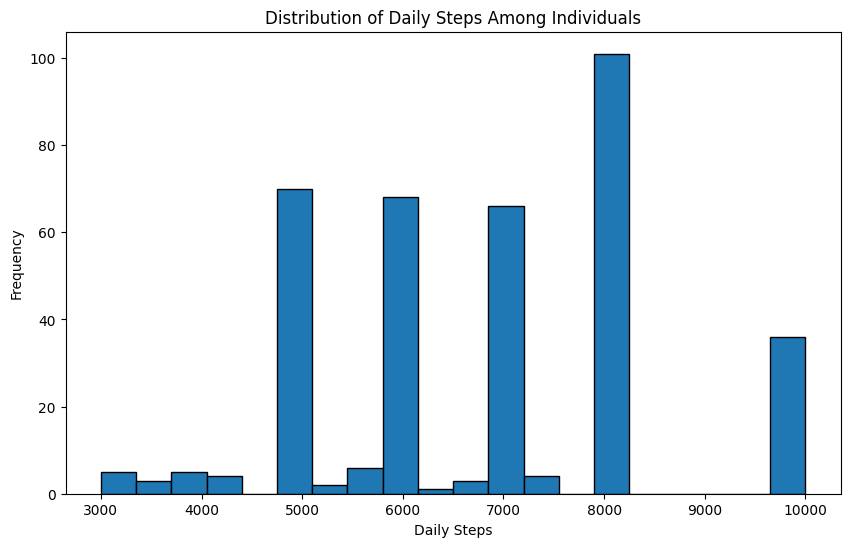

Index: 23
Description: Compare the average quality of sleep between individuals with and without sleep disorders


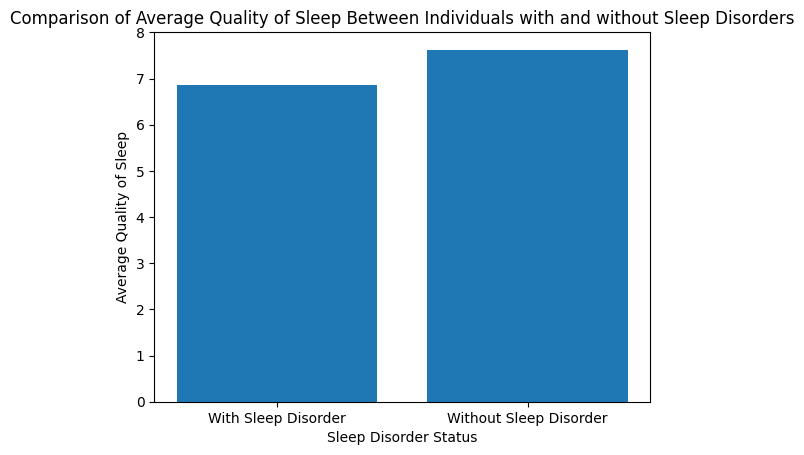

Index: 24
Description: Show the relationship between physical activity level and daily steps


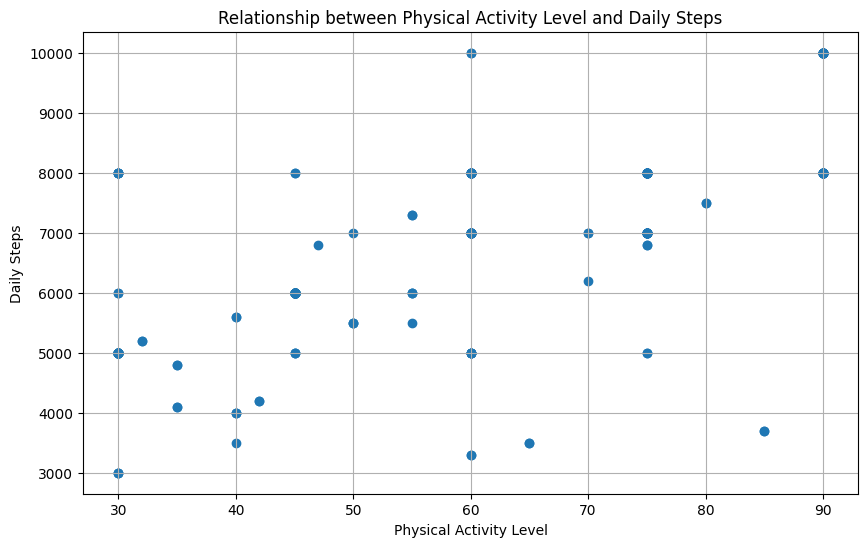

Index: 25
Description: Compare the average age of individuals across different occupations


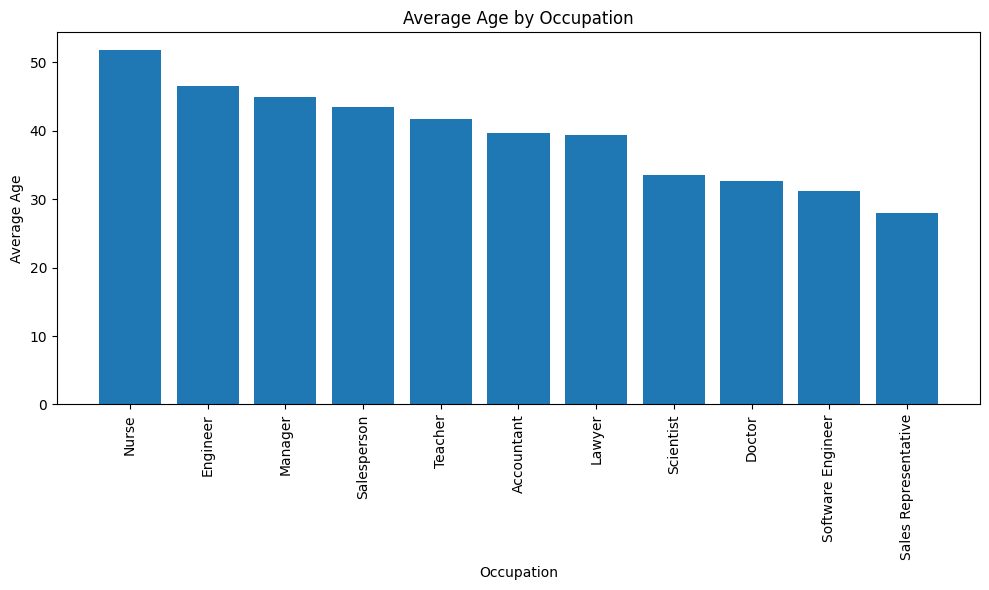

Index: 26
Description: Visualize the proportion of people in each stress level category


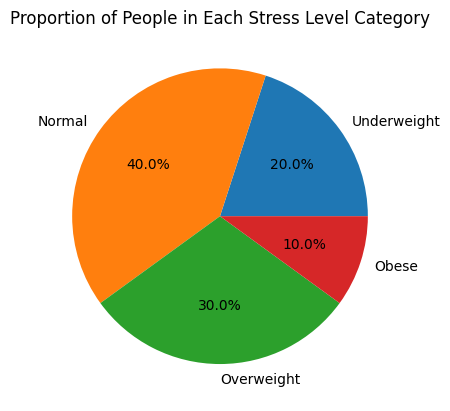

Index: 27
Description: Show the relationship between age and heart rate


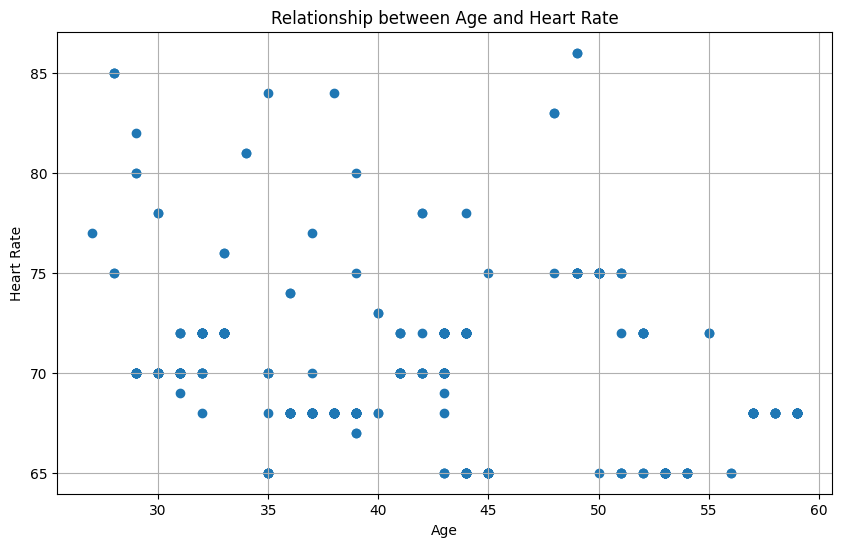

Index: 28
Description: Compare the average sleep duration of males and females


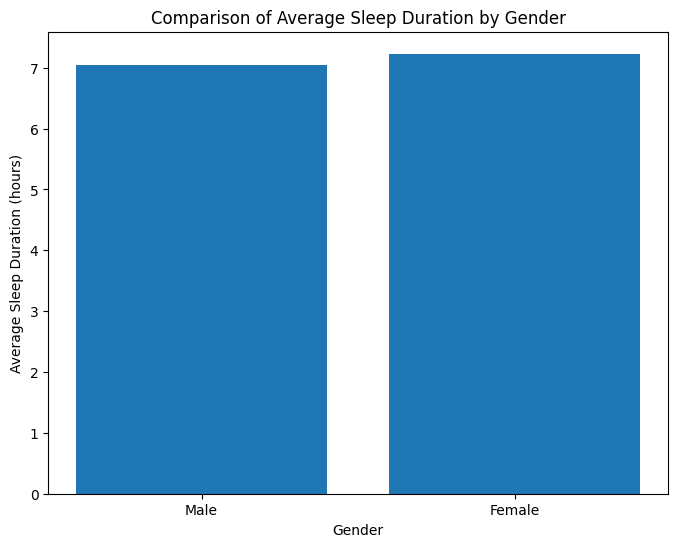

Index: 29
Description: Show the distribution of quality of sleep values in the dataset


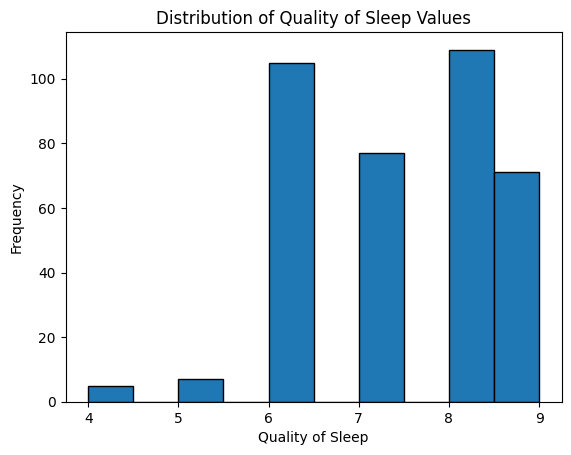

1/30


In [10]:
results = []
errors = 0
for index, row in train_df.iterrows():
    try:
        user_message = f"""{row["description"]}
        Use a {row['chart_type']}
        Example data:
        {df.head(5).to_string()}"""
        
        result = generate(system_message, user_message, "llama3.2:3b-instruct-q4_K_S")
        chart_code = get_chart_code(result.message.content)
        print(f"Index: {index}")
        print(f"Description: {row["description"]}")
        exec(chart_code)
        results.append({
            "index": index,
            "success": 1,
            "chart_code": chart_code,
            "chart_type": row["chart_type"],
            "hand_check": "/"
        })
    except Exception as e:
        print(f"Exception {e} for index {index}")
        results.append({
            "index": index,
            "success": 0,
            "chart_type": row["chart_type"],
            "chart_code": "",
            "hand_check": 0
        })
        errors += 1

print(f"{errors}/{len(train_df)}")

In [11]:
save_json("data/llama-32-generation-give.json", results)

#### LLama 3.1 8B

Index: 0
Description: Show the relationship between sleep duration and quality of sleep


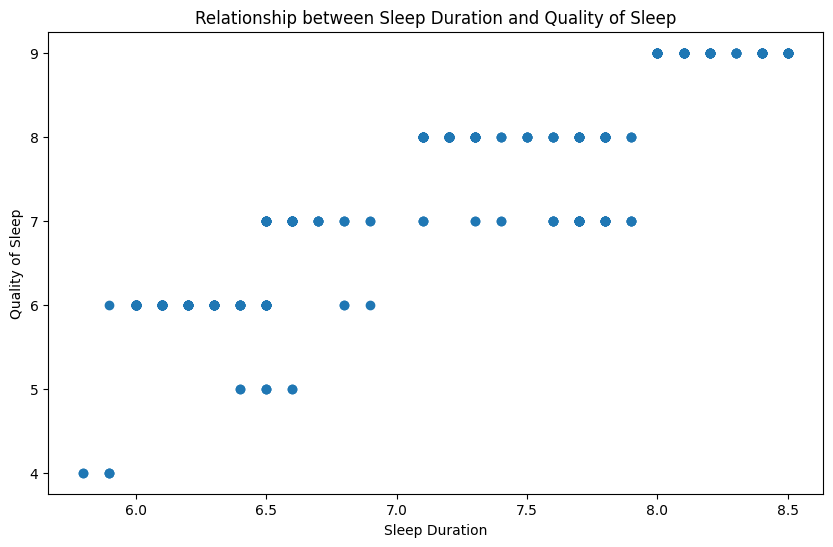

Index: 1
Description: Compare the average sleep duration across different occupations


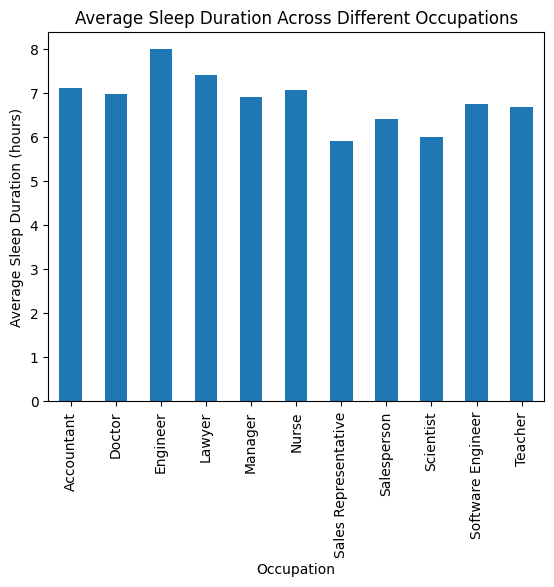

Index: 2
Description: Visualize the distribution of stress levels among all individuals


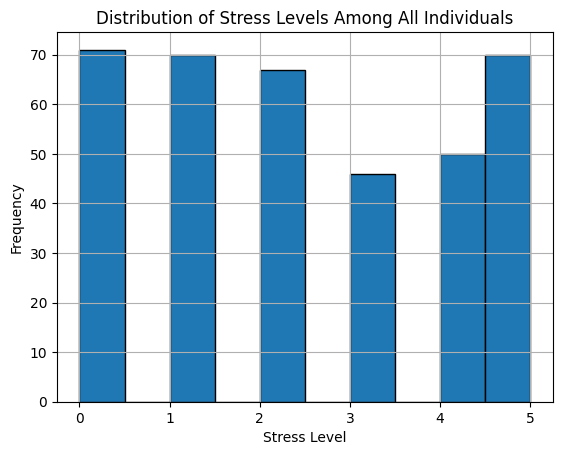

Index: 3
Description: Show the gender distribution in the dataset


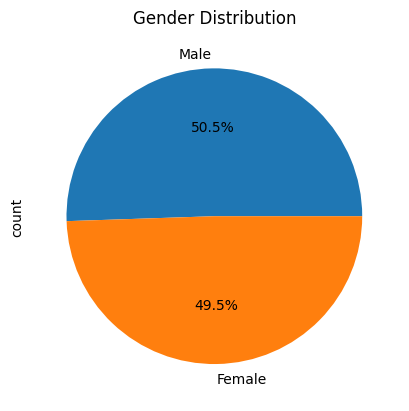

Index: 4
Description: Compare the average daily steps between people with and without a sleep disorder


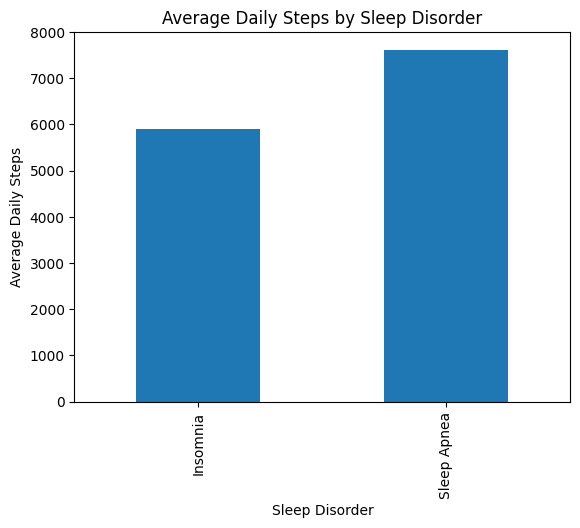

Index: 5
Description: Show how physical activity level relates to quality of sleep


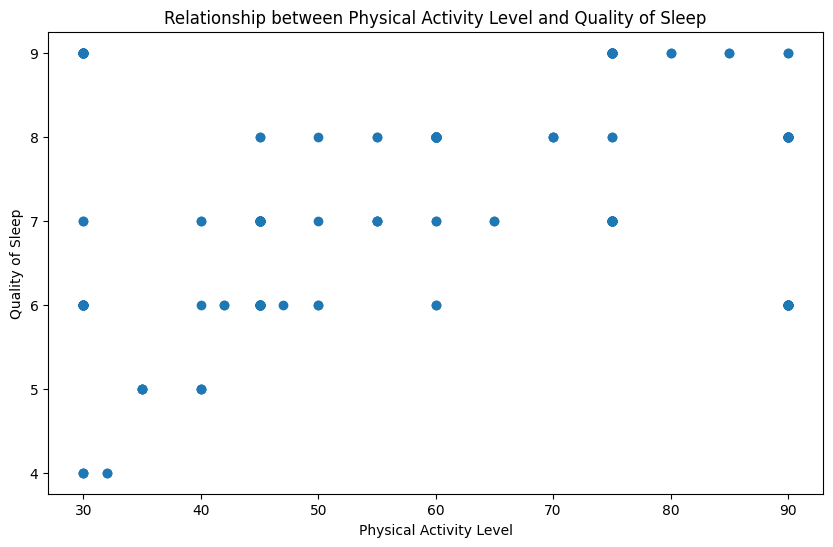

Index: 6
Description: Visualize the distribution of BMI categories among individuals


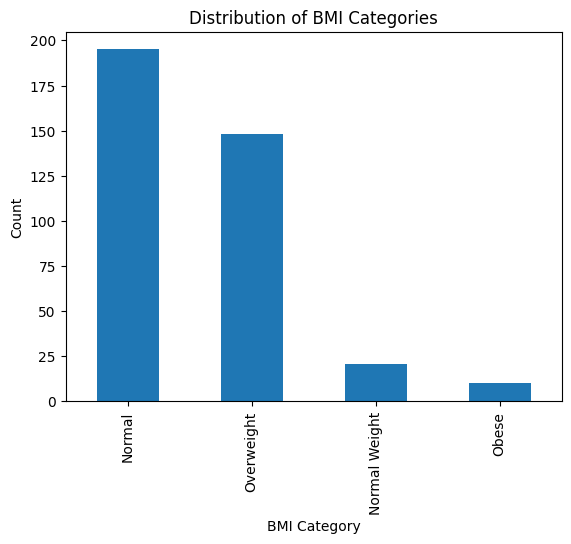

Index: 7
Description: Compare the average heart rate of individuals with different stress levels


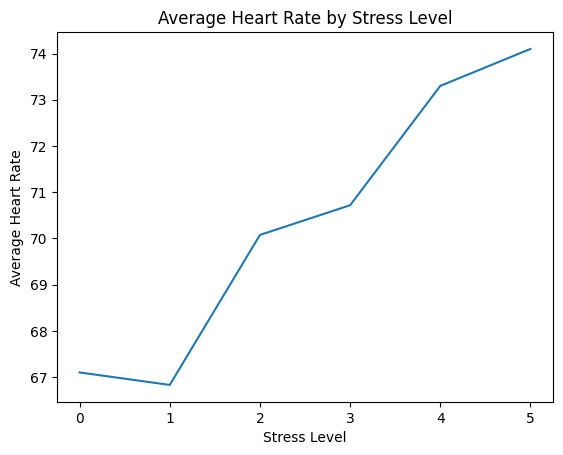

Index: 8
Description: Show the relationship between age and sleep duration


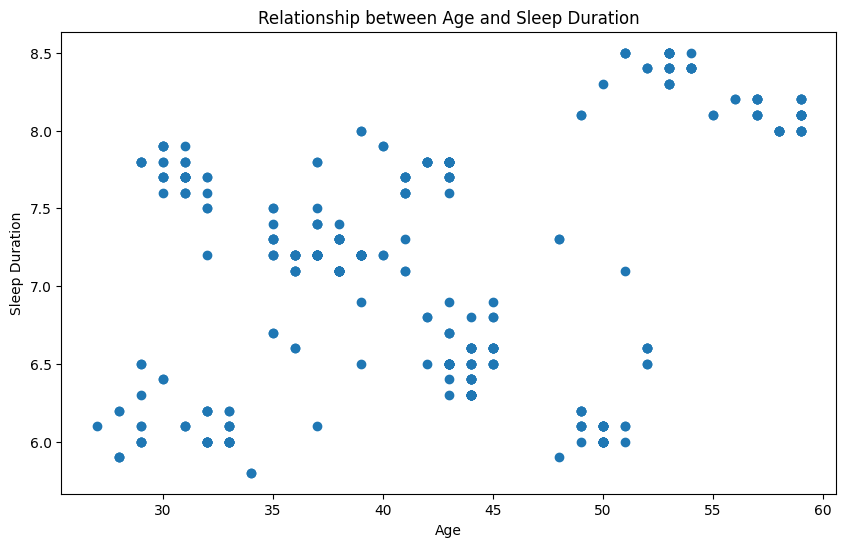

Index: 9
Description: Display the average quality of sleep for individuals grouped by occupation


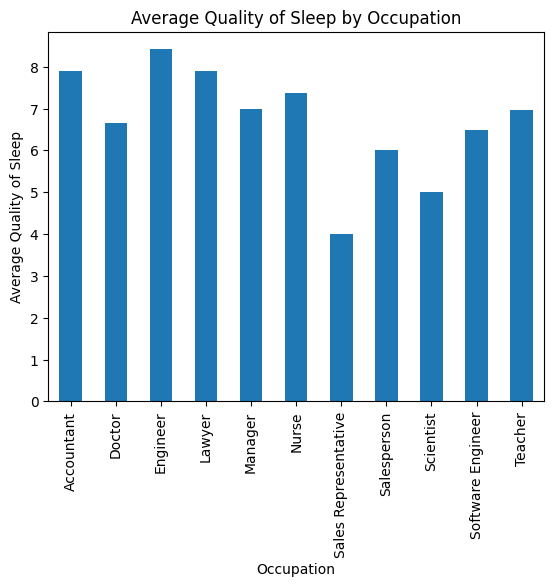

Index: 10
Description: Compare the average stress levels between males and females


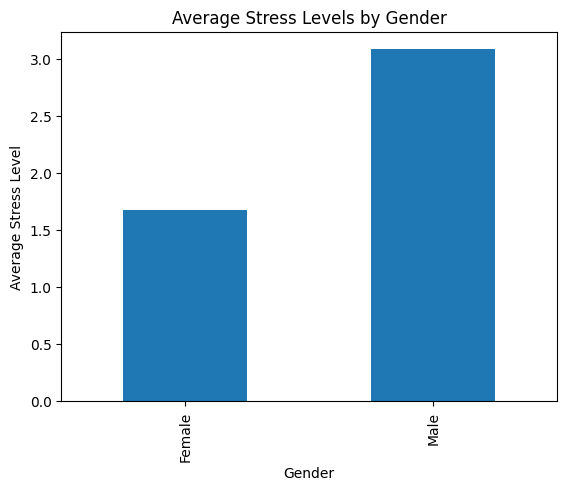

Index: 11
Description: Show the breakdown of sleep disorders reported in the dataset


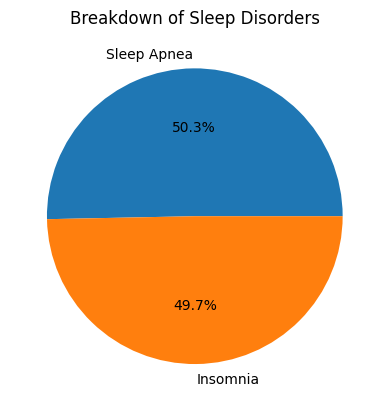

Index: 12
Description: Visualize the relationship between daily steps and heart rate


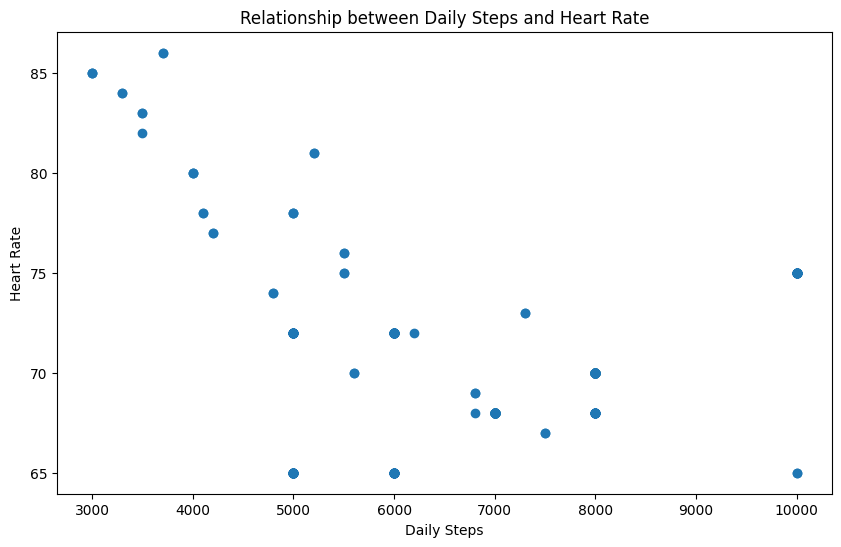

Index: 13
Description: Show the distribution of sleep duration values across the dataset


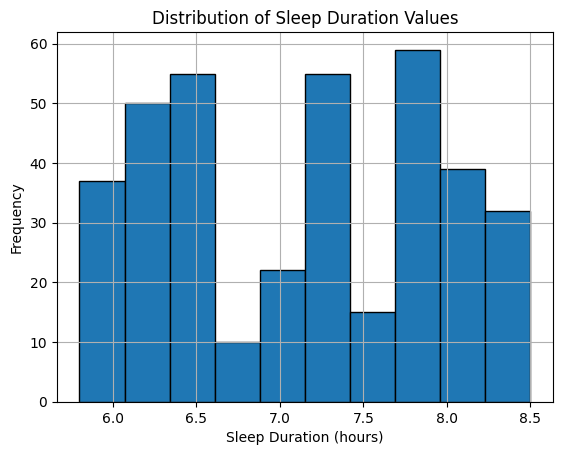

Index: 14
Description: Compare the average physical activity levels of individuals with and without sleep disorders


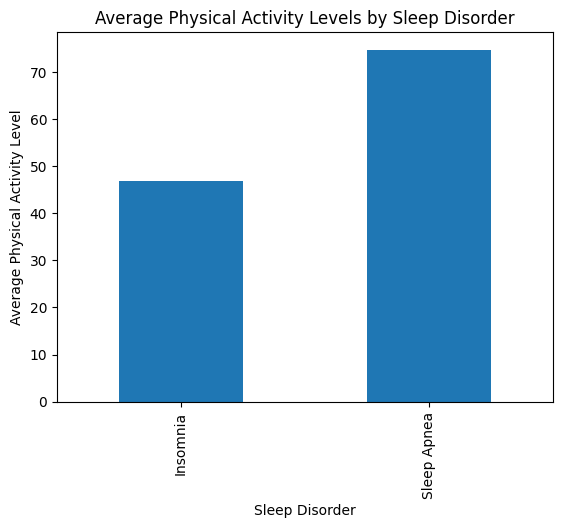

Index: 15
Description: Plot the relationship between stress level and sleep duration


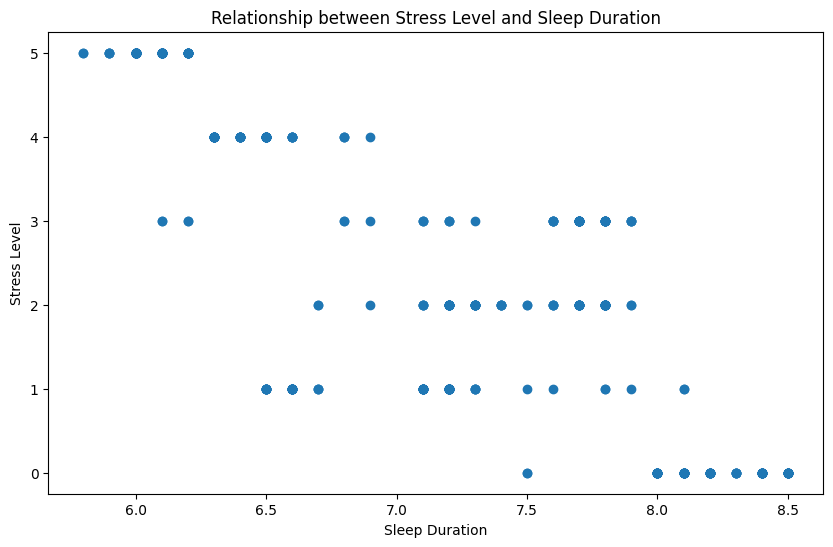

Index: 16
Description: Compare the average blood pressure readings among different BMI categories
Exception agg function failed [how->mean,dtype->object] for index 16
Index: 17
Description: Show the age distribution of individuals in the dataset


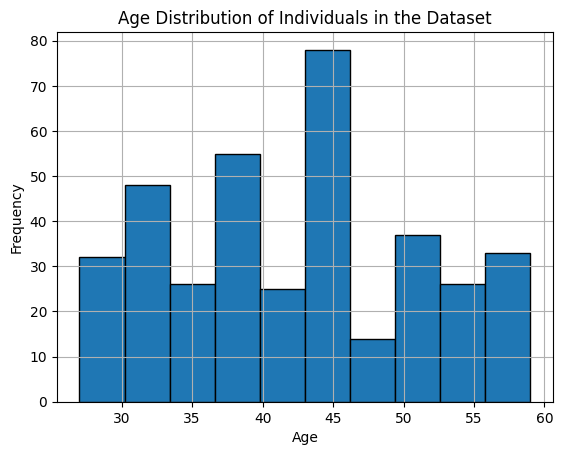

Index: 18
Description: Compare the average sleep quality between individuals with different heart rate ranges


<string>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


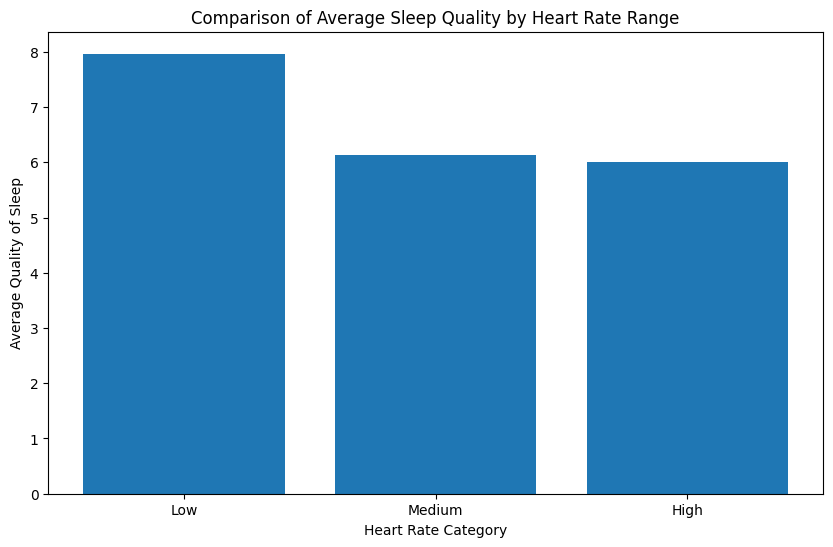

Index: 19
Description: Visualize the relationship between daily steps and sleep quality


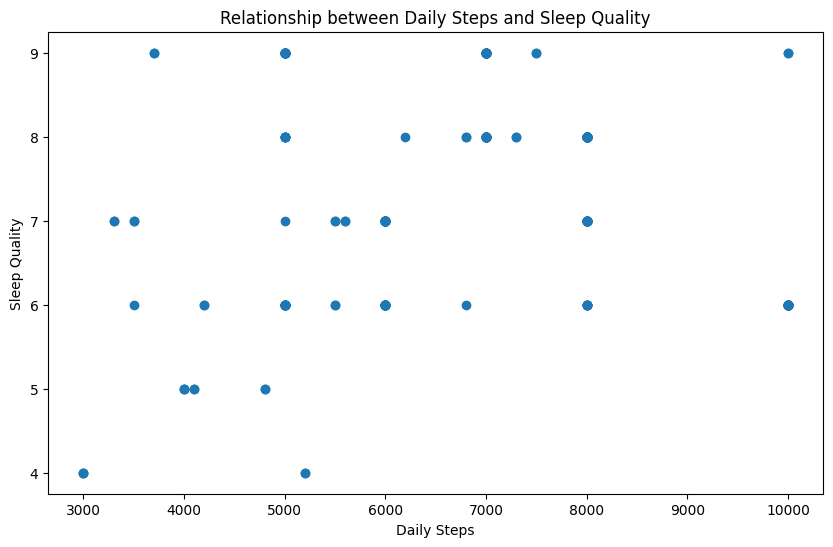

Index: 20
Description: Compare the average sleep duration of different BMI categories


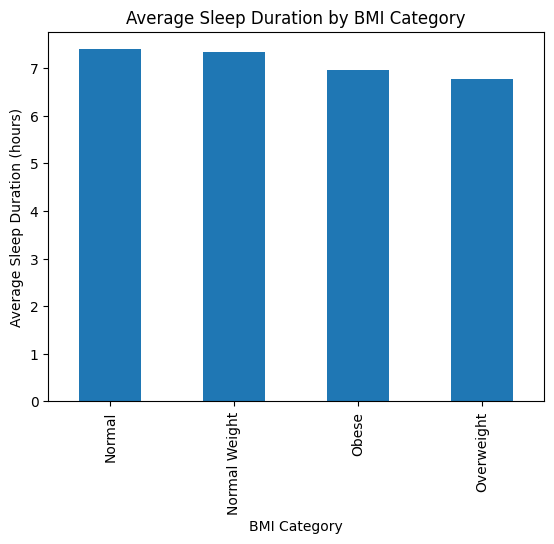

Index: 21
Description: Show the relationship between stress level and heart rate


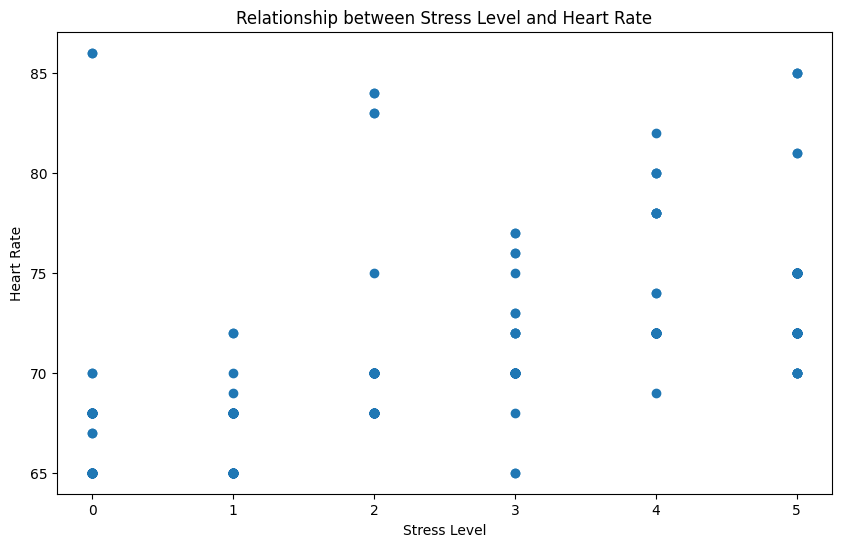

Index: 22
Description: Visualize the distribution of daily steps among individuals


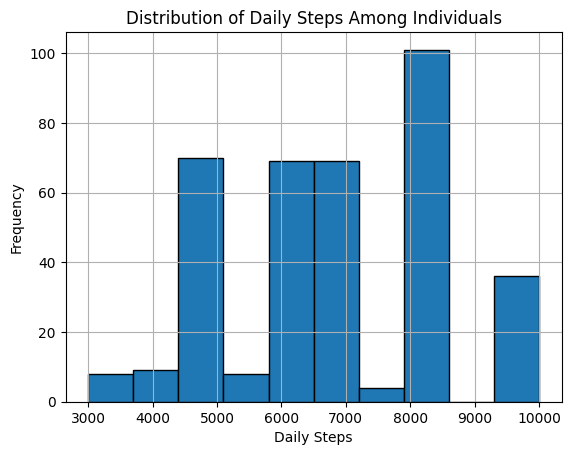

Index: 23
Description: Compare the average quality of sleep between individuals with and without sleep disorders


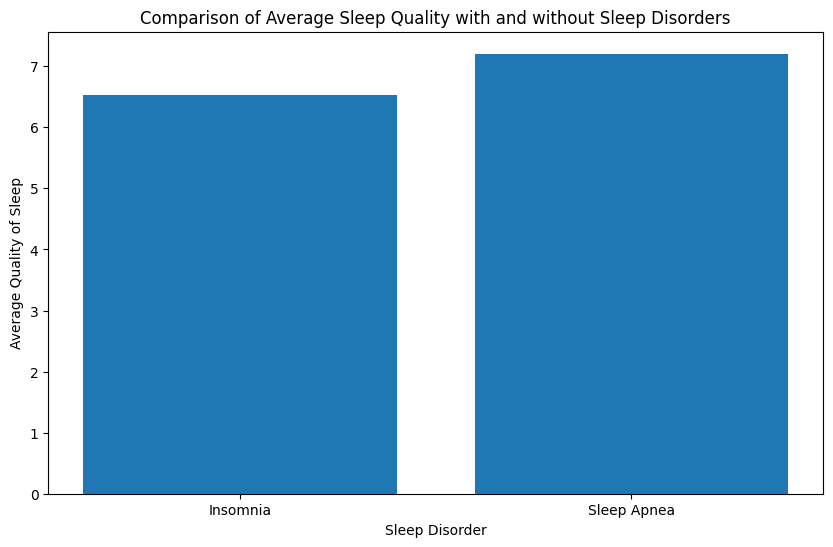

Index: 24
Description: Show the relationship between physical activity level and daily steps


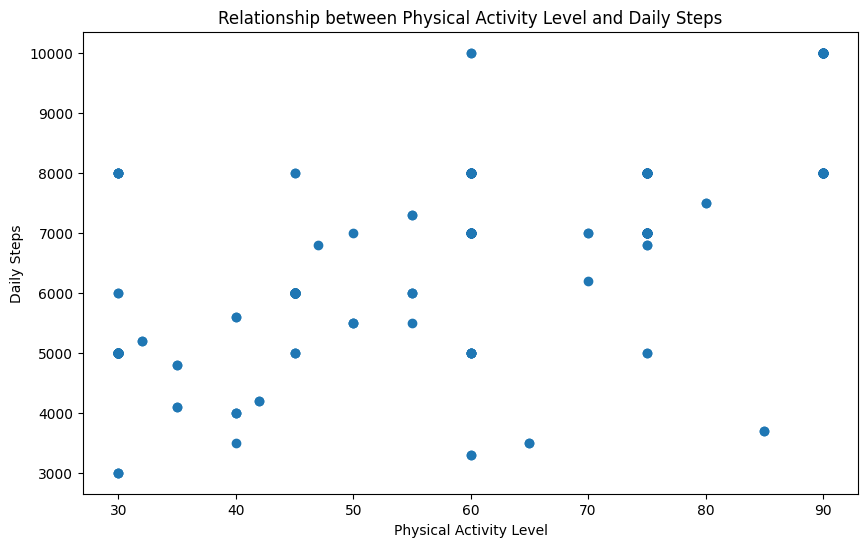

Index: 25
Description: Compare the average age of individuals across different occupations


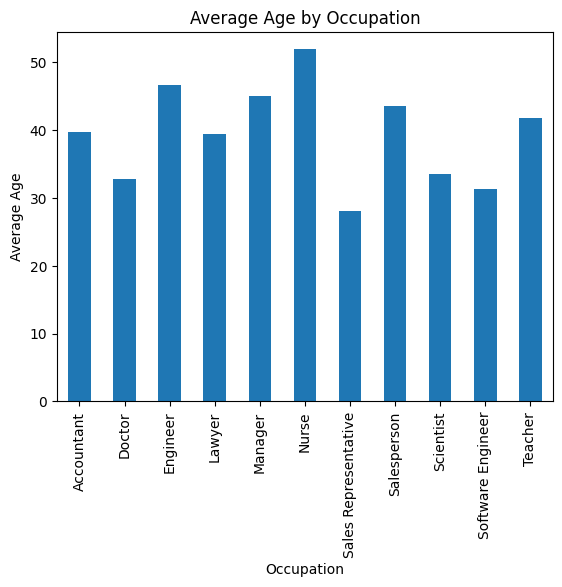

Index: 26
Description: Visualize the proportion of people in each stress level category


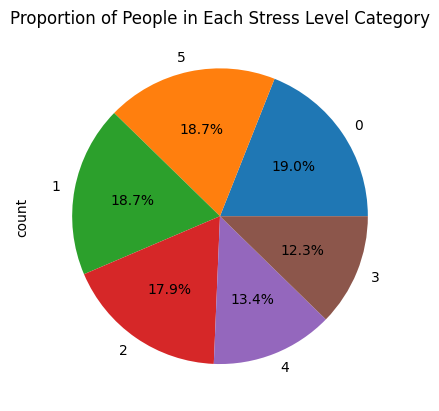

Index: 27
Description: Show the relationship between age and heart rate


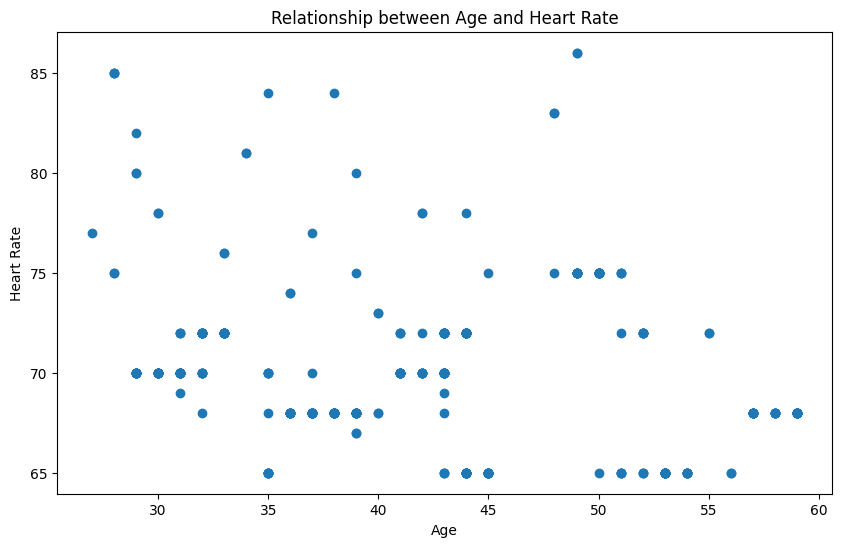

Index: 28
Description: Compare the average sleep duration of males and females


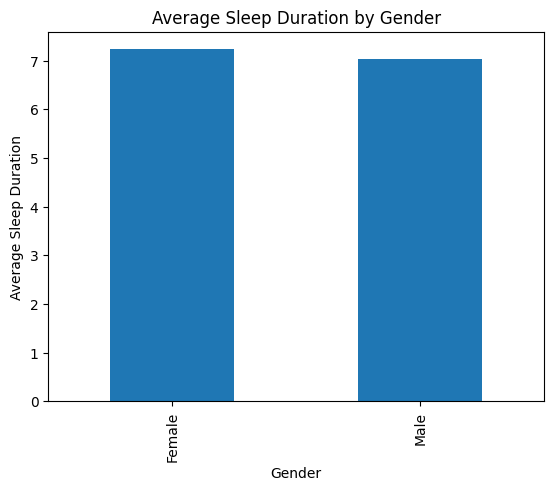

Index: 29
Description: Show the distribution of quality of sleep values in the dataset


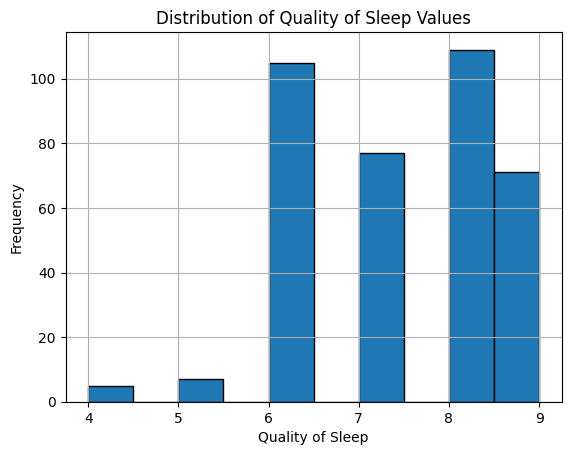

1/30


In [12]:
results = []
errors = 0
for index, row in train_df.iterrows():
    try:
        user_message = f"""{row["description"]}
        Use a {row['chart_type']}
        Example data:
        {df.head(5).to_string()}"""
        
        result = generate(system_message, user_message, "llama3.1:8b-instruct-q4_K_S")
        
        chart_code = get_chart_code(result.message.content)
        print(f"Index: {index}")
        print(f"Description: {row["description"]}")
        exec(chart_code)
        results.append({
            "index": index,
            "success": 1,
            "chart_code": chart_code,
            "chart_type": row["chart_type"],
            "hand_check": "/"
        })
    except Exception as e:
        print(f"Exception {e} for index {index}")
        results.append({
            "index": index,
            "success": 0,
            "chart_code": "",
            "chart_type": row["chart_type"],
            "hand_check": 0
        })
        errors += 1

print(f"{errors}/{len(train_df)}")

In [13]:
save_json("data/llama-31-generation-give.json", results)

#### Deepseek 7b

Index: 0
Description: Show the relationship between sleep duration and quality of sleep
Exception unexpected indent (<string>, line 1) for index 0
Index: 1
Description: Compare the average sleep duration across different occupations
Exception unexpected indent (<string>, line 6) for index 1
Index: 2
Description: Visualize the distribution of stress levels among all individuals
Exception unexpected indent (<string>, line 1) for index 2
Index: 3
Description: Show the gender distribution in the dataset


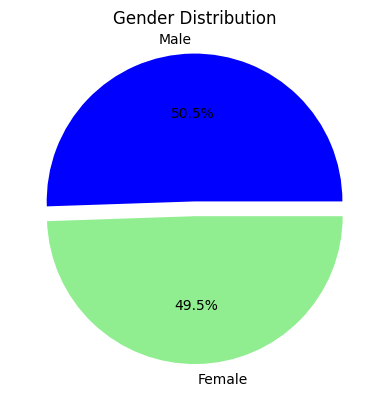

Index: 4
Description: Compare the average daily steps between people with and without a sleep disorder


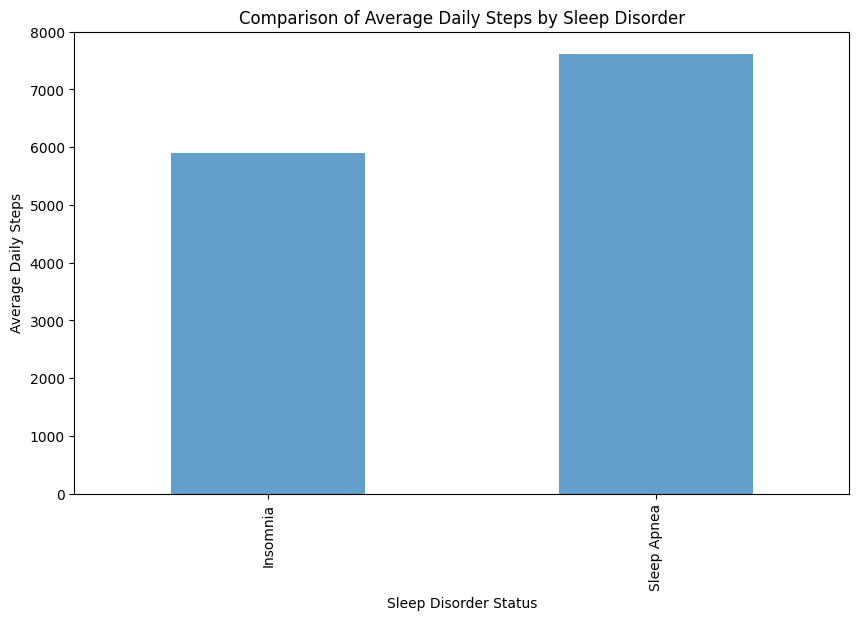

Index: 5
Description: Show how physical activity level relates to quality of sleep


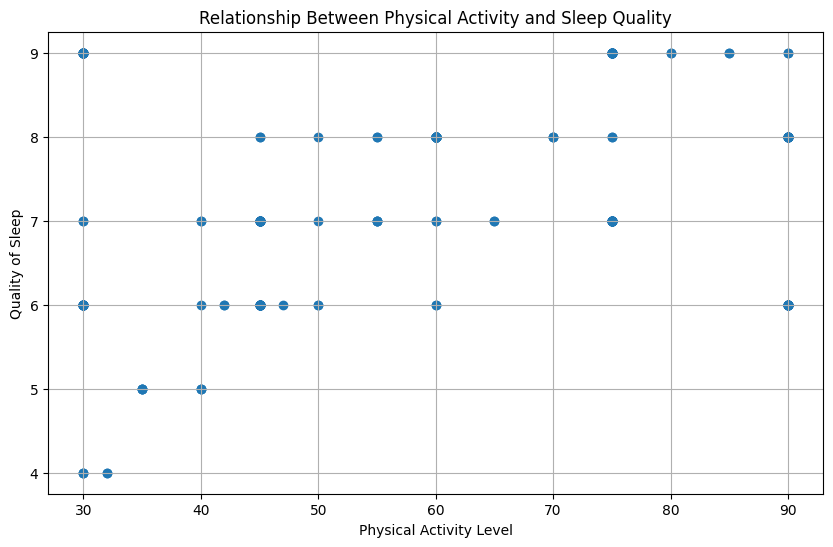

Index: 6
Description: Visualize the distribution of BMI categories among individuals


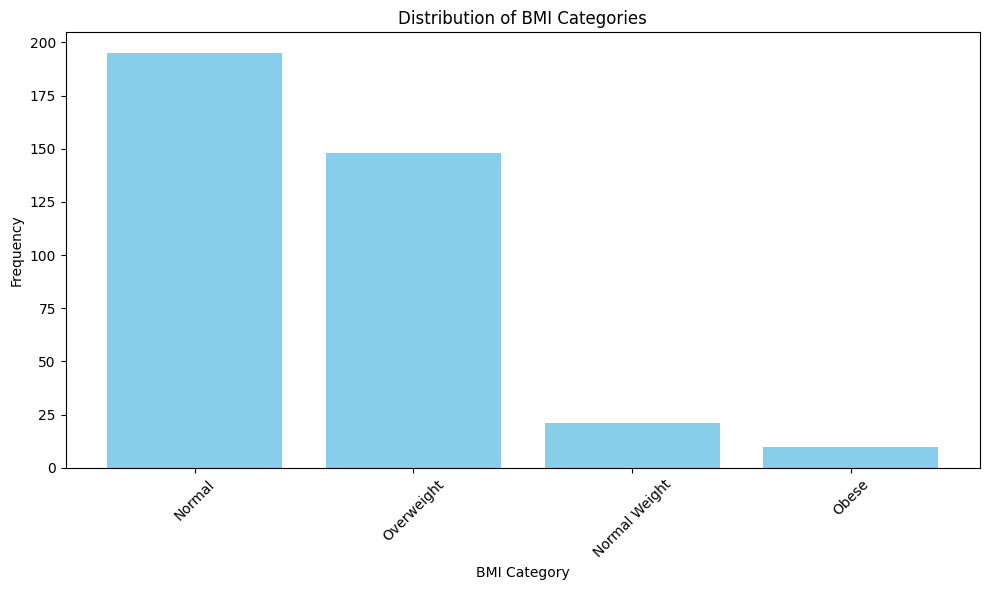

Index: 7
Description: Compare the average heart rate of individuals with different stress levels


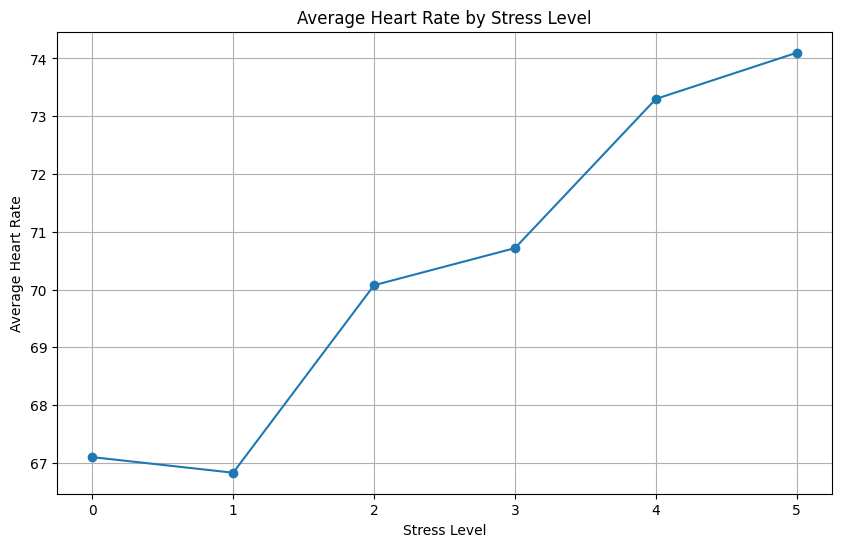

Index: 8
Description: Show the relationship between age and sleep duration


c:\Users\HomePC\Desktop\Docs\Python\NLP\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Index: 9
Description: Display the average quality of sleep for individuals grouped by occupation


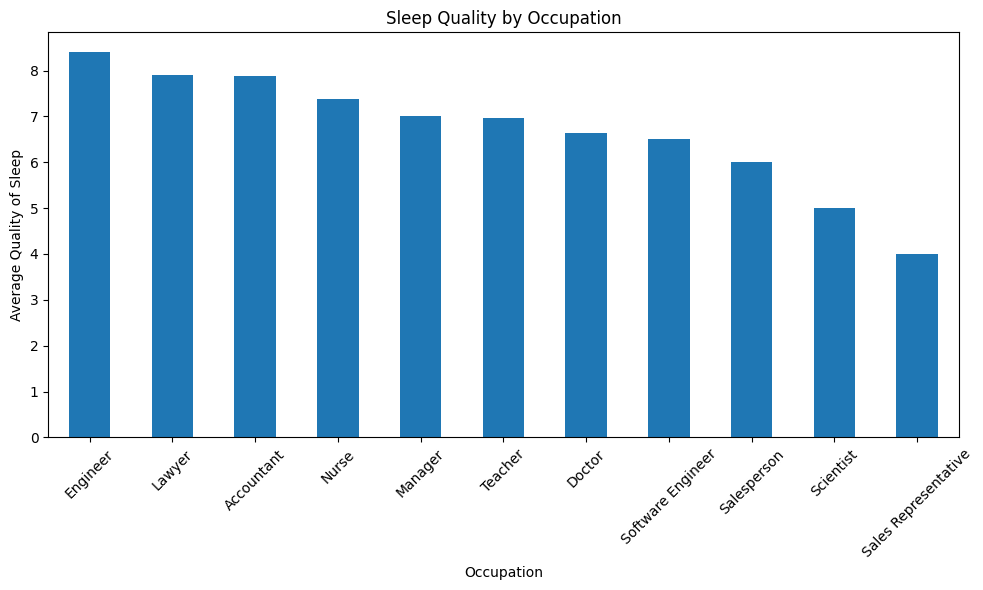

Index: 10
Description: Compare the average stress levels between males and females


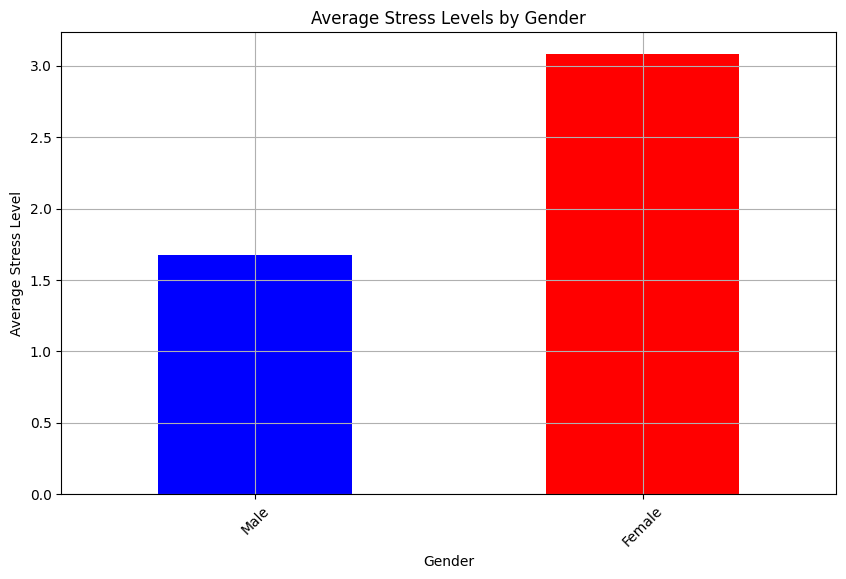

Index: 11
Description: Show the breakdown of sleep disorders reported in the dataset


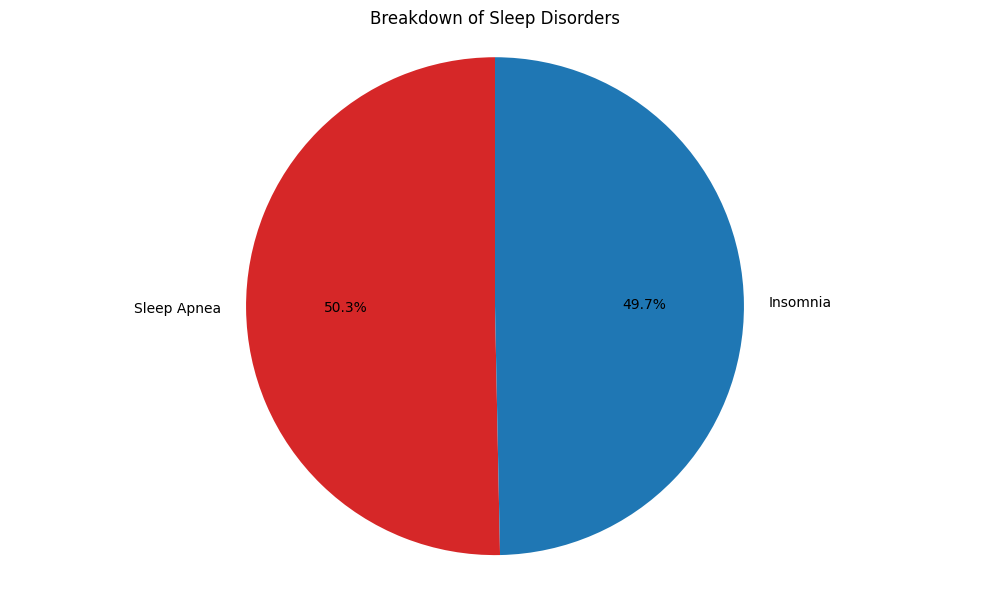

Index: 12
Description: Visualize the relationship between daily steps and heart rate


<Figure size 1000x600 with 0 Axes>

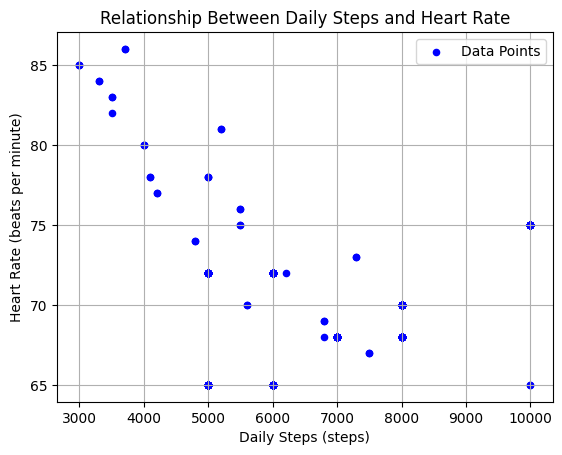

Index: 13
Description: Show the distribution of sleep duration values across the dataset
Exception unexpected indent (<string>, line 1) for index 13
Index: 14
Description: Compare the average physical activity levels of individuals with and without sleep disorders


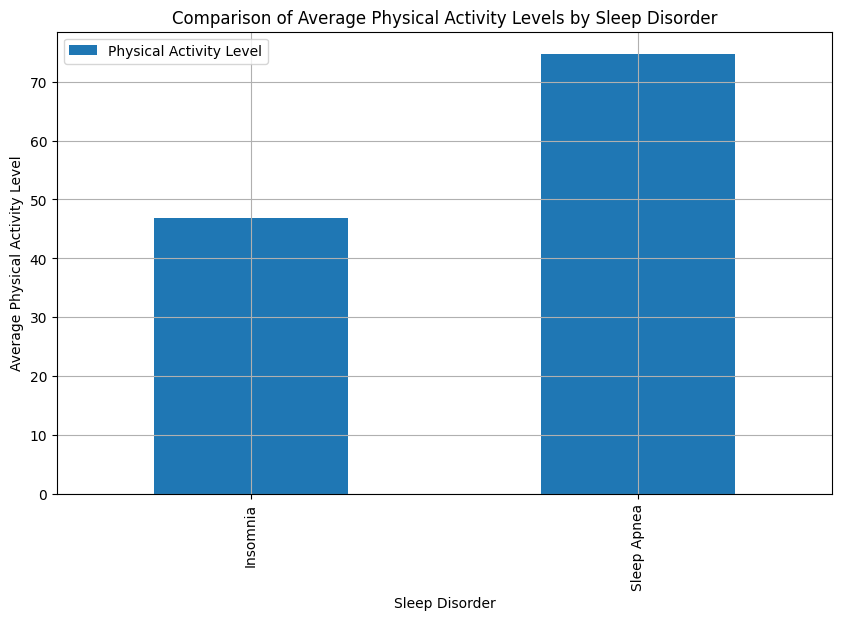

Index: 15
Description: Plot the relationship between stress level and sleep duration


<Figure size 1000x600 with 0 Axes>

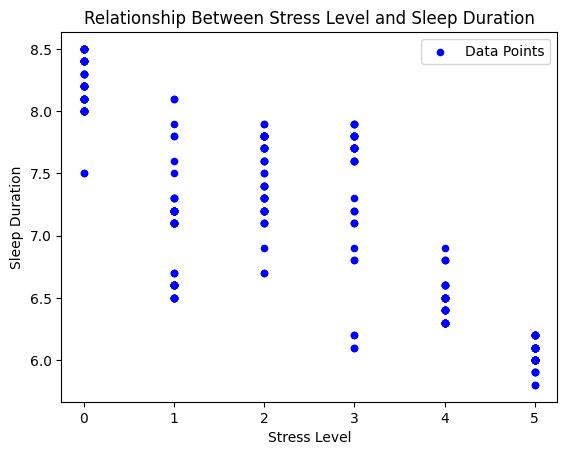

Index: 16
Description: Compare the average blood pressure readings among different BMI categories
Exception unexpected indent (<string>, line 1) for index 16
Index: 17
Description: Show the age distribution of individuals in the dataset


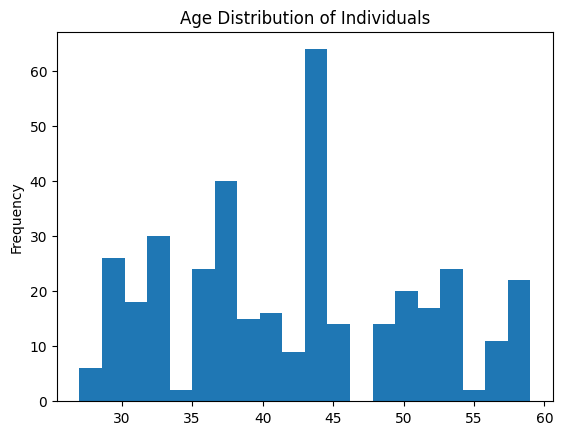

Index: 18
Description: Compare the average sleep quality between individuals with different heart rate ranges
Exception unexpected indent (<string>, line 1) for index 18
Index: 19
Description: Visualize the relationship between daily steps and sleep quality
Exception 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'hexagon' for index 19
Index: 20
Description: Compare the average sleep duration of different BMI categories
Exception unexpected indent (<string>, line 1) for index 20
Index: 21
Description: Show the relationship between stress level and heart rate


<Figure size 1000x600 with 0 Axes>

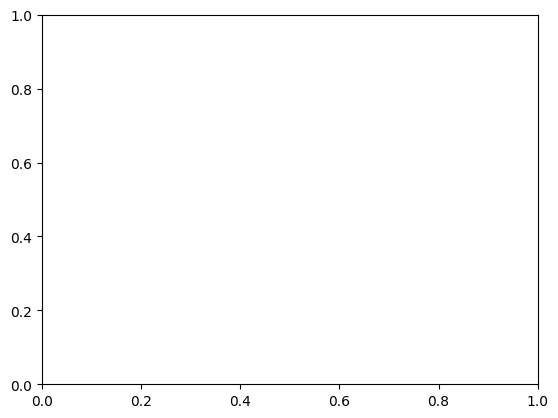

<Figure size 1000x600 with 0 Axes>

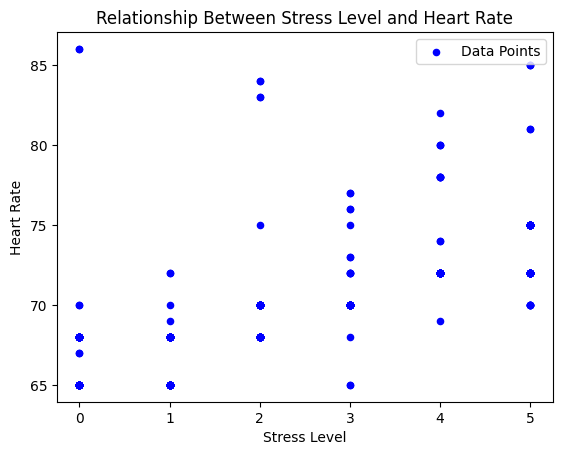

Index: 22
Description: Visualize the distribution of daily steps among individuals


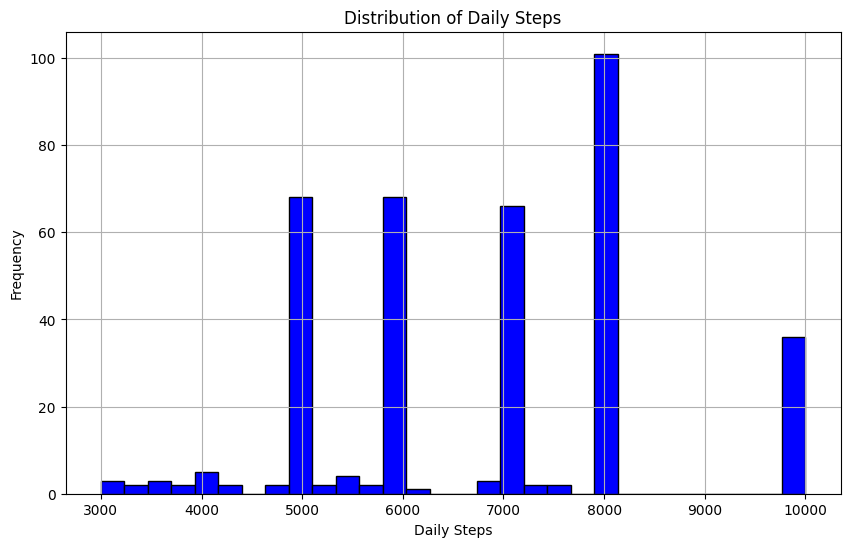

Index: 23
Description: Compare the average quality of sleep between individuals with and without sleep disorders
Exception [Errno 2] No such file or directory: 'your_data.csv' for index 23
Index: 24
Description: Show the relationship between physical activity level and daily steps
Index: 25
Description: Compare the average age of individuals across different occupations


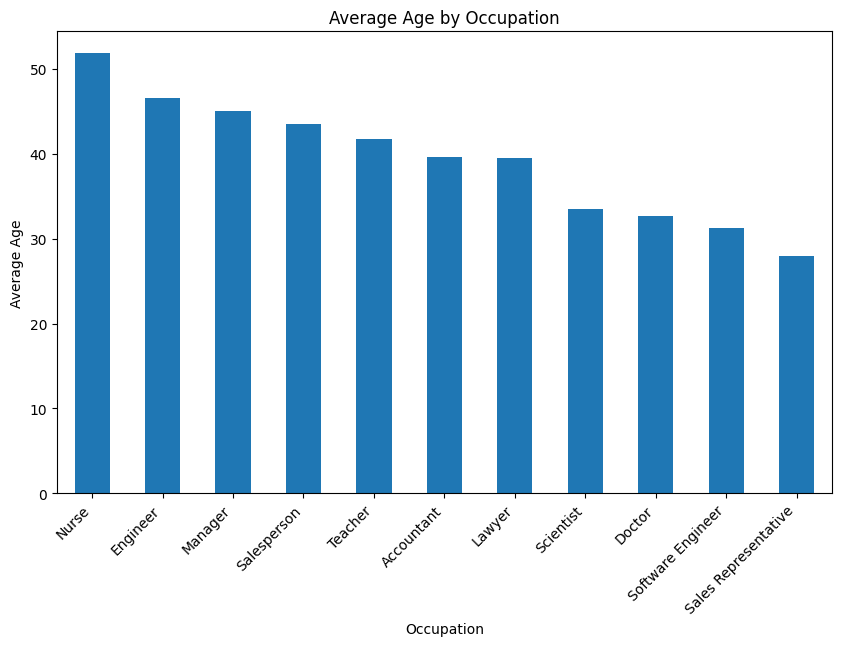

Index: 26
Description: Visualize the proportion of people in each stress level category


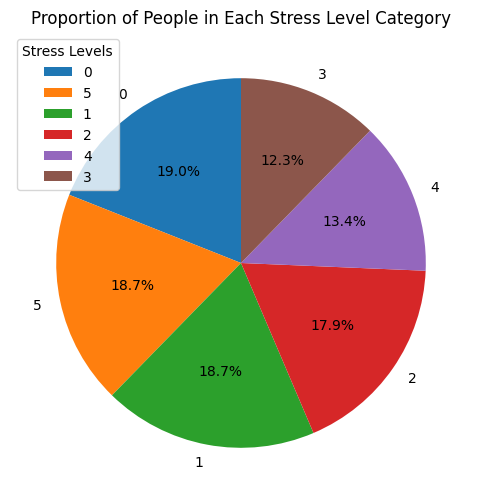

Index: 27
Description: Show the relationship between age and heart rate


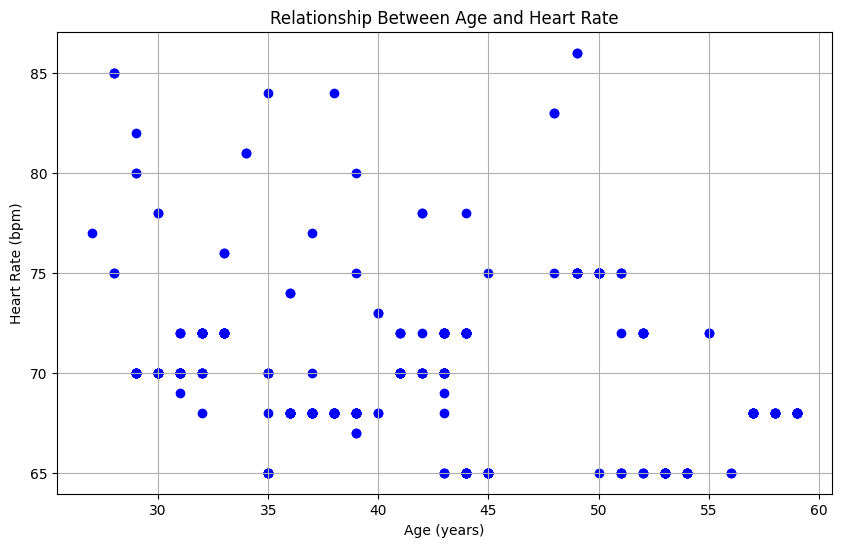

Index: 28
Description: Compare the average sleep duration of males and females


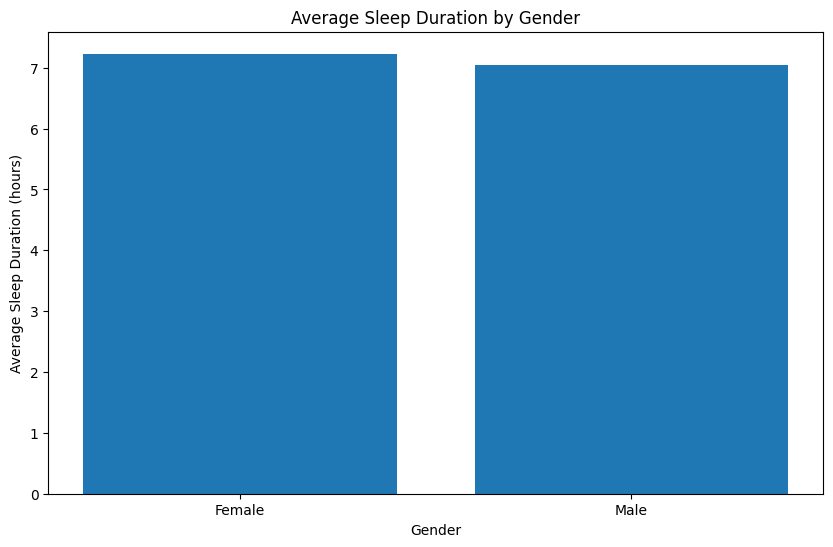

Index: 29
Description: Show the distribution of quality of sleep values in the dataset


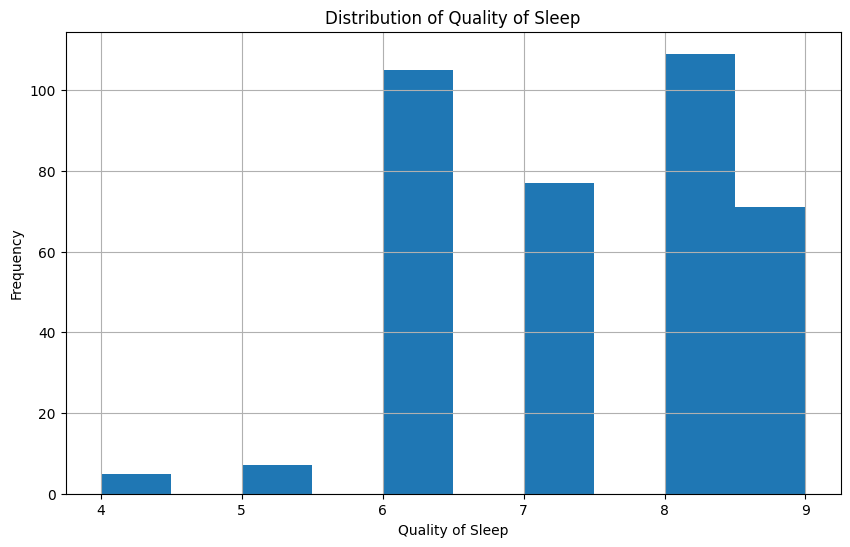

9/30


In [14]:
results = []
errors = 0
for index, row in train_df.iterrows():
    try:
        user_message = f"""{row["description"]}
        Use a {row['chart_type']}
        Example data:
        {df.head(5).to_string()}"""
        
        result = generate(system_message, user_message, "deepseek-r1:7b")
        
        chart_code = get_chart_code(result.message.content)
        print(f"Index: {index}")
        print(f"Description: {row["description"]}")
        exec(chart_code)
        results.append({
            "index": index,
            "success": 1,
            "chart_code": chart_code,
            "chart_type": row["chart_type"],
            "hand_check": "/"
        })
    except Exception as e:
        print(f"Exception {e} for index {index}")
        results.append({
            "index": index,
            "success": 0,
            "chart_code": "",
            "chart_type": row["chart_type"],
            "hand_check": 0
        })
        errors += 1

print(f"{errors}/{len(train_df)}")

In [15]:
save_json("data/deepseek-generation-give.json", results)

### Ask the model to choose and create a chart + Reasoning

In [99]:
def get_thinking(content: str):
    return content.split("</thinking>")[0].split("<thinking>")[1]

In [100]:
system_message = """You are a text-to-chart generating model. Always generate the charts using python and matplotlib. 
Always use the dataset example given that is already loaded with pandas as variable df. Do not generate code for loading the dataset!
Do not halucinate examples or generate sample data. Generate only one code snippet.
Never forget to generate the tags for each step!
Make sure to follow these steps in order and generate nothing else:
1) Give your thinking in the beginning between tags <thinking></thinking>
2) Generate the chart type between tags <chart-type></chart-type>
3) Generate the code between tags <chart-code></chart-code>.

Example:
Compare the average daily steps across different age groups

<thinking>
To compare the average daily steps across different age groups, I need to first group the dataset by age and calculate the mean of `Daily Steps` for each age group. Since the data is numerical and continuous, a bar chart is suitable to visually compare the averages across age groups.
</thinking>

<chart-type>
Bar Chart
</chart-type>

<chart-code>
import matplotlib.pyplot as plt

# Group by Age and calculate mean daily steps
avg_steps_by_age = df.groupby('Age')['Daily Steps'].mean()

# Plotting
plt.figure(figsize=(8,5))
avg_steps_by_age.plot(kind='bar', color='skyblue')
plt.title('Average Daily Steps by Age Group')
plt.xlabel('Age')
plt.ylabel('Average Daily Steps')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show() 
</chart-code>


Begin!"""

#### LLama 3.2 3B

Index: 0
Description: Show the relationship between sleep duration and quality of sleep


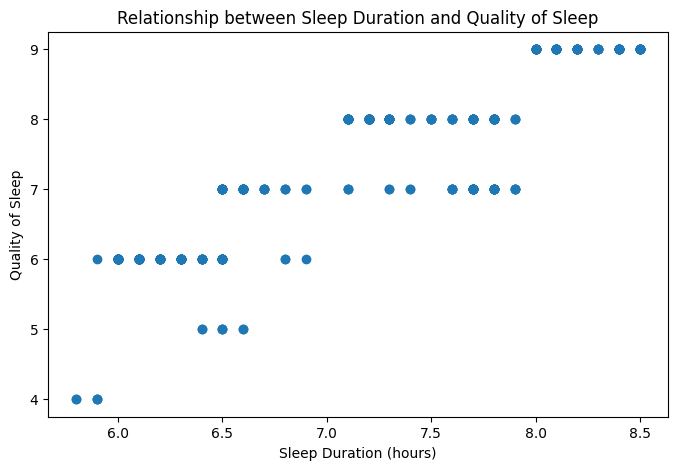

Index: 1
Description: Compare the average sleep duration across different occupations


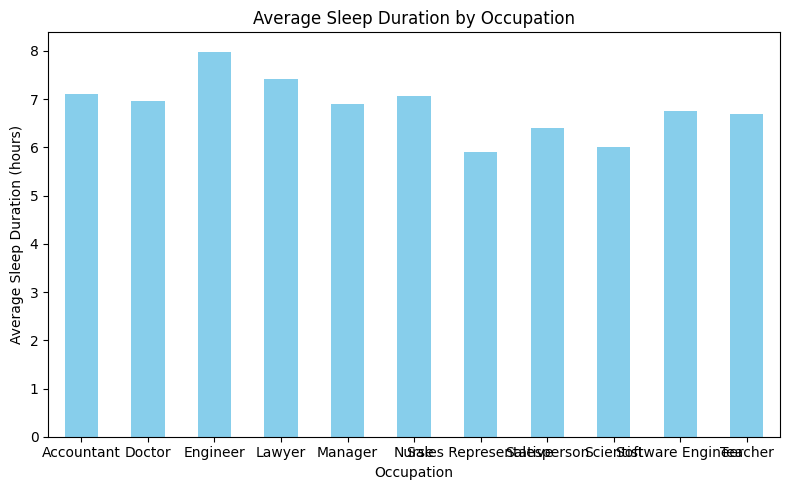

Index: 2
Description: Visualize the distribution of stress levels among all individuals
Exception Rectangle.set() got an unexpected keyword argument 'error_y' for index 2
Index: 3
Description: Show the gender distribution in the dataset


<Figure size 800x500 with 0 Axes>

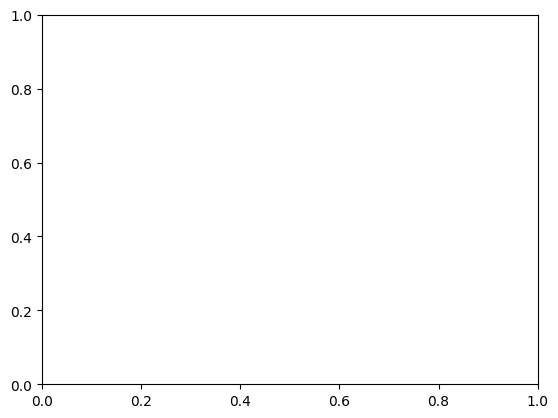

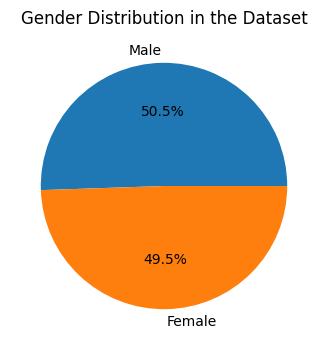

Index: 4
Description: Compare the average daily steps between people with and without a sleep disorder


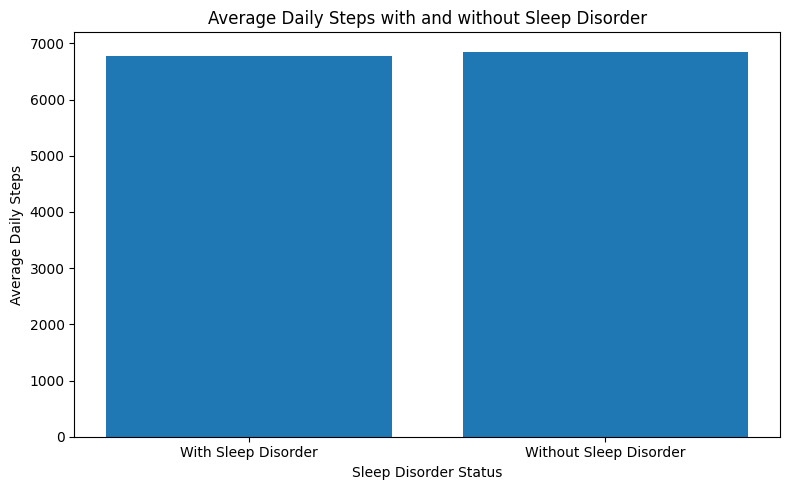

Index: 5
Description: Show how physical activity level relates to quality of sleep


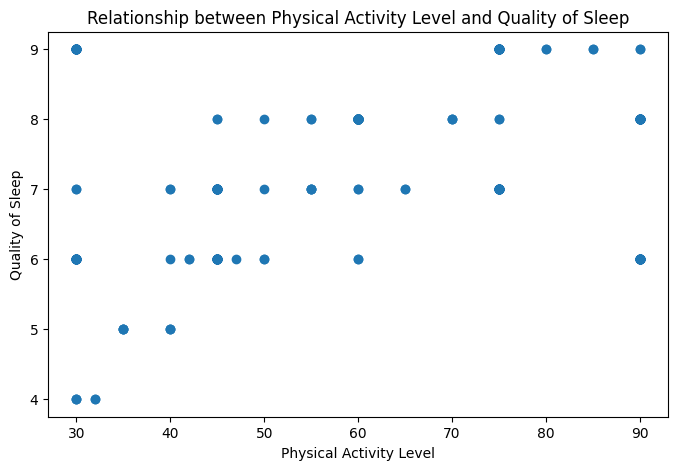

Index: 6
Description: Visualize the distribution of BMI categories among individuals


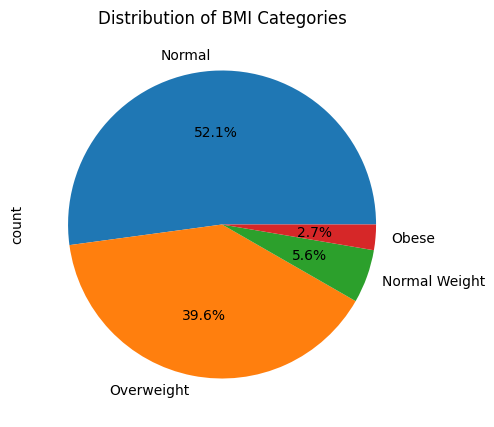

Index: 7
Description: Compare the average heart rate of individuals with different stress levels


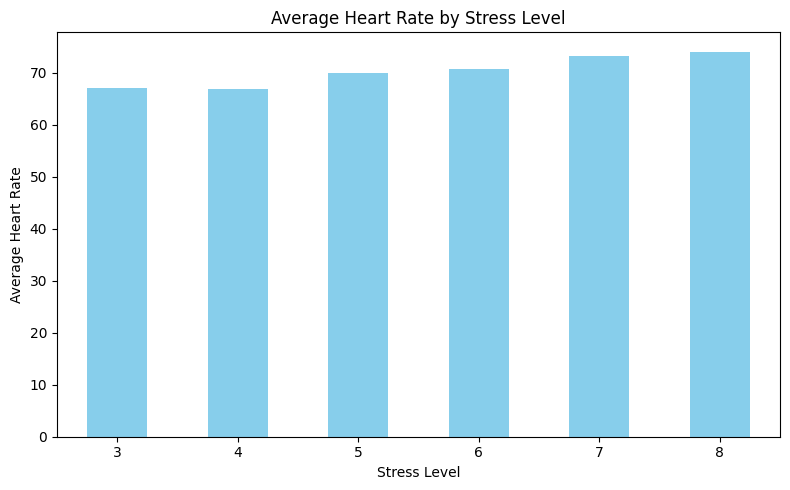

Index: 8
Description: Show the relationship between age and sleep duration


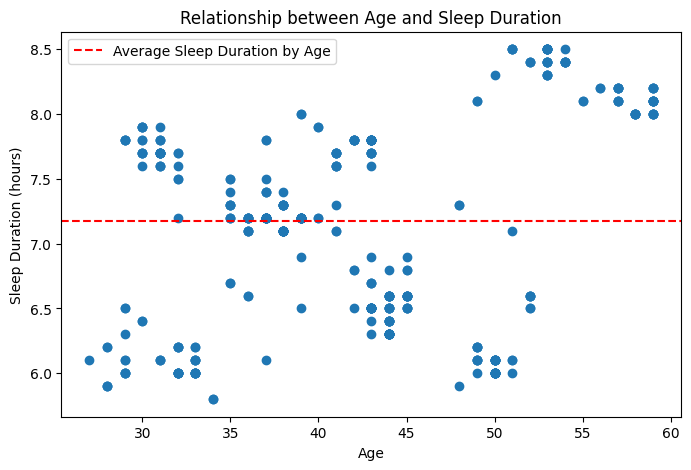

Index: 9
Description: Display the average quality of sleep for individuals grouped by occupation


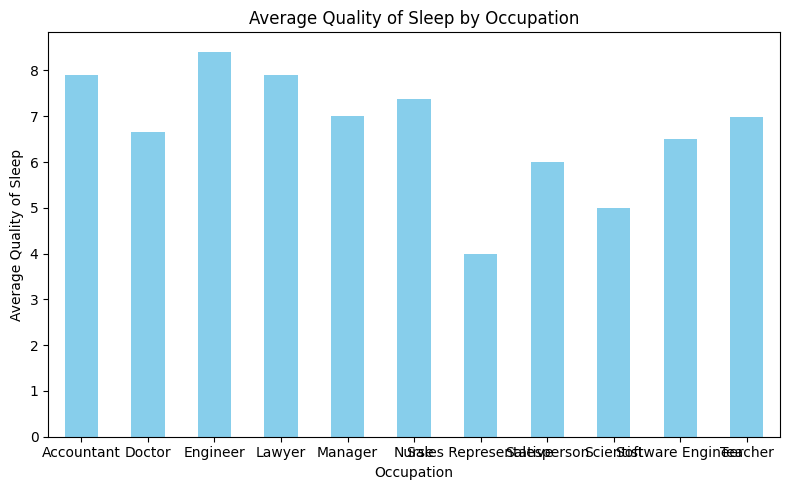

Index: 10
Description: Compare the average stress levels between males and females


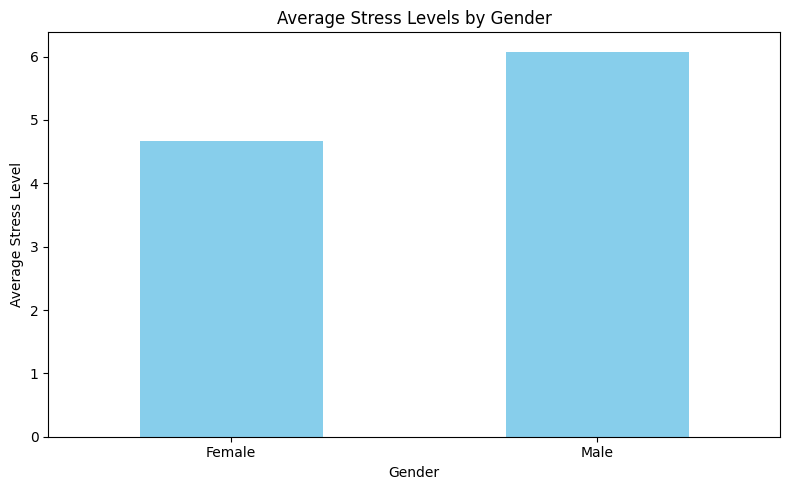

Index: 11
Description: Show the breakdown of sleep disorders reported in the dataset


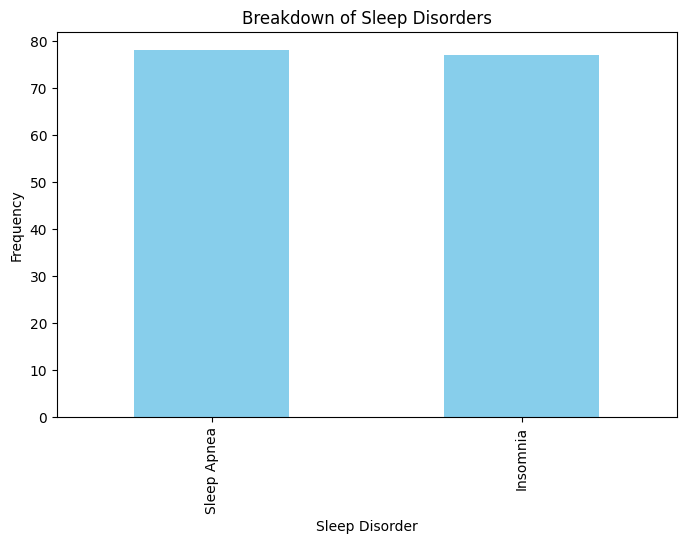

Index: 12
Description: Visualize the relationship between daily steps and heart rate


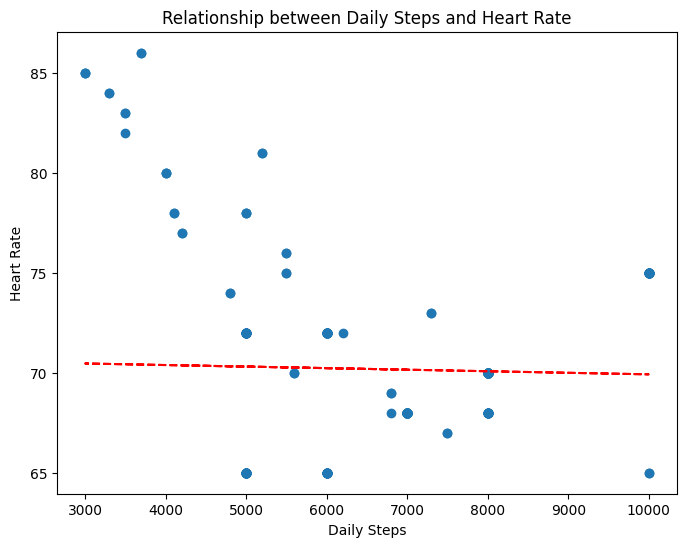

Index: 13
Description: Show the distribution of sleep duration values across the dataset


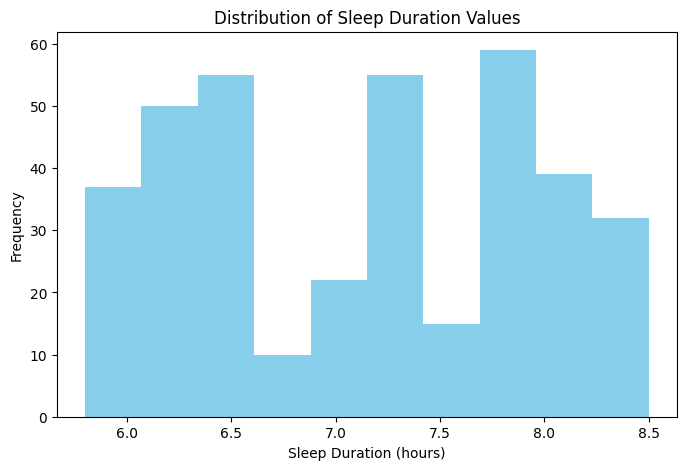

Index: 14
Description: Compare the average physical activity levels of individuals with and without sleep disorders


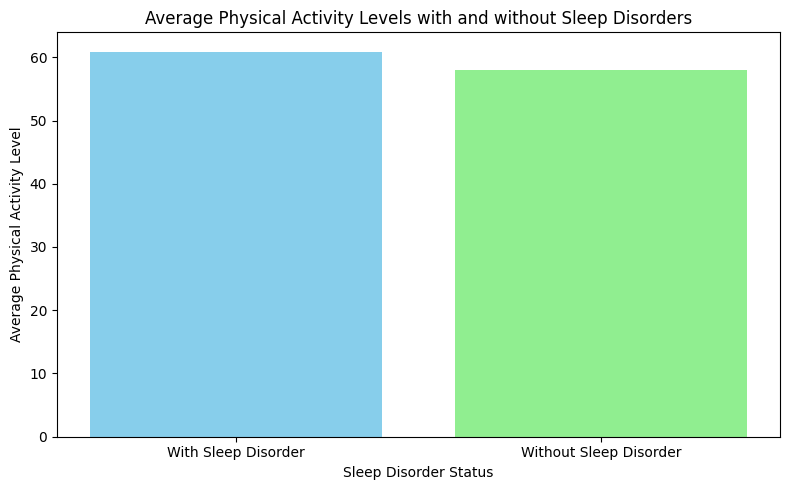

Index: 15
Description: Plot the relationship between stress level and sleep duration


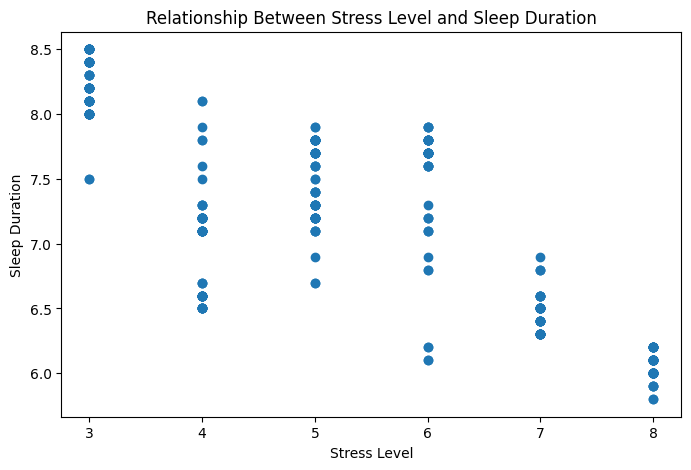

Index: 16
Description: Compare the average blood pressure readings among different BMI categories
Exception agg function failed [how->mean,dtype->object] for index 16
Index: 17
Description: Show the age distribution of individuals in the dataset


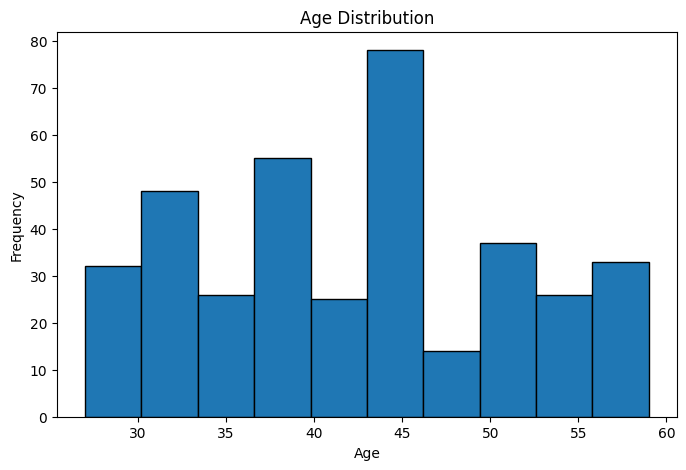

Index: 18
Description: Compare the average sleep quality between individuals with different heart rate ranges


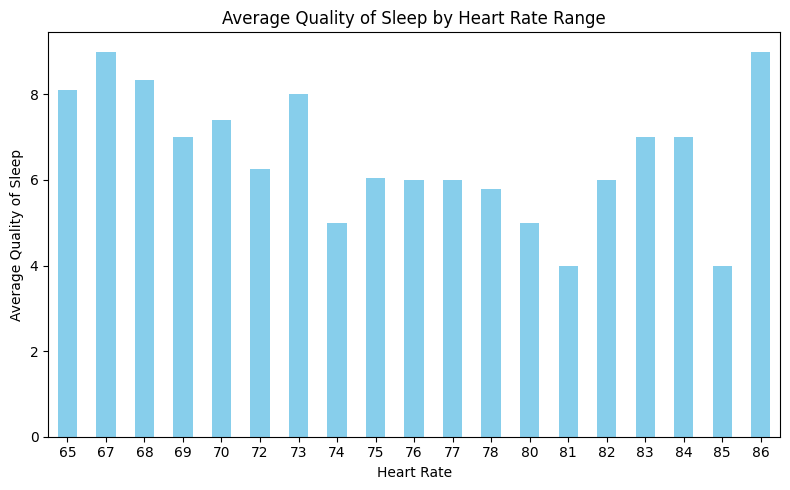

Index: 19
Description: Visualize the relationship between daily steps and sleep quality
Exception 'Sleep Quality' for index 19
Index: 20
Description: Compare the average sleep duration of different BMI categories


<Figure size 800x500 with 0 Axes>

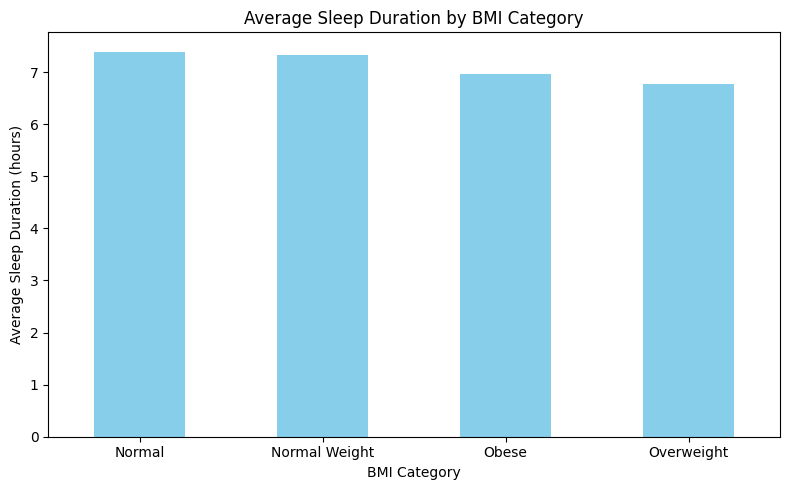

Index: 21
Description: Show the relationship between stress level and heart rate


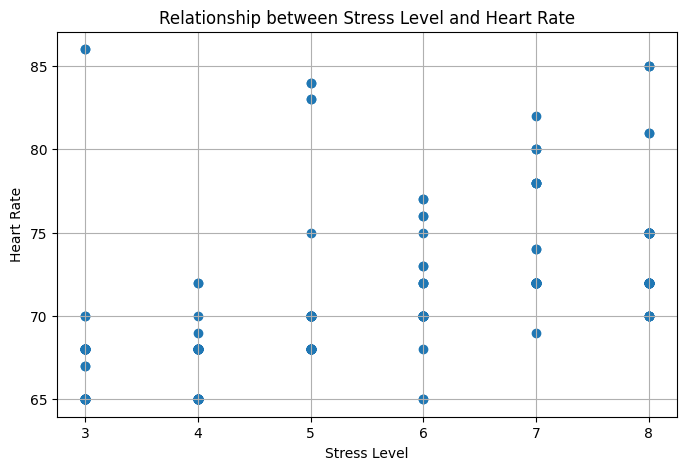

Index: 22
Description: Visualize the distribution of daily steps among individuals


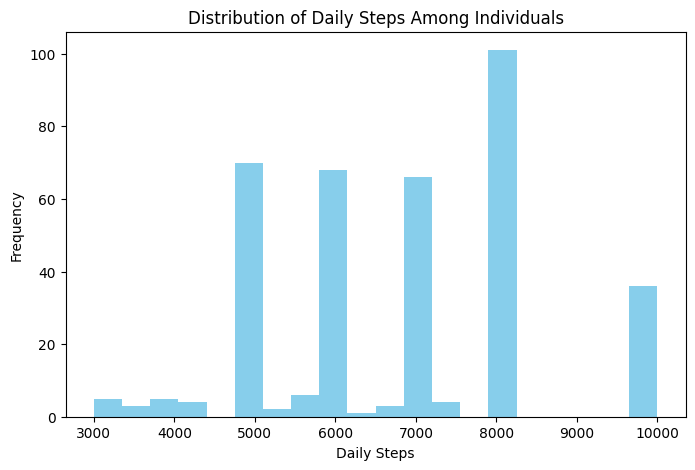

Index: 23
Description: Compare the average quality of sleep between individuals with and without sleep disorders


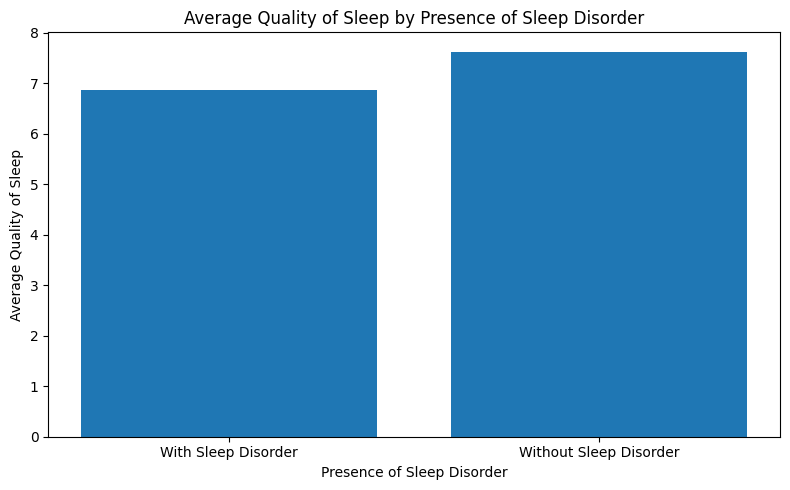

Index: 24
Description: Show the relationship between physical activity level and daily steps


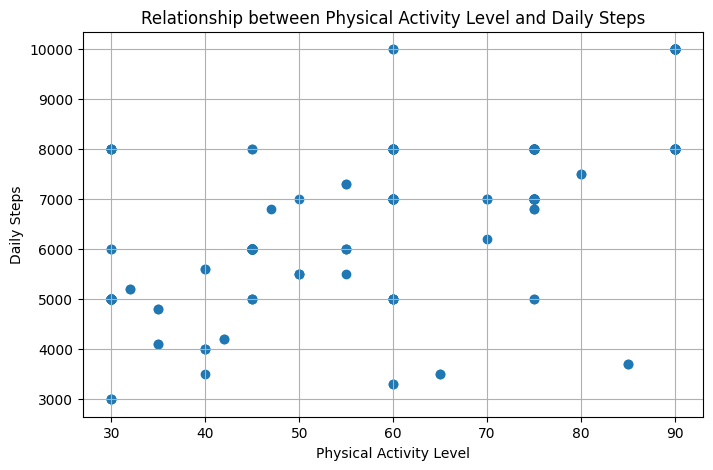

Index: 25
Description: Compare the average age of individuals across different occupations


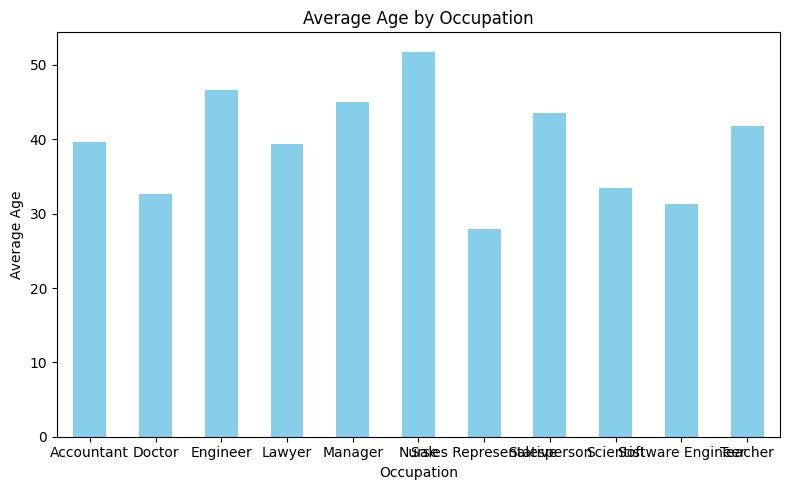

Index: 26
Description: Visualize the proportion of people in each stress level category


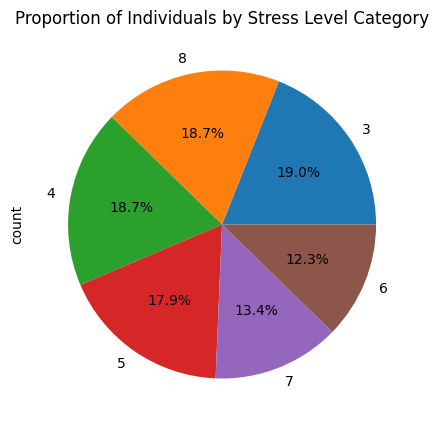

Index: 27
Description: Show the relationship between age and heart rate


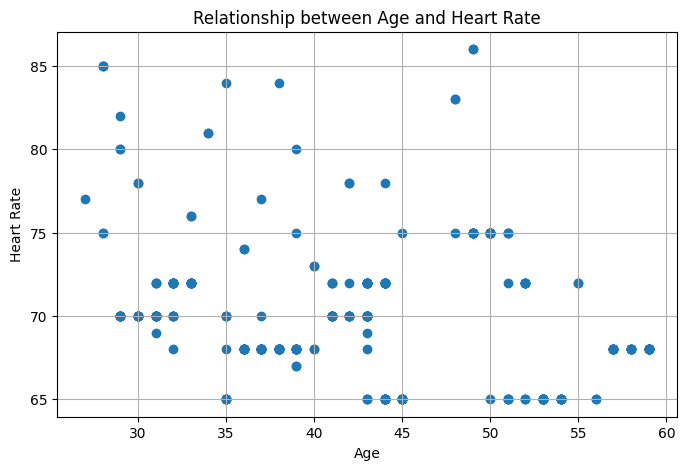

Index: 28
Description: Compare the average sleep duration of males and females


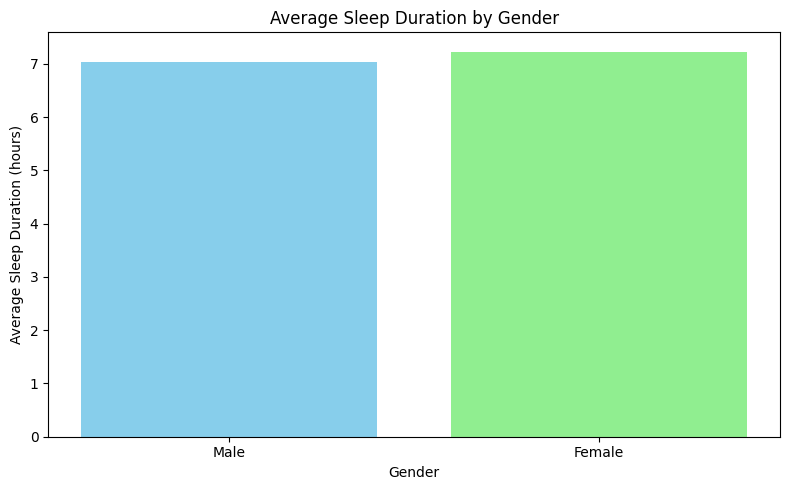

Index: 29
Description: Show the distribution of quality of sleep values in the dataset


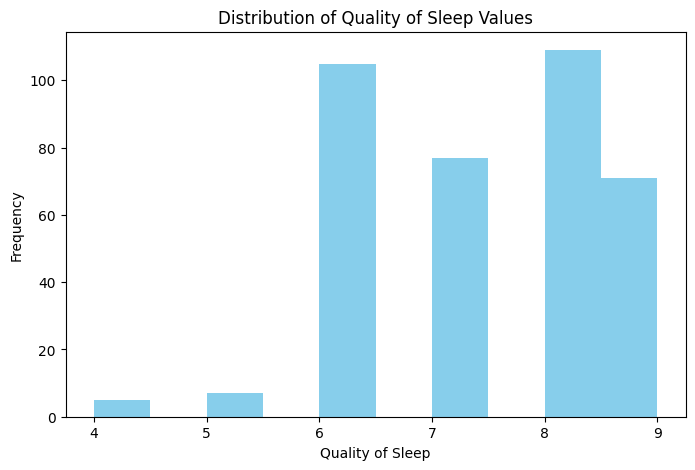

3/30


In [101]:
results = []
errors = 0
for index, row in train_df.iterrows():
    try:
        user_message = f"""{row["description"]}

        Example data:
        {df.head(5).to_string()}"""
        
        result = generate(system_message, user_message, "llama3.2:3b-instruct-q4_K_S")
        chart_type = get_chart_type(result.message.content)
        chart_code = get_chart_code(result.message.content)
        thinking = get_thinking(result.message.content)
        print(f"Index: {index}")
        print(f"Description: {row["description"]}")
        exec(chart_code)
        results.append({
            "index": index,
            "success": 1,
            "chart_type": chart_type,
            "expected_chart_type": row["chart_type"],
            "thinking": thinking, 
            "chart_code": chart_code,
            "hit": int(chart_type.lower() == row["chart_type"].lower()),
            "hand_check": "/"
        })
    except Exception as e:
        print(f"Exception {e} for index {index}")
        results.append({
            "index": index,
            "success": 0,
            "chart_type": "",
            "thinking": "",
            "chart_code": "",
            "hit": 0,
            "hand_check": 0
        })
        errors += 1

print(f"{errors}/{len(train_df)}")

In [102]:
save_json("data/llama-32-generation-thinking.json", results)

#### LLama 3.1 8B

Index: 0
Description: Show the relationship between sleep duration and quality of sleep


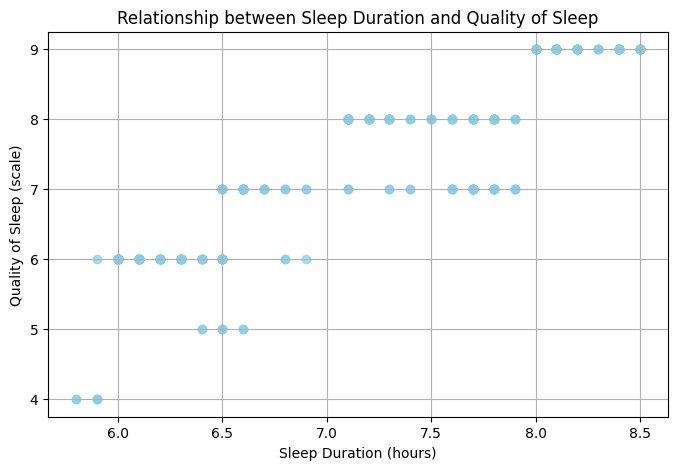

Index: 1
Description: Compare the average sleep duration across different occupations


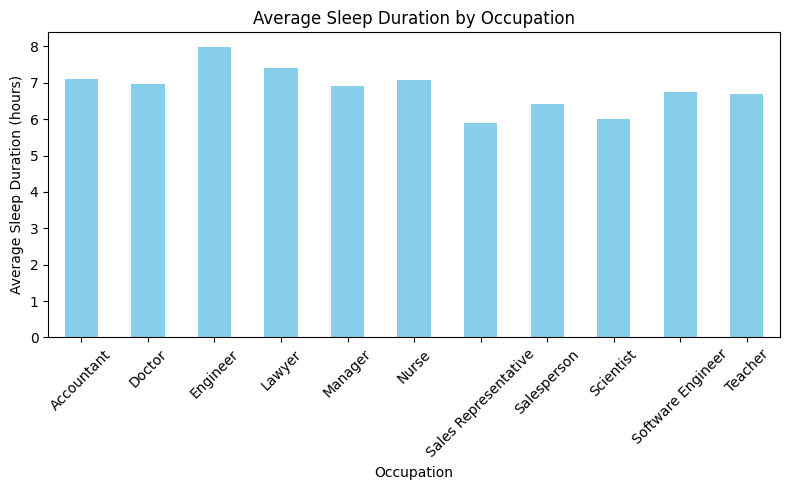

Index: 2
Description: Visualize the distribution of stress levels among all individuals


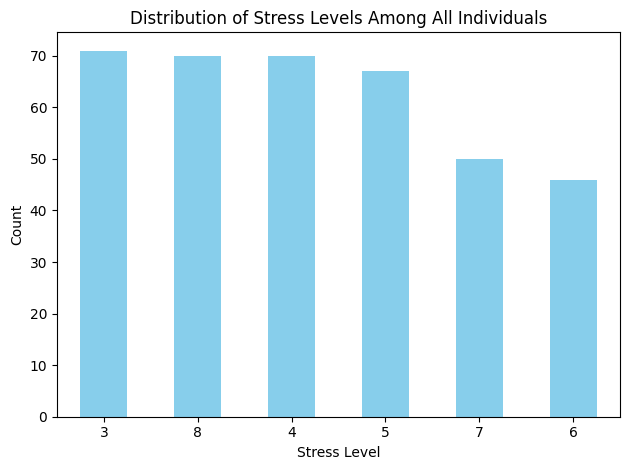

Index: 3
Description: Show the gender distribution in the dataset


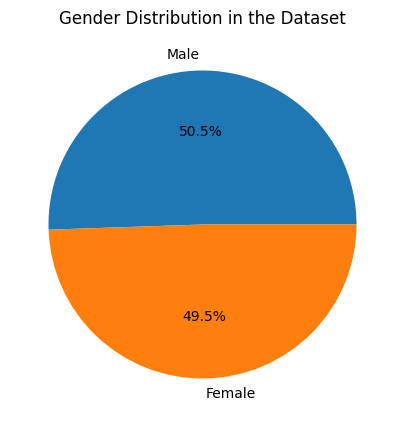

Index: 4
Description: Compare the average daily steps between people with and without a sleep disorder


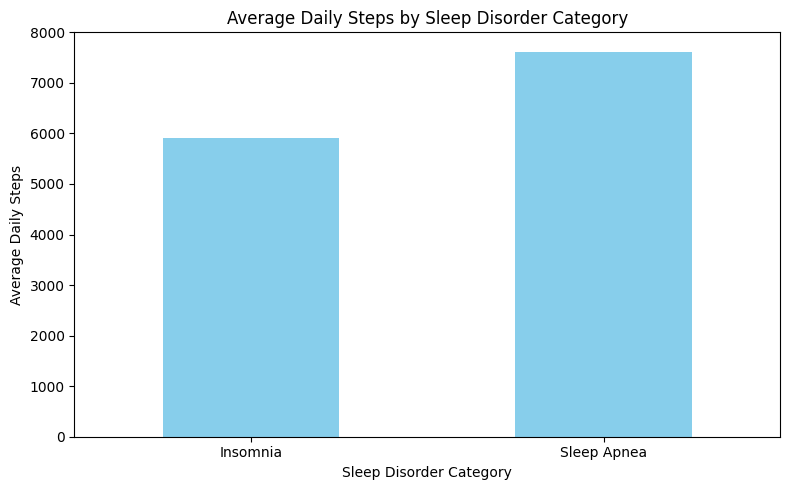

Index: 5
Description: Show how physical activity level relates to quality of sleep


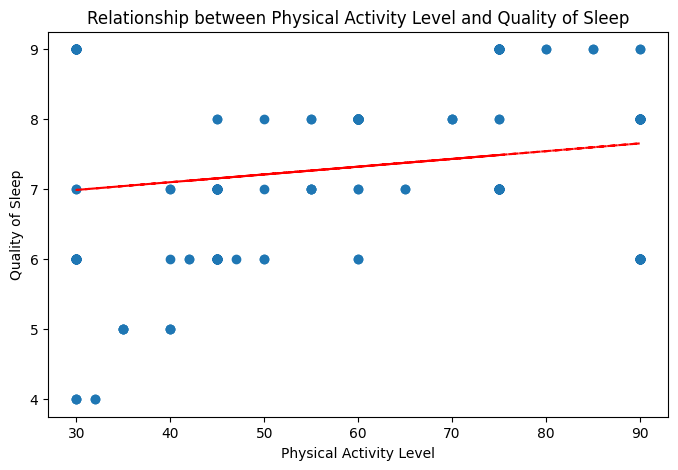

Index: 6
Description: Visualize the distribution of BMI categories among individuals


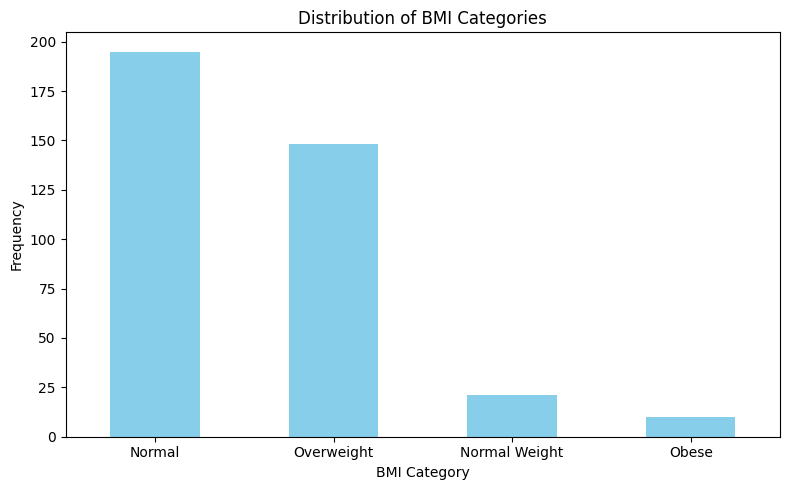

Index: 7
Description: Compare the average heart rate of individuals with different stress levels


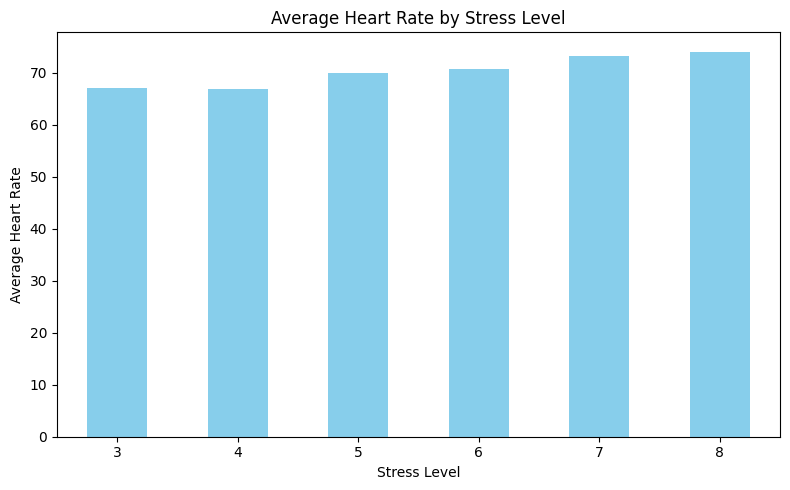

Index: 8
Description: Show the relationship between age and sleep duration


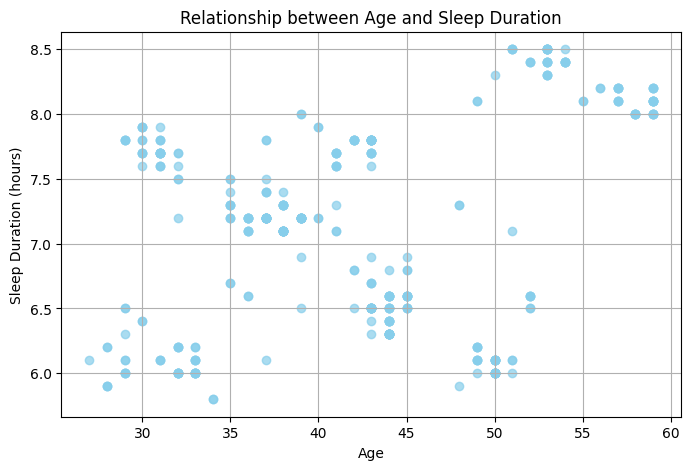

Index: 9
Description: Display the average quality of sleep for individuals grouped by occupation


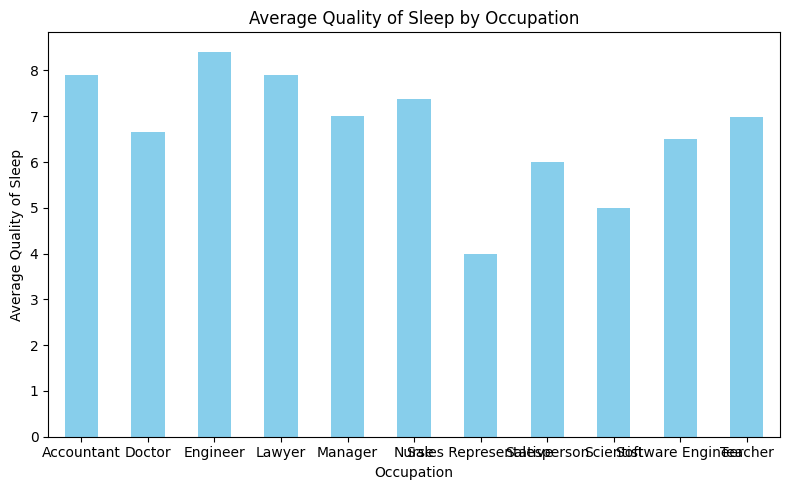

Index: 10
Description: Compare the average stress levels between males and females


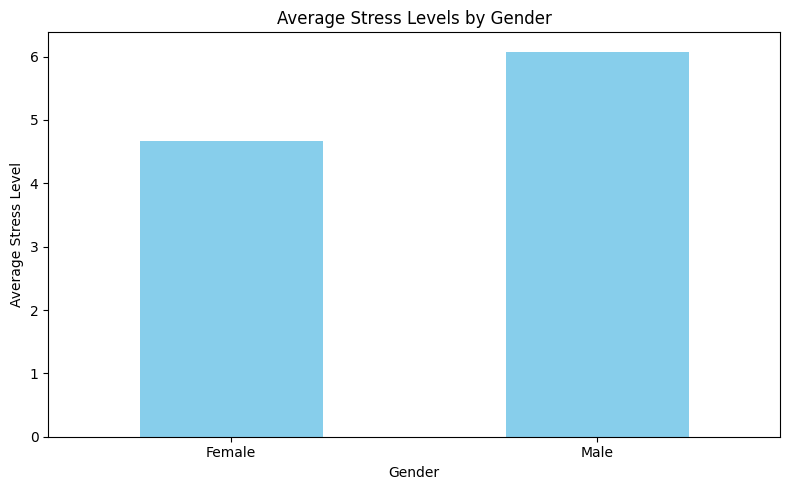

Index: 11
Description: Show the breakdown of sleep disorders reported in the dataset


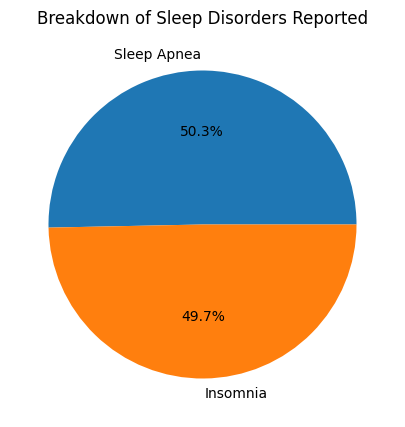

Index: 12
Description: Visualize the relationship between daily steps and heart rate


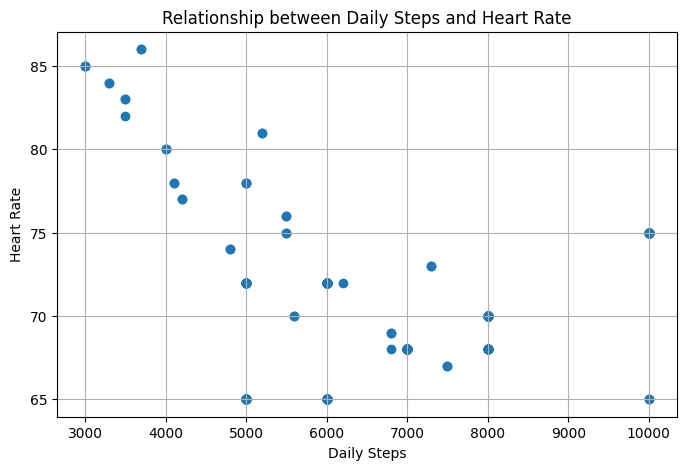

Index: 13
Description: Show the distribution of sleep duration values across the dataset


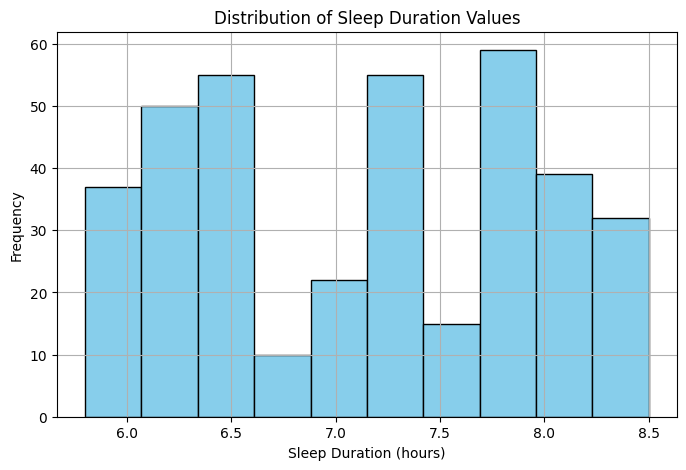

Index: 14
Description: Compare the average physical activity levels of individuals with and without sleep disorders


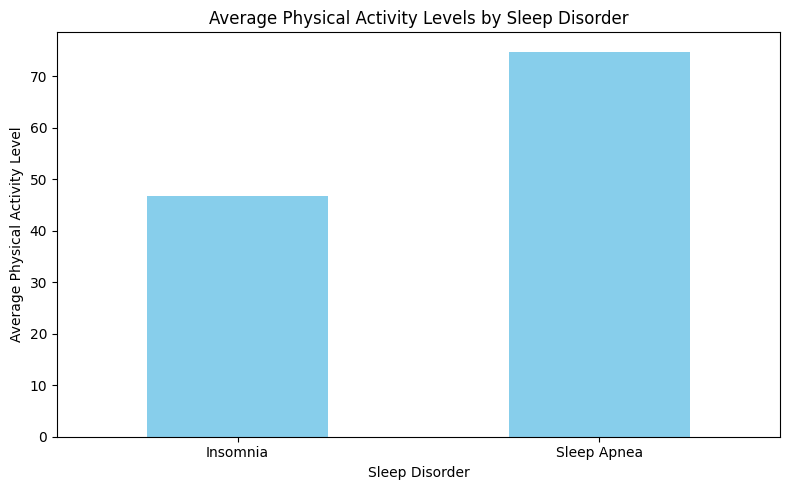

Index: 15
Description: Plot the relationship between stress level and sleep duration


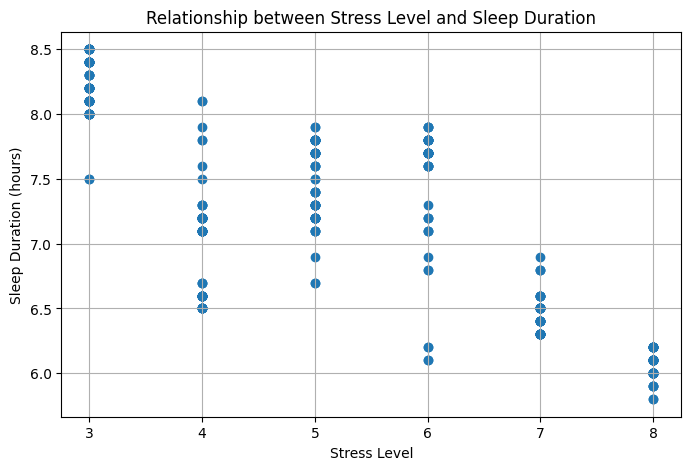

Index: 16
Description: Compare the average blood pressure readings among different BMI categories
Exception agg function failed [how->mean,dtype->object] for index 16
Index: 17
Description: Show the age distribution of individuals in the dataset


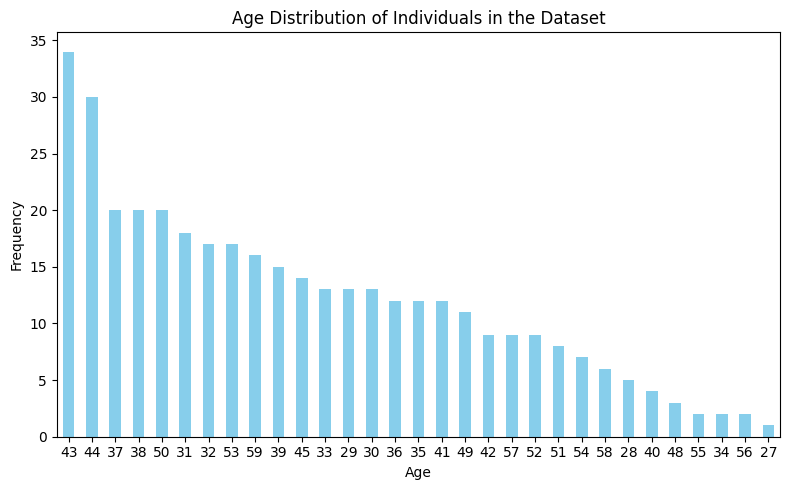

Index: 18
Description: Compare the average sleep quality between individuals with different heart rate ranges


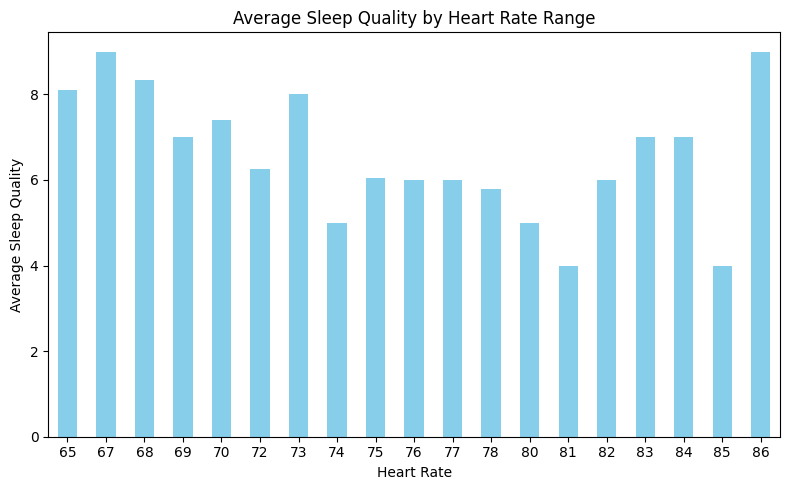

Index: 19
Description: Visualize the relationship between daily steps and sleep quality


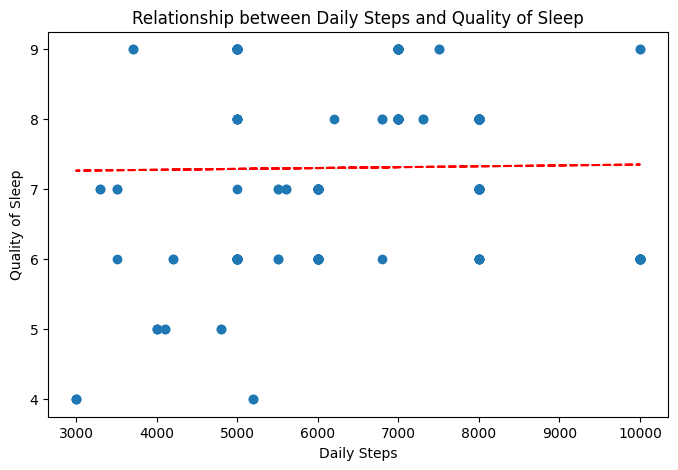

Index: 20
Description: Compare the average sleep duration of different BMI categories


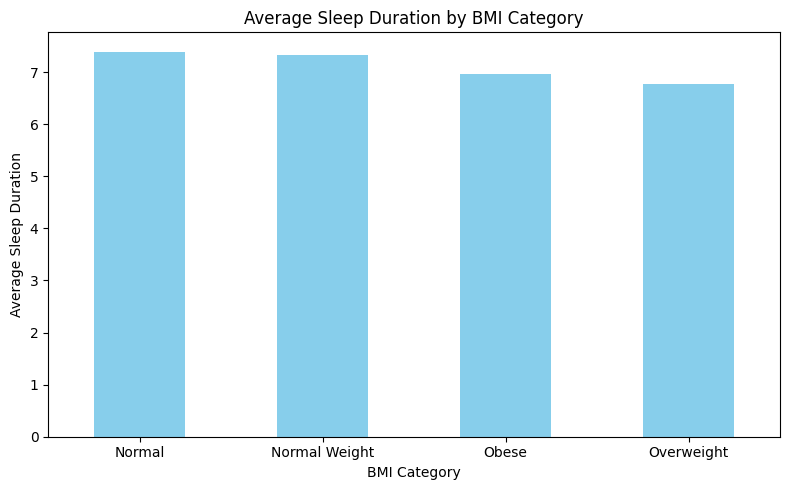

Index: 21
Description: Show the relationship between stress level and heart rate


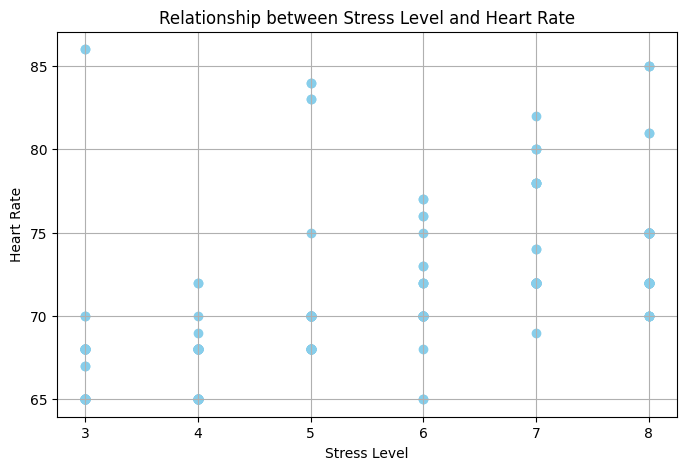

Index: 22
Description: Visualize the distribution of daily steps among individuals


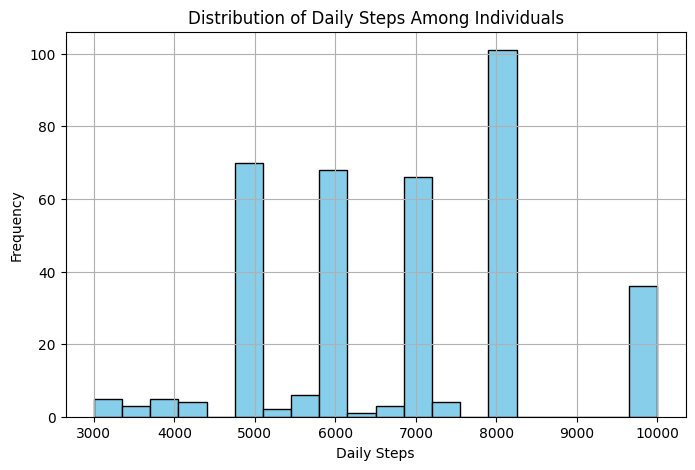

Index: 23
Description: Compare the average quality of sleep between individuals with and without sleep disorders


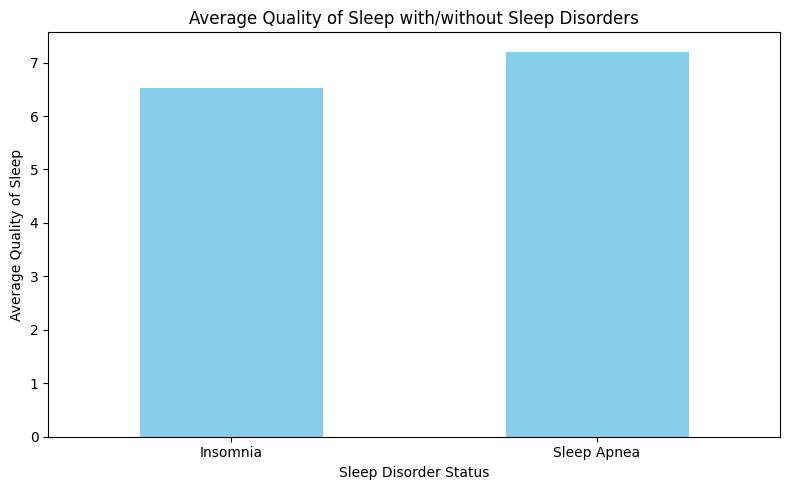

Index: 24
Description: Show the relationship between physical activity level and daily steps


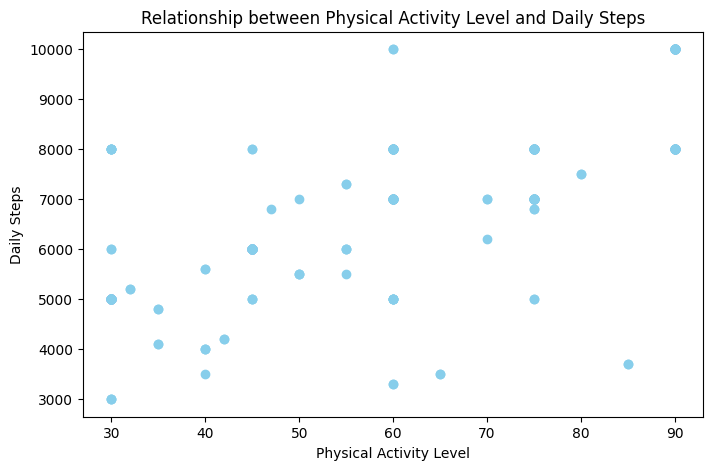

Index: 25
Description: Compare the average age of individuals across different occupations


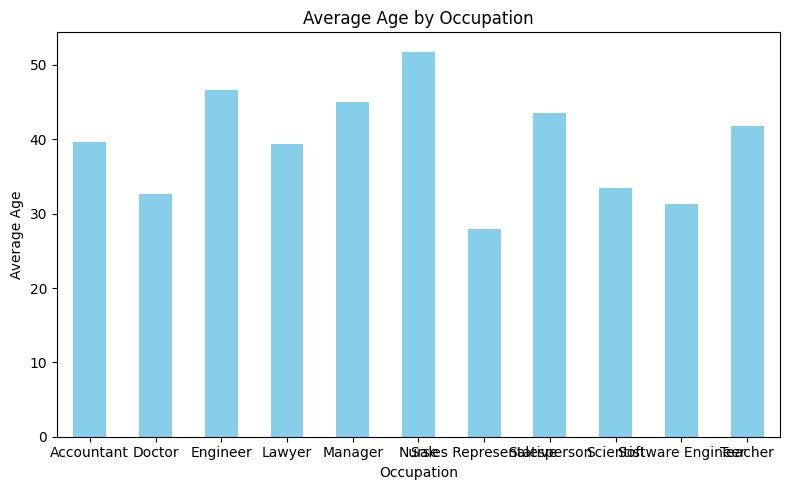

Index: 26
Description: Visualize the proportion of people in each stress level category


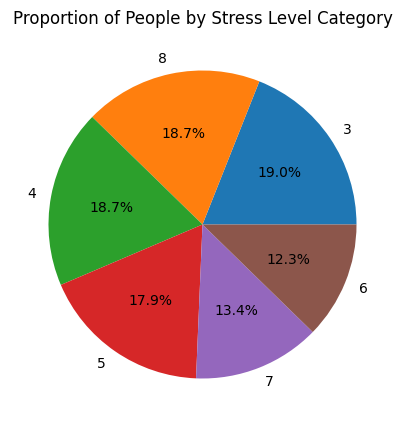

Index: 27
Description: Show the relationship between age and heart rate


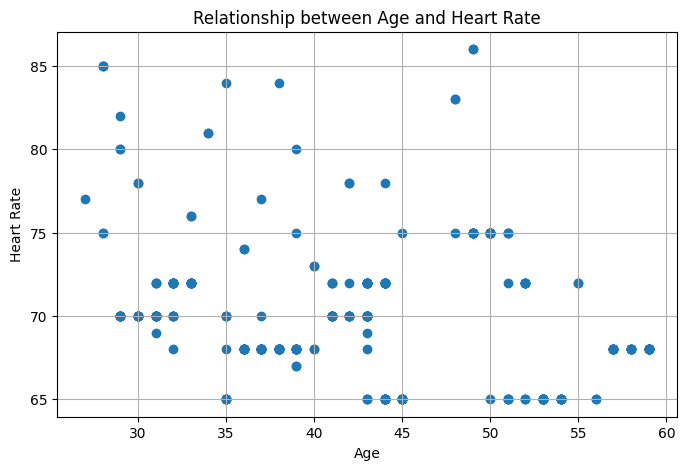

Index: 28
Description: Compare the average sleep duration of males and females


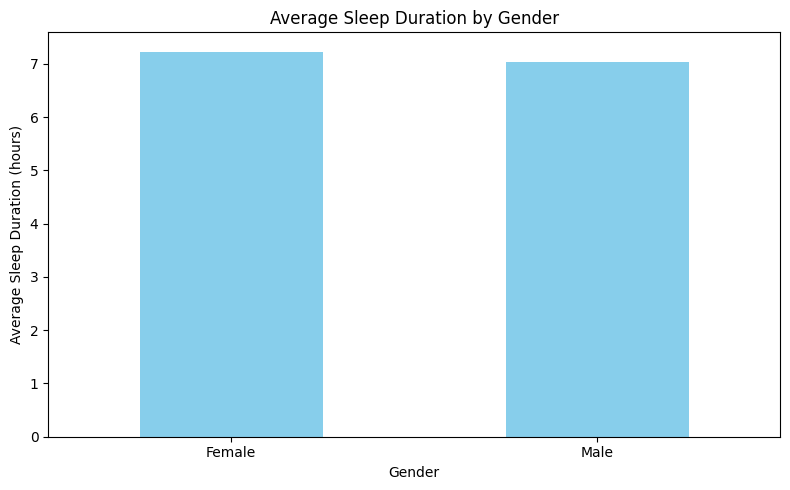

Index: 29
Description: Show the distribution of quality of sleep values in the dataset


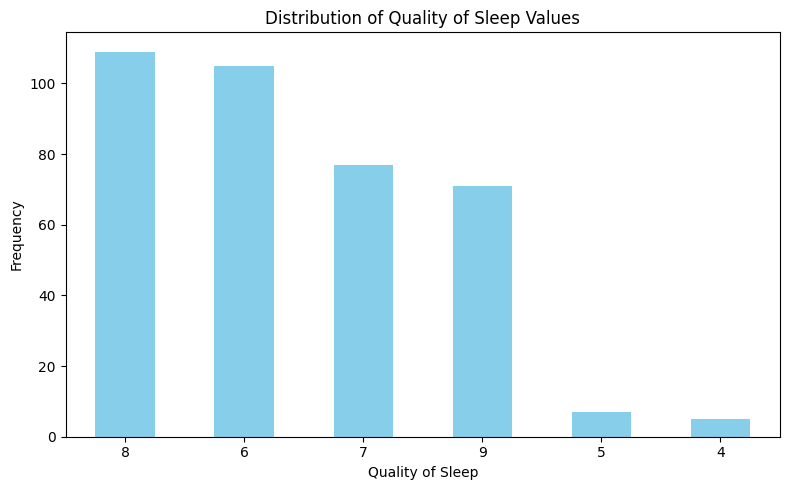

1/30


In [104]:
results = []
errors = 0
for index, row in train_df.iterrows():
    try:
        user_message = f"""{row["description"]}

        Example data:
        {df.head(5).to_string()}"""
        
        result = generate(system_message, user_message, "llama3.1:8b-instruct-q4_K_S")
        chart_type = get_chart_type(result.message.content)
        chart_code = get_chart_code(result.message.content)
        thinking = get_thinking(result.message.content)
        print(f"Index: {index}")
        print(f"Description: {row["description"]}")
        exec(chart_code)
        results.append({
            "index": index,
            "success": 1,
            "chart_type": chart_type,
            "expected_chart_type": row["chart_type"],
            "thinking": thinking,
            "chart_code": chart_code,
            "hit": int(chart_type.lower() == row["chart_type"].lower()),
            "hand_check": "/"
        })
    except Exception as e:
        print(f"Exception {e} for index {index}")
        results.append({
            "index": index,
            "success": 0,
            "chart_type": "",
            "thinking": "",
            "chart_code": "",
            "hit": 0,
            "hand_check": 0
        })
        errors += 1

print(f"{errors}/{len(train_df)}")

In [105]:
save_json("data/llama-31-generation-thinking.json", results)

#### Deepseek 7b

Index: 0
Description: Show the relationship between sleep duration and quality of sleep


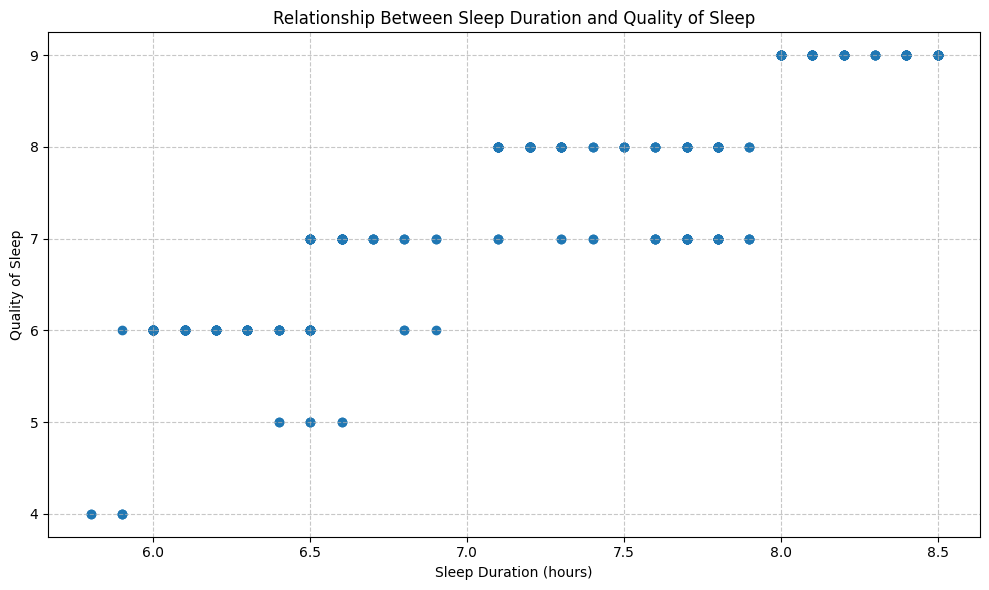

Index: 1
Description: Compare the average sleep duration across different occupations


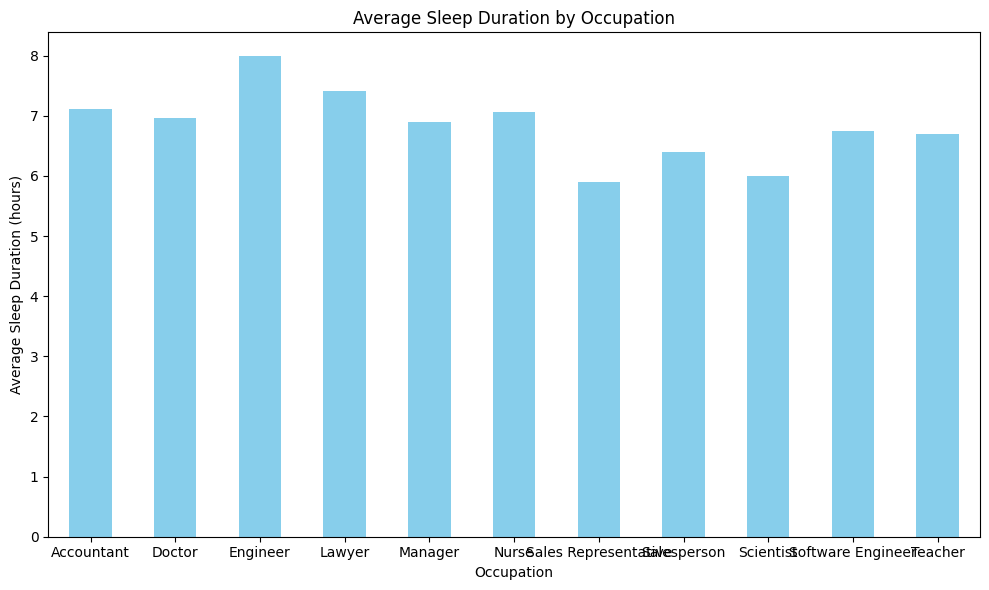

Index: 2
Description: Visualize the distribution of stress levels among all individuals


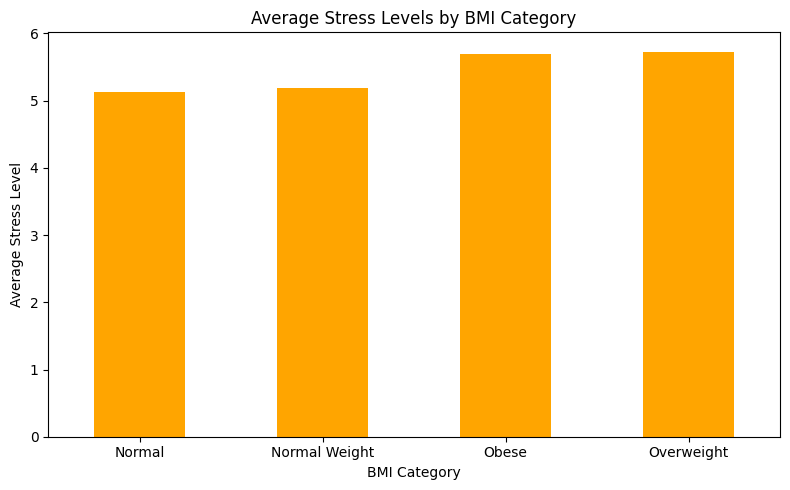

Index: 3
Description: Show the gender distribution in the dataset


<string>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


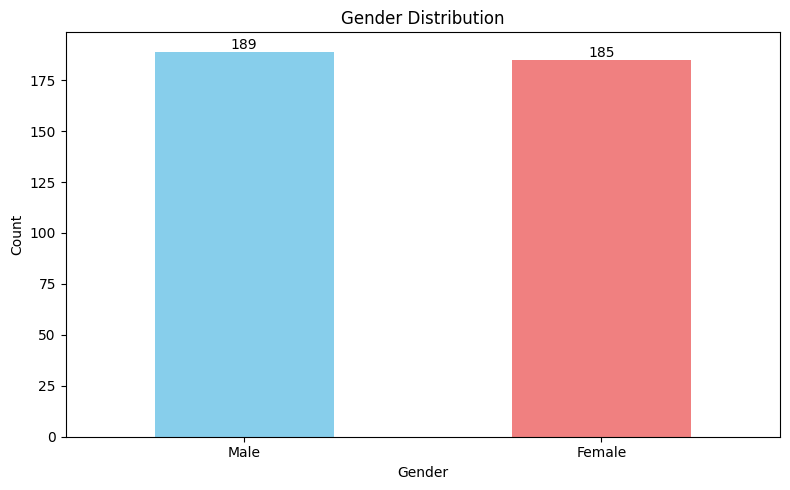

Index: 4
Description: Compare the average daily steps between people with and without a sleep disorder


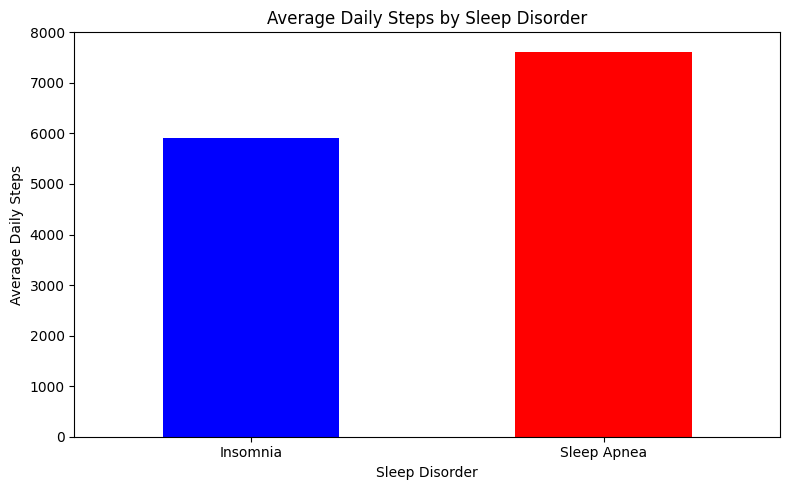

Index: 5
Description: Show how physical activity level relates to quality of sleep


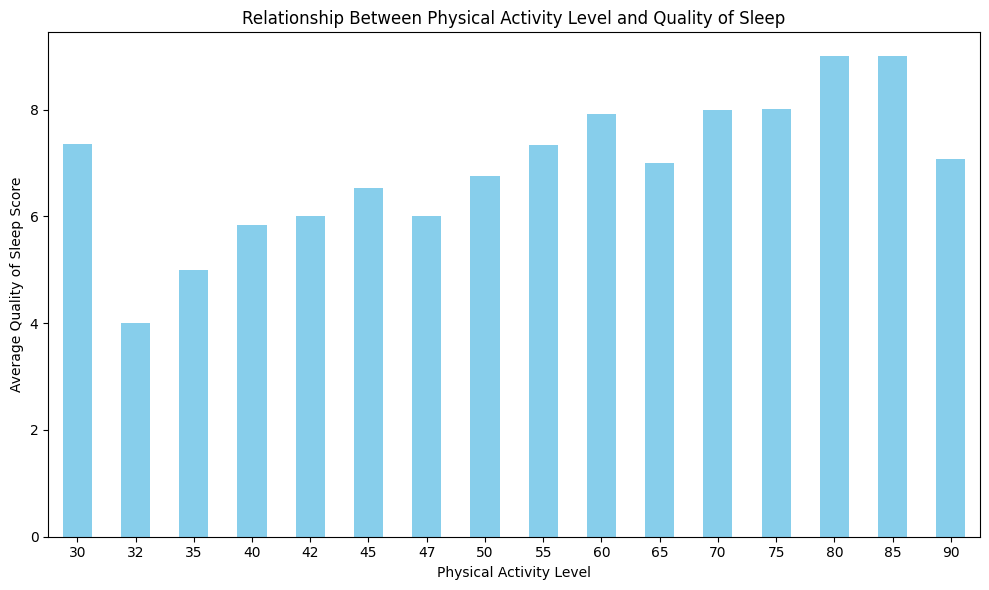

Index: 6
Description: Visualize the distribution of BMI categories among individuals


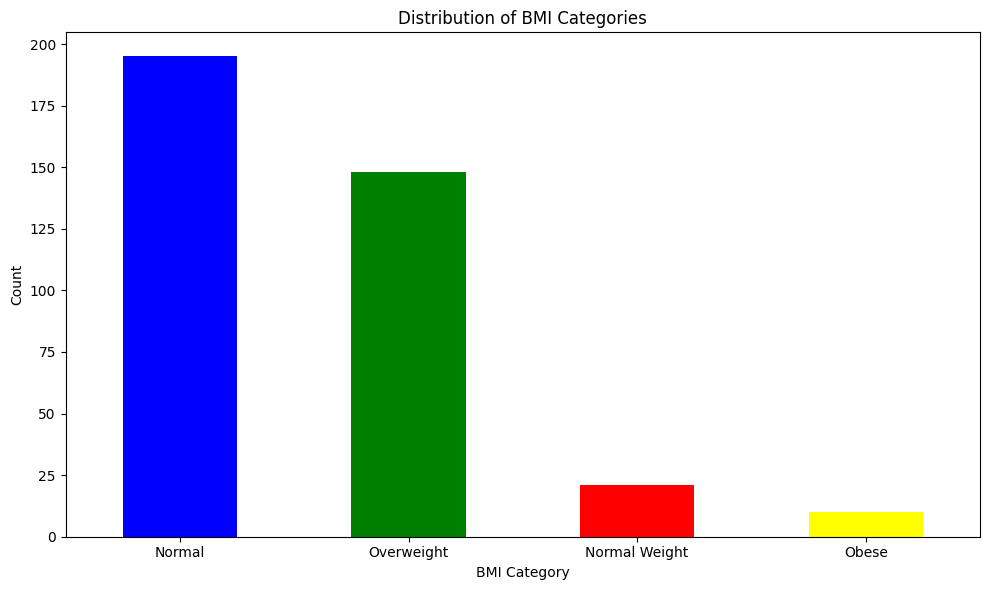

Index: 7
Description: Compare the average heart rate of individuals with different stress levels


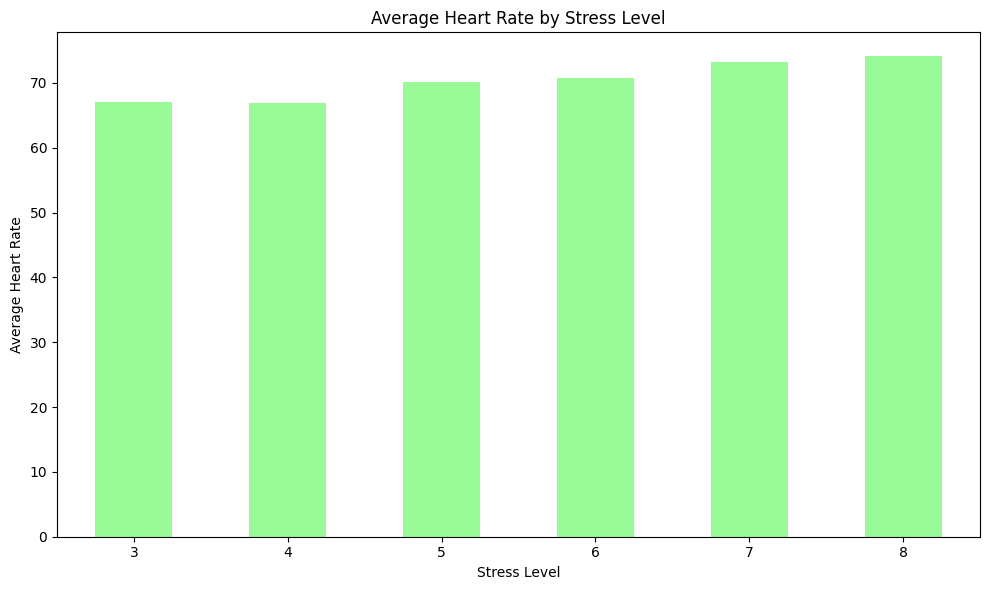

Index: 8
Description: Show the relationship between age and sleep duration


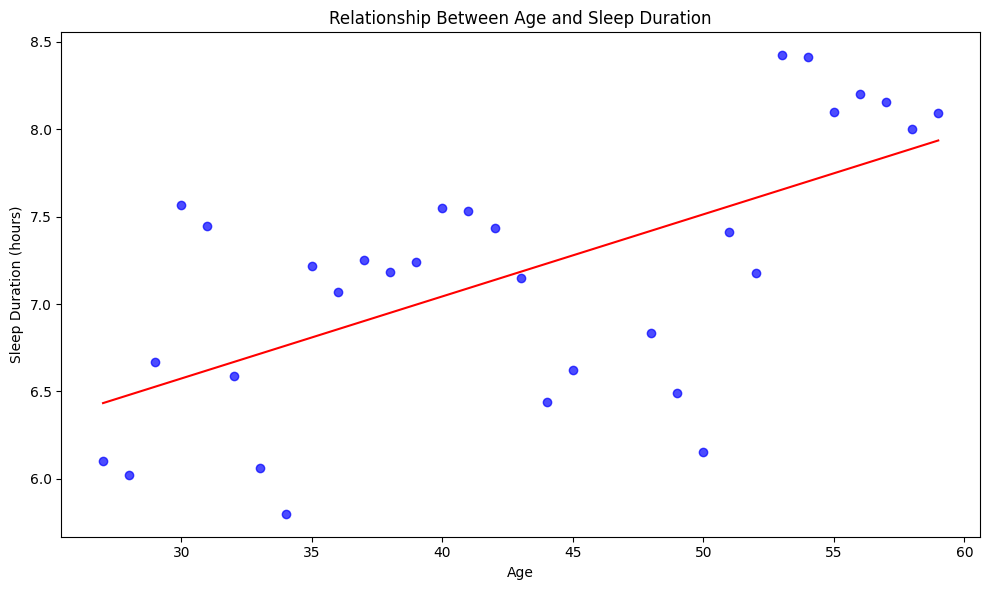

Index: 9
Description: Display the average quality of sleep for individuals grouped by occupation


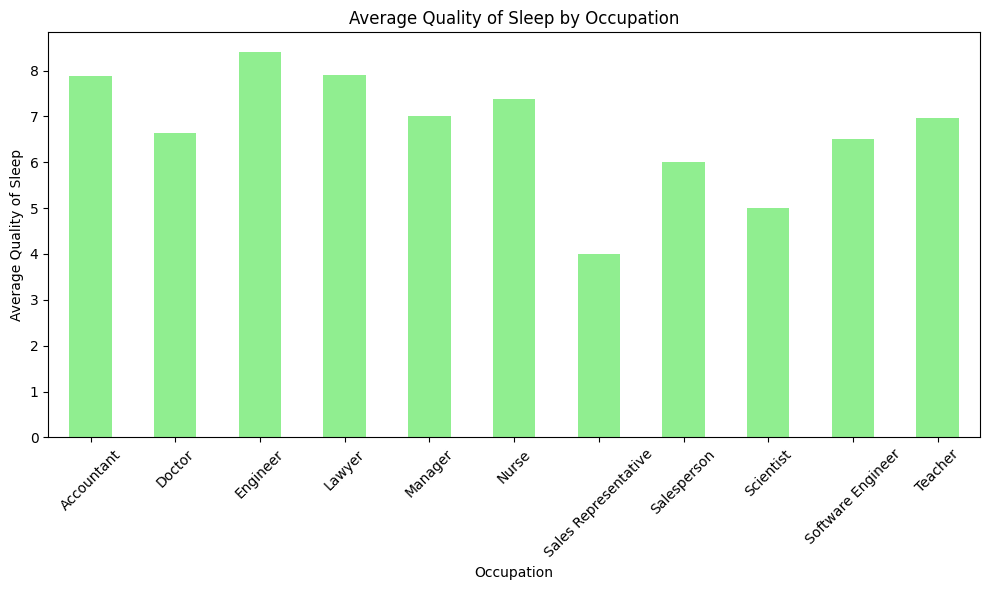

Index: 10
Description: Compare the average stress levels between males and females


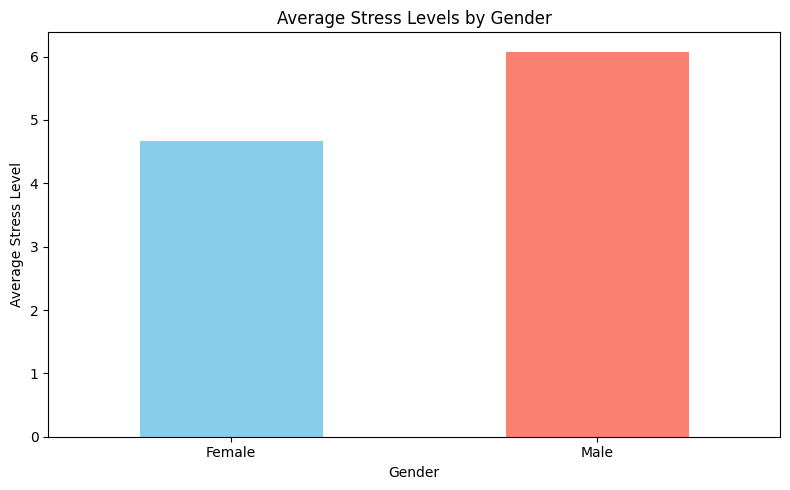

Index: 11
Description: Show the breakdown of sleep disorders reported in the dataset


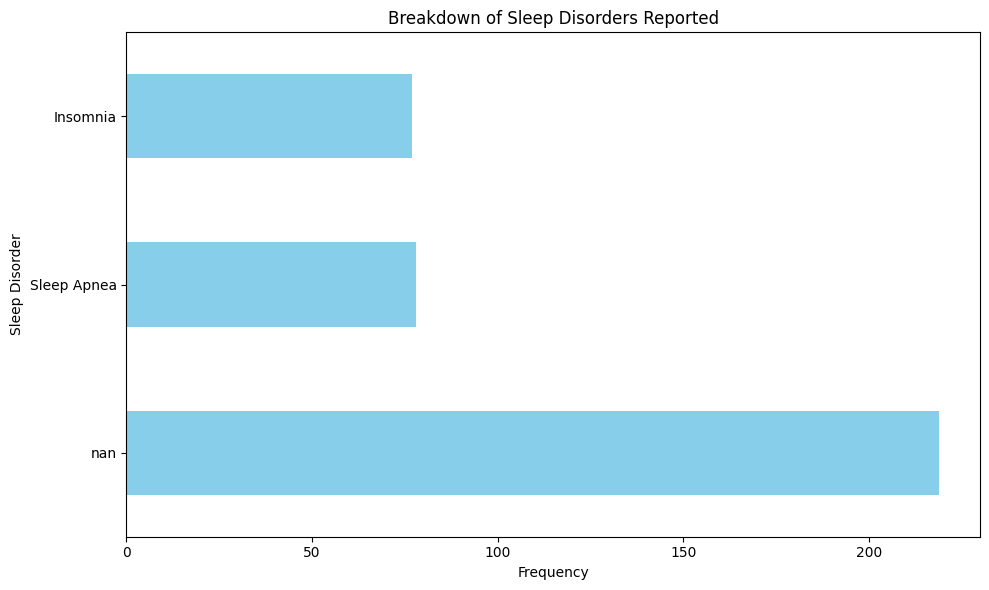

Index: 12
Description: Visualize the relationship between daily steps and heart rate


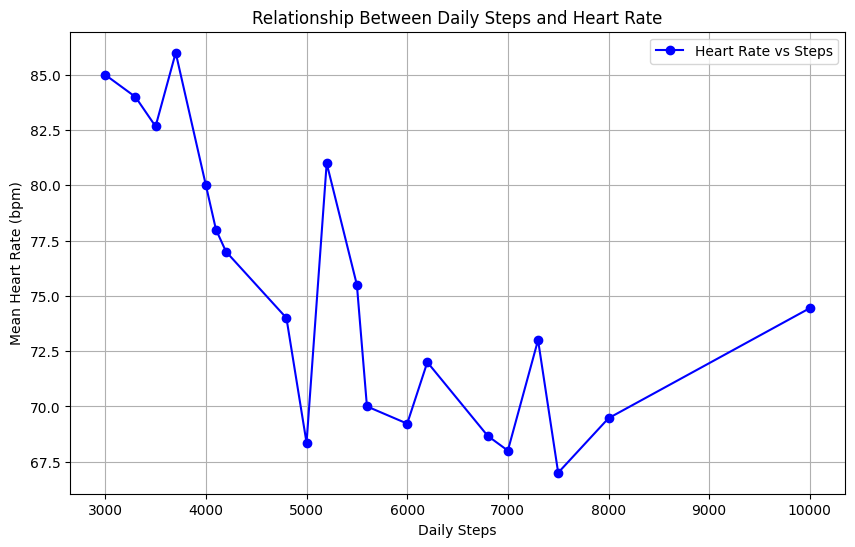

Index: 13
Description: Show the distribution of sleep duration values across the dataset
Exception invalid syntax (<string>, line 1) for index 13
Index: 14
Description: Compare the average physical activity levels of individuals with and without sleep disorders


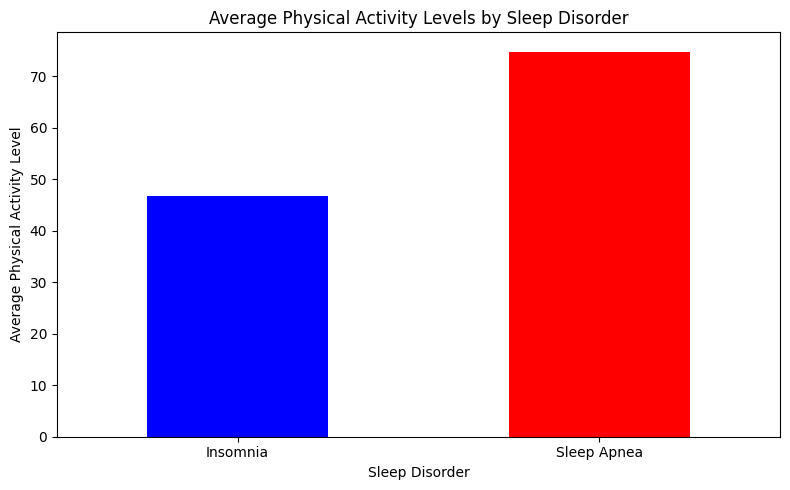

Index: 15
Description: Plot the relationship between stress level and sleep duration
Exception Invalid color tab20 for index 15
Index: 16
Description: Compare the average blood pressure readings among different BMI categories


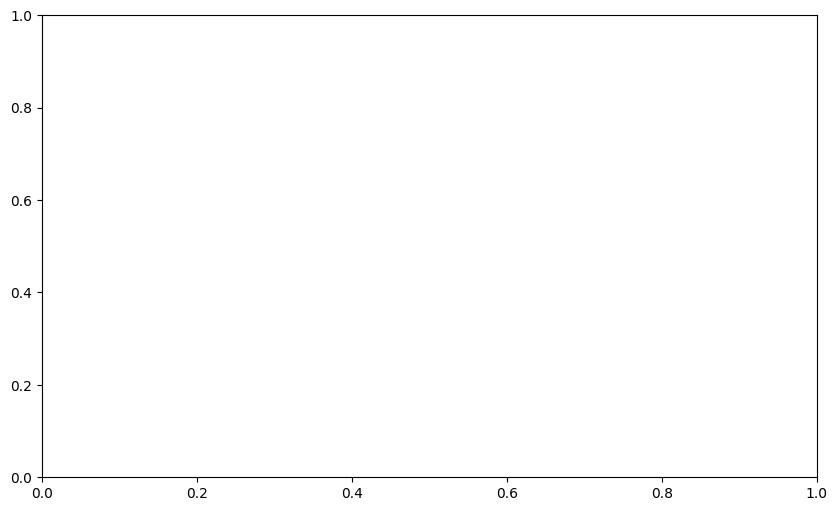

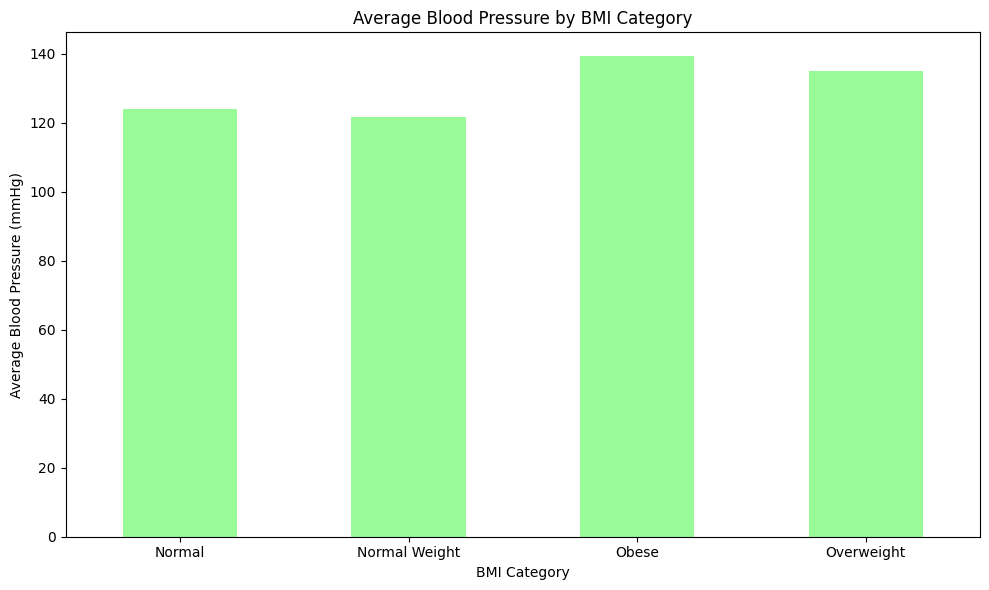

Index: 17
Description: Show the age distribution of individuals in the dataset


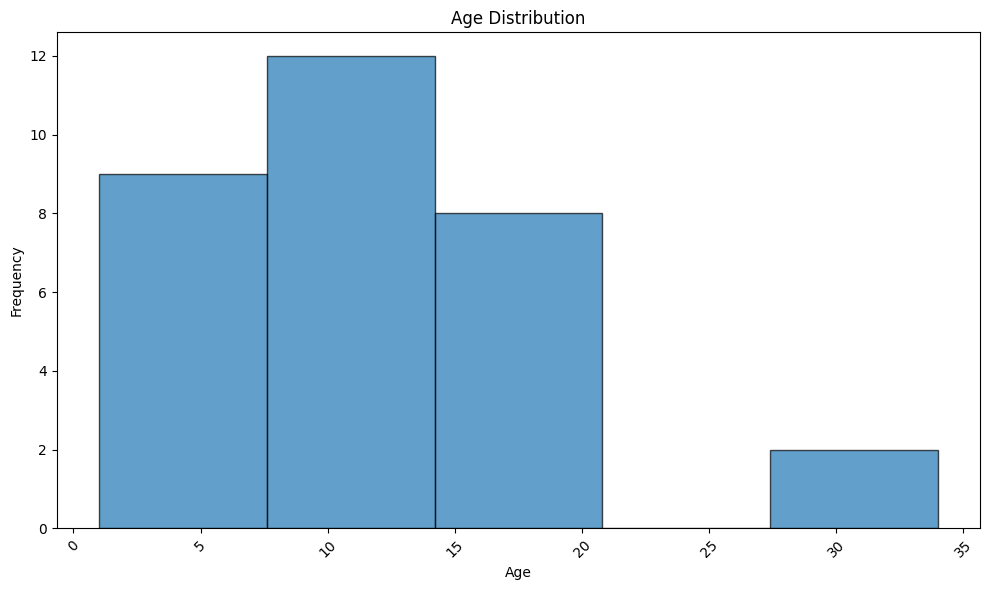

Index: 18
Description: Compare the average sleep quality between individuals with different heart rate ranges


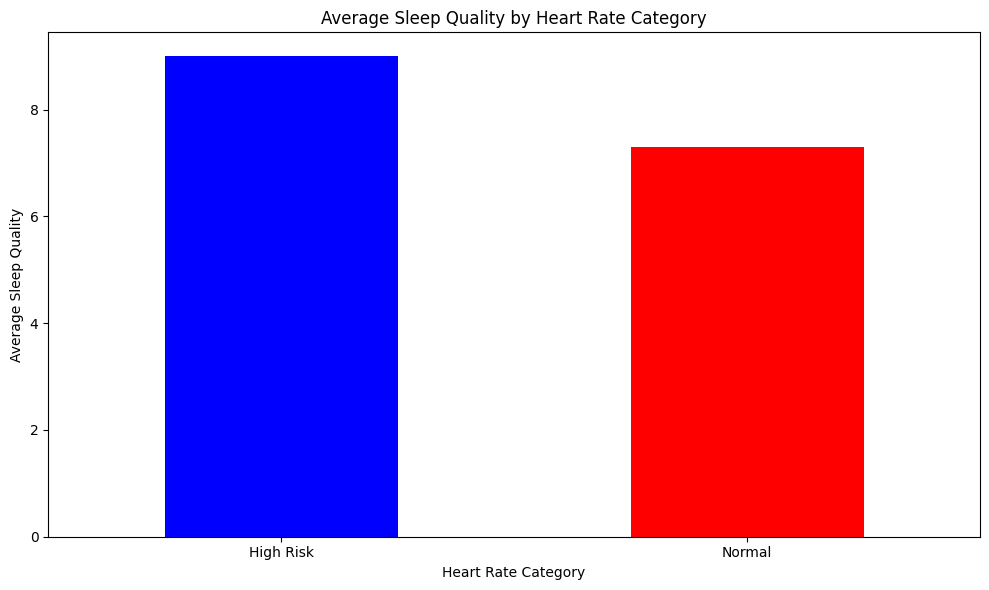

Index: 19
Description: Visualize the relationship between daily steps and sleep quality
Exception 'SeriesGroupBy' object has no attribute 'boxplot' for index 19
Index: 20
Description: Compare the average sleep duration of different BMI categories


<Figure size 1000x600 with 0 Axes>

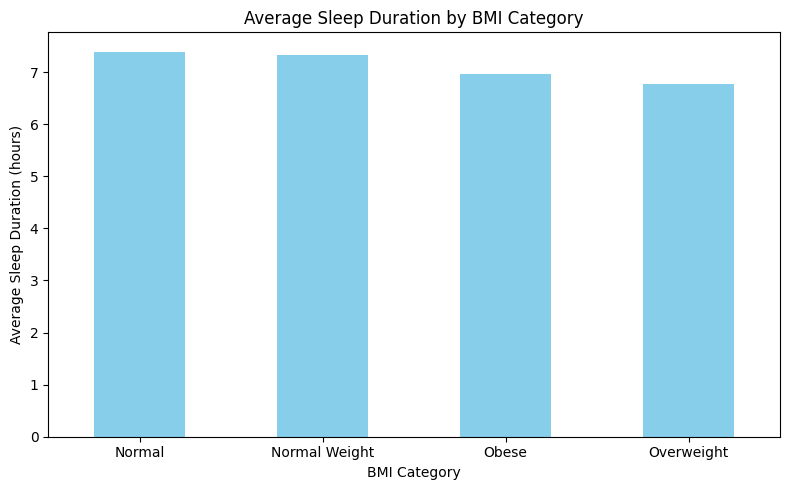

Index: 21
Description: Show the relationship between stress level and heart rate


<Figure size 1000x600 with 0 Axes>

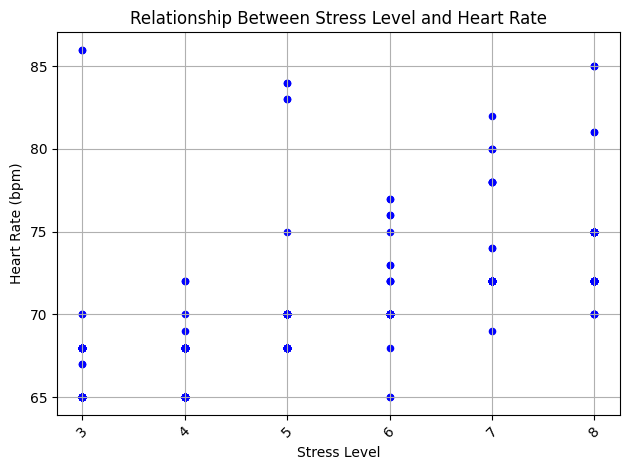

Index: 22
Description: Visualize the distribution of daily steps among individuals


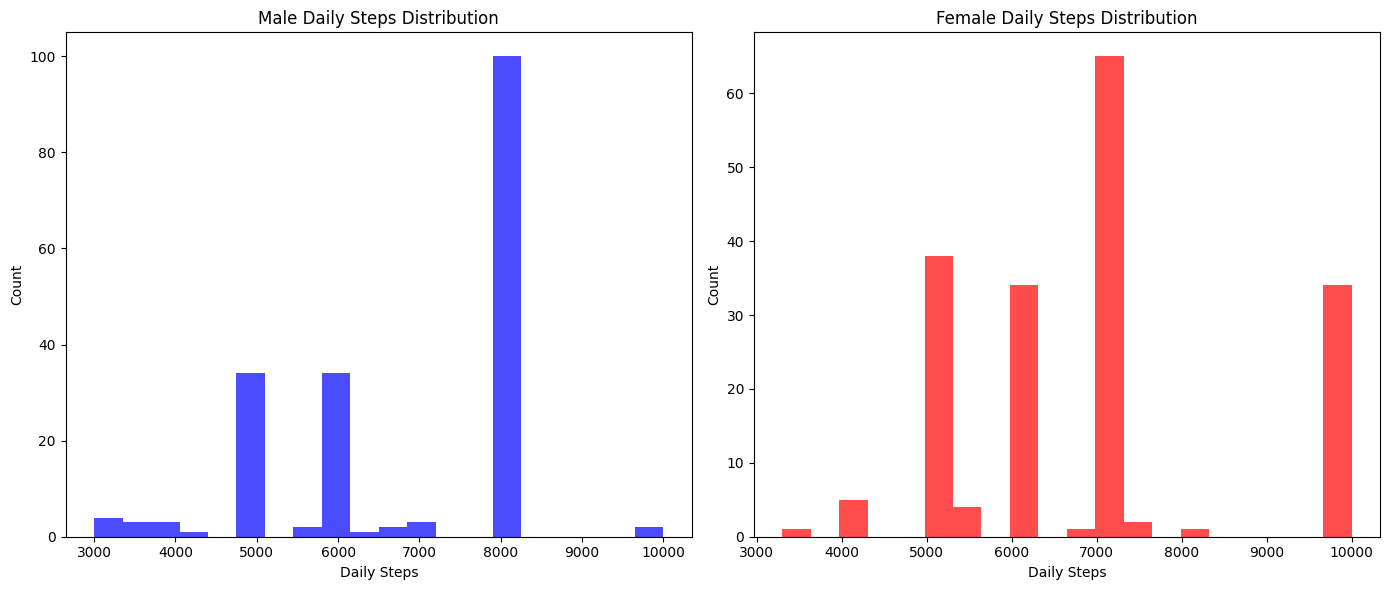

Index: 23
Description: Compare the average quality of sleep between individuals with and without sleep disorders
Exception unexpected indent (<string>, line 1) for index 23
Index: 24
Description: Show the relationship between physical activity level and daily steps


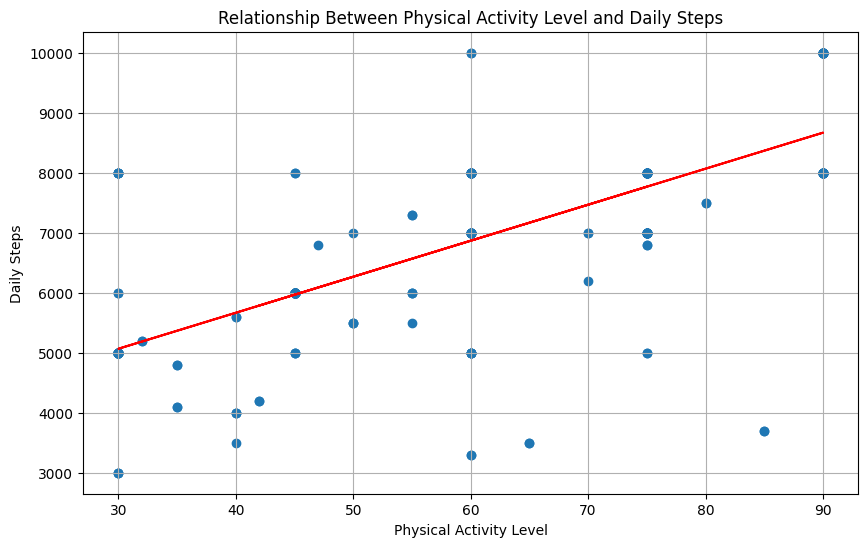

Index: 25
Description: Compare the average age of individuals across different occupations


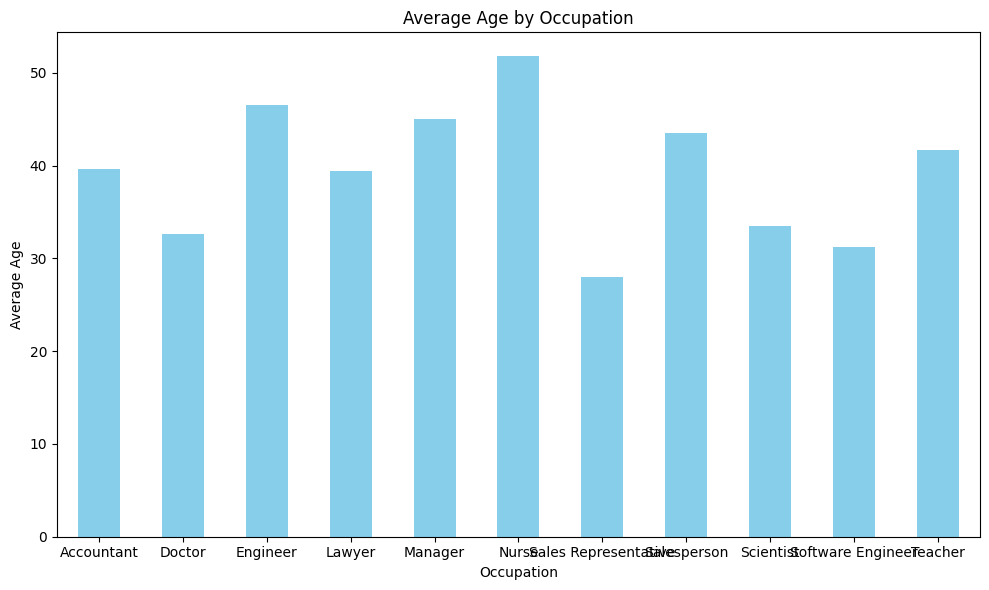

Index: 26
Description: Visualize the proportion of people in each stress level category
Exception Invalid RGBA argument: ['blue', 'green', 'red', 'yellow'] for index 26
Index: 27
Description: Show the relationship between age and heart rate
Exception plot kind scatter can only be used for data frames for index 27
Index: 28
Description: Compare the average sleep duration of males and females


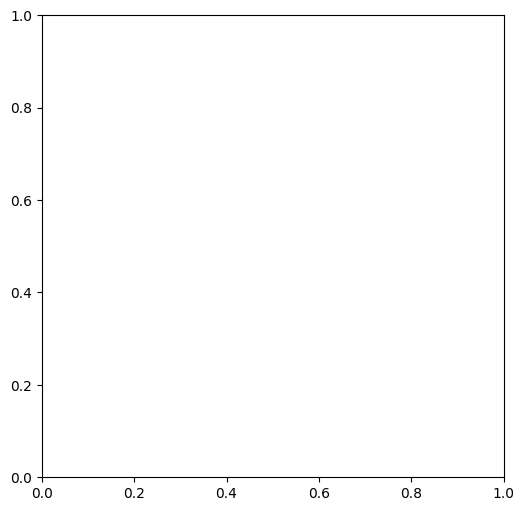

<Figure size 1000x600 with 0 Axes>

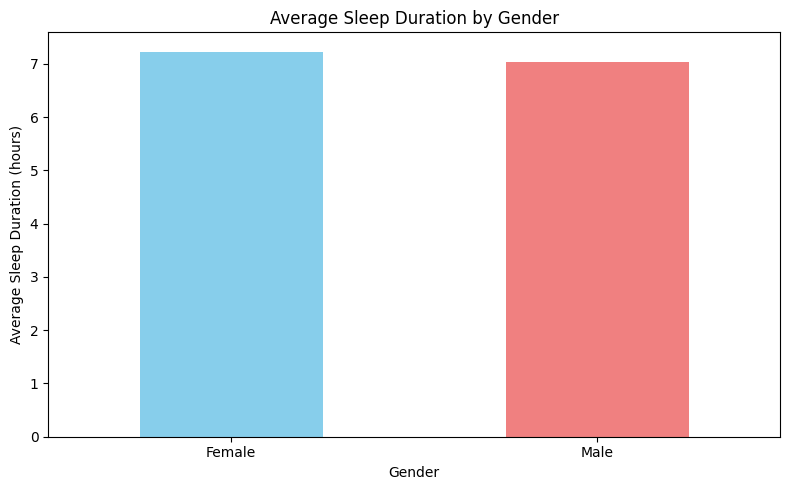

Index: 29
Description: Show the distribution of quality of sleep values in the dataset


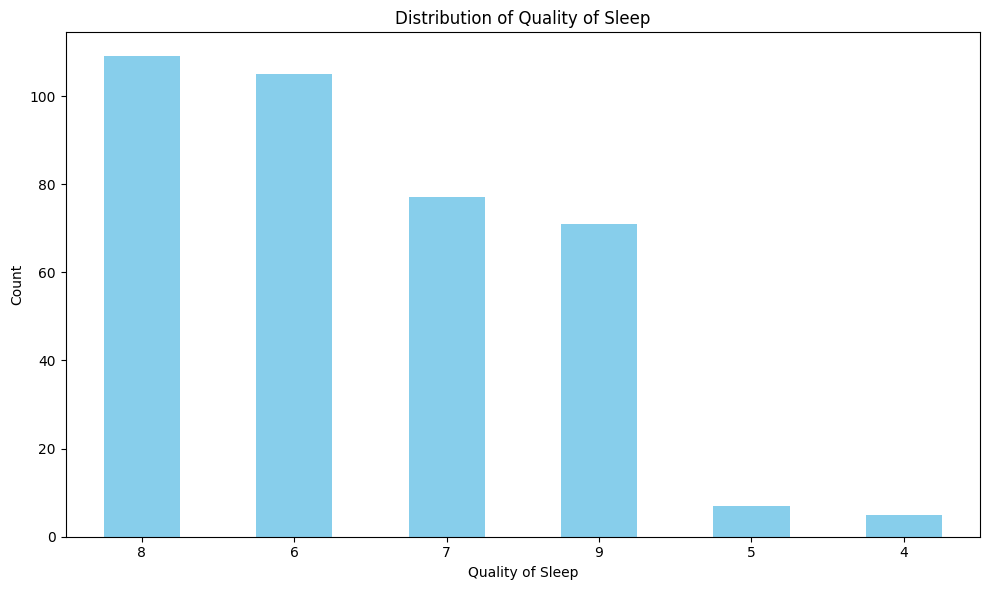

6/30


In [106]:
results = []
errors = 0
for index, row in train_df.iterrows():
    try:
        user_message = f"""{row["description"]}

        Example data:
        {df.head(5).to_string()}"""
        
        result = generate(system_message, user_message, "deepseek-r1:7b")
        chart_type = get_chart_type(result.message.content)
        chart_code = get_chart_code(result.message.content)
        thinking = get_thinking(result.message.content)
        print(f"Index: {index}")
        print(f"Description: {row["description"]}")
        exec(chart_code)
        results.append({
            "index": index,
            "success": 1,
            "chart_type": chart_type,
            "expected_chart_type": row["chart_type"],
            "thinking": thinking,
            "chart_code": chart_code,
            "hit": int(chart_type.lower() == row["chart_type"].lower()),
            "hand_check": "/"
        })
    except Exception as e:
        print(f"Exception {e} for index {index}")
        results.append({
            "index": index,
            "success": 0,
            "chart_type": "",
            "thinking": "",
            "chart_code": "",
            "hit": 0,
            "hand_check": 0
        })
        errors += 1

print(f"{errors}/{len(train_df)}")

In [107]:
save_json("data/deepseek-generation-thinking.json", results)

### Results

#### Ask the model to choose and create a chart

In [25]:
with open("results/llama-32-generation-ask.json", "r") as file:
    llama_32_ask_results = json.load(file)

In [33]:
with open("results/llama-31-generation-ask.json", "r") as file:
    llama_31_ask_results = json.load(file)

In [34]:
with open("results/deepseek-generation-ask.json", "r") as file:
    deepseek_ask_results = json.load(file)

In [26]:
llama_32_ask_hits = 0
llama_32_ask_score = 0
for result in llama_32_ask_results:
    llama_32_ask_hits += result['hit']
    llama_32_ask_score += result['hand_check']

In [35]:
llama_31_ask_hits = 0
llama_31_ask_score = 0
for result in llama_31_ask_results:
    llama_31_ask_hits += result['hit']
    llama_31_ask_score += result['hand_check']

In [36]:
deepseek_ask_hits = 0
deepseek_ask_score = 0
for result in deepseek_ask_results:
    deepseek_ask_hits += result['hit']
    deepseek_ask_score += result['hand_check']

In [37]:
print("*"*50)
print("LLaMA 3.2 Results")
print(f"Ask Hits: {llama_32_ask_hits/len(llama_32_ask_results)}")
print(f"Ask Score: {llama_32_ask_score/(len(llama_32_ask_results)*2)}")

print("*"*50)
print("LLaMA 3.1 Results")
print(f"Ask Hits: {llama_31_ask_hits/len(llama_31_ask_results)}")
print(f"Ask Score: {llama_31_ask_score/(len(llama_31_ask_results)*2)}")

print("*"*50)
print("Deepseek Results")
print(f"Ask Hits: {deepseek_ask_hits/len(deepseek_ask_results)}")
print(f"Ask Score: {deepseek_ask_score/(len(deepseek_ask_results)*2)}")

**************************************************
LLaMA 3.2 Results
Ask Hits: 0.3
Ask Score: 0.5
**************************************************
LLaMA 3.1 Results
Ask Hits: 0.6333333333333333
Ask Score: 0.8
**************************************************
Deepseek Results
Ask Hits: 0.6
Ask Score: 0.48333333333333334


#### Ask the model to choose and create a chart + Reasoning

In [108]:
with open("results/llama-32-generation-thinking.json", "r") as file:
    llama_32_thinking_results = json.load(file)

In [114]:
with open("results/llama-31-generation-thinking.json", "r") as file:
    llama_31_thinking_results = json.load(file)

In [110]:
with open("results/deepseek-generation-thinking.json", "r") as file:
    deepseek_thinking_results = json.load(file)

In [111]:
llama_32_thinking_hits = 0
llama_32_thinking_score = 0
for result in llama_32_thinking_results:
    llama_32_thinking_hits += result['hit']
    llama_32_thinking_score += result['hand_check']

In [115]:
llama_31_thinking_hits = 0
llama_31_thinking_score = 0
for result in llama_31_thinking_results:
    llama_31_thinking_hits += result['hit']
    llama_31_thinking_score += result['hand_check']

In [116]:
deepseek_thinking_hits = 0
deepseek_thinking_score = 0
for result in deepseek_thinking_results:
    deepseek_thinking_hits += result['hit']
    deepseek_thinking_score += result['hand_check']

In [117]:
print("*"*50)
print("LLaMA 3.2 Results")
print(f"Thinking Hits: {llama_32_thinking_hits/len(llama_32_thinking_results)}")
print(f"Thinking Score: {llama_32_thinking_score/(len(llama_32_thinking_results)*2)}")

print("*"*50)
print("LLaMA 3.1 Results")
print(f"Thinking Hits: {llama_31_thinking_hits/len(llama_31_thinking_results)}")
print(f"Thinking Score: {llama_31_thinking_score/(len(llama_31_thinking_results)*2)}")

print("*"*50)
print("Deepseek Results")
print(f"Thinking Hits: {deepseek_thinking_hits/len(deepseek_thinking_results)}")
print(f"Thinking Score: {deepseek_thinking_score/(len(deepseek_thinking_results)*2)}")

**************************************************
LLaMA 3.2 Results
Thinking Hits: 0.7666666666666667
Thinking Score: 0.8166666666666667
**************************************************
LLaMA 3.1 Results
Thinking Hits: 0.9
Thinking Score: 0.9166666666666666
**************************************************
Deepseek Results
Thinking Hits: 0.5666666666666667
Thinking Score: 0.6666666666666666


#### Give the model the chart type

In [38]:
with open("results/llama-32-generation-give.json", "r") as file:
    llama_32_give_results = json.load(file)

In [39]:
with open("results/llama-31-generation-give.json", "r") as file:
    llama_31_give_results = json.load(file)

In [40]:
with open("results/deepseek-generation-give.json", "r") as file:
    deepseek_give_results = json.load(file)

In [43]:
llama_32_give_score = 0
for result in llama_32_give_results:
    llama_32_give_score += result['hand_check']

In [45]:
llama_31_give_score = 0
for result in llama_31_give_results:
    llama_31_give_score += result['hand_check']

In [44]:
deepseek_give_score = 0
for result in deepseek_give_results:
    deepseek_give_score += result['hand_check']

In [46]:
print("*"*50)
print("LLaMA 3.2 Results")
print(f"Give Score: {llama_32_give_score/(len(llama_32_give_results)*2)}")

print("*"*50)
print("LLaMA 3.1 Results")
print(f"Give Score: {llama_31_give_score/(len(llama_31_give_results)*2)}")

print("*"*50)
print("Deepseek Results")
print(f"Give Score: {deepseek_give_score/(len(deepseek_give_results)*2)}")

**************************************************
LLaMA 3.2 Results
Give Score: 0.95
**************************************************
LLaMA 3.1 Results
Give Score: 0.9666666666666667
**************************************************
Deepseek Results
Give Score: 0.5833333333333334
